In [1]:
%load_ext Cython

In [2]:
%%cython
from draculab import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import sin, cos
%matplotlib notebook
import time

In [4]:
## SETTING THE NETWORK ##

class spinal_cord():
    
    def antagonist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1,
                          alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the antagonist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def antagonist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                               alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)

    def synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                         alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = exc_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = exc_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                              alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def partial_synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                                 alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the partial synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Selective afferent synapse dictionary
        sel_aff_syn = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle1_2_ib_muscle2_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle2_2_ib_muscle1_syn_spec = sel_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_ib_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_ib_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def partial_synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                                      alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(alpha_muscle1, r_muscle2, self.alpha_muscle1_2_r_muscle2_conn_spec, 
                         self.alpha_muscle1_2_r_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle2, self.r_muscle1_2_alpha_muscle2_conn_spec, 
                         self.r_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, ib_muscle2, self.ib_muscle1_2_ib_muscle2_conn_spec, 
                         self.ib_muscle1_2_ib_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(alpha_muscle2, r_muscle1, self.alpha_muscle2_2_r_muscle1_conn_spec, 
                         self.alpha_muscle2_2_r_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle1, self.r_muscle2_2_alpha_muscle1_conn_spec, 
                         self.r_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, ib_muscle1, self.ib_muscle2_2_ib_muscle1_conn_spec, 
                         self.ib_muscle2_2_ib_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)
    
    def __init__(self):
        
    ########### Fixing random seed
    
        self.seed = 19680801
        np.random.seed(self.seed)
        
    ########### Create parameter dictionaries for network, plant, and units
    
        # Defining network parameters
        self.net_params = {'min_delay': 0.005,
                           'min_buff_size': 10}

        # Defining neurons' parameters
        
        # Neurons' dictionary
        neuron_params = {'type' : unit_types.presyn_inh_sig,
                         'init_val' : 0.,
                         'thresh' : .5,
                         'slope' : 11.,
                         'tau' : 0.02,
                         'HYP' : 2.,
                         'OD' : 2.}
        ia_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        alpha_params = {'type' : unit_types.presyn_inh_sig,
                        'init_val' : 0.,
                        'thresh' : 0.8,
                        'slope' : 5.,
                        'tau' : 0.02,
                        'HYP' : 2.,
                        'OD' : 2.}
        ib_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 2.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        pn_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        
        
        # Muscle 1 neurons
        self.alpha_1_params = alpha_params
        self.pn_1_params = pn_params
        self.ia_1_params = ia_params
        self.r_1_params = neuron_params
        self.ib_1_params = ib_params
        
        # Muscle 2 neurons
        self.alpha_2_params = alpha_params
        self.pn_2_params = pn_params
        self.ia_2_params = ia_params
        self.r_2_params = neuron_params
        self.ib_2_params = ib_params
        
        # Muscle 3 neurons
        self.alpha_3_params = alpha_params
        self.pn_3_params = pn_params
        self.ia_3_params = ia_params
        self.r_3_params = neuron_params
        self.ib_3_params = ib_params
        
        # Muscle 4 neurons
        self.alpha_4_params = alpha_params
        self.pn_4_params = pn_params
        self.ia_4_params = ia_params
        self.r_4_params = neuron_params
        self.ib_4_params = ib_params
        
        # Muscle 5 neurons
        self.alpha_5_params = alpha_params
        self.pn_5_params = pn_params
        self.ia_5_params = ia_params
        self.r_5_params = neuron_params
        self.ib_5_params = ib_params
        
        # Muscle 6 neurons
        self.alpha_6_params = alpha_params
        self.pn_6_params = pn_params
        self.ia_6_params = ia_params
        self.r_6_params = neuron_params
        self.ib_6_params = ib_params

        # Defining arm parameters
        self.arm_params = {'type': plant_models.planar_arm_v3,
                           'mass1': 1.,
                           'mass2': 1.,
                           'init_q1': 0.,
                           'init_q2': np.pi/2.,
                           'init_q1p': 0.,
                           'init_q2p': 0.,
                           'g': 0.0,
                           'mu1': 0.01,
                           'mu2': 0.01,
                           
                           #'s_min' : -0.4,
                           #'p1' : (-0.01, 0.04),
                           #'p2' : (0.29, 0.03),
                           #'p3' : (0., 0.05),
                           #'p5' : (0.01, -0.05),
                           #'p10': (0.29, 0.03),
                           #'l_torque' : 0.01,
                           #'l_visco' : 0.01,
                           'g_e': 20.,
                           #'l0_e' : [1.]*6,
                           #'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
                           #'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
                           #'Ib_gain' : 5.,
                           #'T_0' : .5,
                           'k_pe_e': 8.,
                           'k_se_e': 13.,
                           #'b_e' : 5.,
                           #'g_s' : 0.02,
                           #'k_pe_s' : 2., 
                           #'k_se_s' : 2.,
                           #'g_d' : 0.01,
                           #'k_pe_d' : .2, #.1,
                           #'k_se_d' : 1., #2.,
                           #'b_s' : .5,
                           #'b_d' : 2.,#3.,
                           #'l0_s': .7,
                           #'l0_d': .8,
                           #'fs' : 0.1,
                           #'se_II' : 0.5,
                           #'cd' : 0.5,
                           #'cs' : 0.5
                          }
        
        # Defining sources' parameters
        self.source_params = {'init_val' : 1.,
                              'type' : unit_types.source,
                              'function' : lambda x: 1.}
        
    ########### Create parameter dictionaries for the synapses and connections
    
        '''    
        # Defining synapses' and connections' specifications to neurons and plant
        
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(0, 5, 6, 7, 9, 17, 18, 19)
        # Muscle 2 - muscle 3
        self.antagonist_params(3, 9, 10, 11, 6, 13, 14, 15)
        # Muscle 5 - muscle 6
        self.antagonist_params(12, 21, 22, 23, 15, 25, 26, 27)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(0, 5, 6, 7, 3, 9, 10, 11)
        # Muscle 1 - muscle 5
        self.synergist_params(0, 5, 6, 7, 12, 21, 22, 23)
        # Muscle 4 - muscle 3
        self.synergist_params(9, 17, 18, 19, 6, 13, 14, 15)
        # Muscle 4 - muscle 6
        self.synergist_params(9, 17, 18, 19, 15, 25, 26, 27)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(3, 9, 10, 11, 12, 21, 22, 23)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(3, 9, 10, 11, 15, 25, 26, 27)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(6, 13, 14, 15, 12, 21, 22, 23)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(6, 13, 14, 15, 15, 25, 26, 27)
        '''
        
        # Defining synapses' specifications to source units

        # PC synapse dictionary
        self.pc_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [1]}
        # IC synapse dictionary
        self.ic_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [2, 2, 2, 2]}   
        
        # Defining connections' specifications to source units

        # PC Connection dictionary
        self.pc_conn_spec = {'rule' : 'one_to_one',
                             'delay' : 0.005}
        # IC connection dictionary 
        self.ic_conn_spec = {'rule' : 'all_to_all',
                             'delay' : 0.005}
        
    def initialize(self):
        
        np.random.seed(self.seed)
        
    ########### Create network, neurons and plant

        self.net = network(self.net_params)
        
        alpha_1 = self.net.create(1, self.alpha_1_params)
        pn_1 = self.net.create(1, self.pn_1_params)
        ia_1 = self.net.create(1, self.ia_1_params)
        r_1 = self.net.create(1, self.r_1_params)
        ib_1 = self.net.create(1, self.ib_1_params)
        self.m1_ids = alpha_1 + pn_1 + ia_1 + r_1 + ib_1
        
        alpha_2 = self.net.create(1, self.alpha_2_params)
        pn_2 = self.net.create(1, self.pn_2_params)
        ia_2 = self.net.create(1, self.ia_2_params)
        r_2 = self.net.create(1, self.r_2_params)
        ib_2 = self.net.create(1, self.ib_2_params)
        self.m2_ids = alpha_2 + pn_2 + ia_2 + r_2 + ib_2
        
        alpha_3 = self.net.create(1, self.alpha_3_params)
        pn_3 = self.net.create(1, self.pn_3_params)
        ia_3 = self.net.create(1, self.ia_3_params)
        r_3 = self.net.create(1, self.r_3_params)
        ib_3 = self.net.create(1, self.ib_3_params)
        self.m3_ids = alpha_3 + pn_3 + ia_3 + r_3 + ib_3
        
        alpha_4 = self.net.create(1, self.alpha_4_params)
        pn_4 = self.net.create(1, self.pn_4_params)
        ia_4 = self.net.create(1, self.ia_4_params)
        r_4 = self.net.create(1, self.r_4_params)
        ib_4 = self.net.create(1, self.ib_4_params)
        self.m4_ids = alpha_4 + pn_4 + ia_4 + r_4 + ib_4
        
        alpha_5 = self.net.create(1, self.alpha_5_params)
        pn_5 = self.net.create(1, self.pn_5_params)
        ia_5 = self.net.create(1, self.ia_5_params)
        r_5 = self.net.create(1, self.r_5_params)
        ib_5 = self.net.create(1, self.ib_5_params)
        self.m5_ids = alpha_5 + pn_5 + ia_5 + r_5 + ib_5
        
        alpha_6 = self.net.create(1, self.alpha_6_params)
        pn_6 = self.net.create(1, self.pn_6_params)
        ia_6 = self.net.create(1, self.ia_6_params)
        r_6 = self.net.create(1, self.r_6_params)
        ib_6 = self.net.create(1, self.ib_6_params)
        self.m6_ids = alpha_6 + pn_6 + ia_6 + r_6 + ib_6
        
        self.arm = self.net.create(1, self.arm_params)

    ########### Connect
    
        #Creating lists with port numbers
        alpha_port = range(0,6)
        ia_port = range(28,34)
        ii_port = range(34,40)
        ib_port = range(22,28)
    
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[3], ia_port[3], 
                               ii_port[3], ib_port[3])
        #self.antagonist_params(0, 28, 34, 22, 3, 31, 37, 25)
        self.antagonist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 2 - muscle 3
        self.antagonist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.antagonist_params(1, 29, 35, 23, 2, 30, 36, 24)
        self.antagonist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 5 - muscle 6
        self.antagonist_params(alpha_port[4], ia_port[4], ii_port[4], ib_port[4], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.antagonist_params(4, 32, 38, 26, 5, 33, 39, 27)
        self.antagonist_connections(alpha_5, ia_5, ib_5, pn_5, r_5, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[1], ia_port[1], 
                               ii_port[1], ib_port[1])
        #self.synergist_params(0, 28, 34, 22, 1, 29, 35, 23)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 1 - muscle 5
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.synergist_params(0, 28, 34, 22, 4, 32, 38, 26)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 4 - muscle 3
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.synergist_params(3, 31, 37, 25, 2, 30, 36, 24)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4 - muscle 6
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.synergist_params(3, 31, 37, 25, 5, 33, 39, 27)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(1, 29, 35, 23, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(1, 29, 35, 23, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_6, ia_6, ib_6, pn_6, r_6)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(2, 30, 36, 24, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(2, 30, 36, 24, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_6, ia_6, ib_6, pn_6, r_6)
    
    ########### Create PC source units and connect
    
        for unit in self.net.units:
            uid = unit.ID
            for syn in range(len(self.net.syns[uid])):
                src = self.net.create(1, self.source_params)
                self.net.connect(src, [uid], self.pc_conn_spec, self.pc_syn)
                
    ########### Create IC source unit and connect

        self.ic_source = self.net.create(1, self.source_params)
        self.net.connect(self.ic_source, self.m1_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m2_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m3_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m4_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m5_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m6_ids[1:], self.ic_conn_spec, self.ic_syn)
        
    ########### Create source units to track the insertion points and tensions of the arm muscles
    
        track_params = {'type': unit_types.source,
                        'init_val': 0.,
                        'function' : lambda x: 0.}
        
        # create source units to track the insertion points
        self.ipx_track = self.net.create(12, track_params) # x coordinates
        self.ipy_track = self.net.create(12, track_params) # y coordinates
        # create source units to track the tensions
        #self.ten_track = self.net.create(6, track_params)

        for idx, uid in enumerate(self.ipx_track):
            self.net.units[uid].set_function(self.create_xtracker(self.arm, idx))
        for idx, uid in enumerate(self.ipy_track):
            self.net.units[uid].set_function(self.create_ytracker(self.arm, idx))
        #for idx, uid in enumerate(self.ten_track):
            #self.net.units[uid].set_function(self.create_tentracker(self.arm, idx))
            
    def create_xtracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][0]

    def create_ytracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][1]

    #def create_tentracker(self, arm_id, idx):
        #return lambda t: self.net.plants[arm_id].muscles[idx].T
        
    def simulate(self, sim_time, flat=True):
    ########### Simulate
    
        #np.random.seed(19680801)
    
        if flat:
            self.sim_dat = self.net.flat_run(sim_time)
        else:
            self.sim_dat = self.net.run(sim_time)
        self.arm_activs = np.array(self.sim_dat[2][self.arm])
        
        #print(self.sim_dat[1][self.alpha_1[0]])
        #print(self.arm_activs[:,0])
        #print(len(self.net.syns[self.ib_4[0]]))
        
    def neuron_activity(self):    
    # Plot of neurons' activity

        fig = plt.figure(figsize=(18,8))
        fig.add_subplot(231)
        m_label = ["alpha", "PN", "Ia", "R", "Ib"]
        m1_label = [s + " m1" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m1_ids[i]])
        plt.legend(m1_label, loc="lower right", ncol=1)
        fig.add_subplot(232)
        m2_label = [s + " m2" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m2_ids[i]])
        plt.legend(m2_label, loc="lower right", ncol=1)
        fig.add_subplot(233)
        m3_label = [s + " m3" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m3_ids[i]])
        plt.legend(m3_label, loc="lower right", ncol=1)
        fig.add_subplot(234)
        m4_label = [s + " m4" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m4_ids[i]])
        plt.legend(m4_label, loc="lower right", ncol=1)
        fig.add_subplot(235)
        m5_label = [s + " m5" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m5_ids[i]])
        plt.legend(m5_label, loc="lower right", ncol=1)
        fig.add_subplot(236)
        m6_label = [s + " m6" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m6_ids[i]])
        plt.legend(m6_label, loc="lower right", ncol=1)
        plt.show()
        
    def arm_activity(self): 
    # Plot the state variables of the arm
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Shoulder angle (rad)', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], (self.arm_activs[:,0]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Shoulder ang vel [rad/s]', fontsize='xx-large')
        ax0b.plot(self.sim_dat[0], self.arm_activs[:,1], 'r', linewidth=lw)
        ax0b.tick_params(labelsize=ls)
        ax0c = fig.add_axes([0.01, .44, .99, 0.16 ])
        ax0c.set_ylabel('Elbow angle (rad)', fontsize='xx-large')
        ax0c.tick_params(labelsize=ls)
        ax0c.plot(self.sim_dat[0], (self.arm_activs[:,2]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0d = fig.add_axes([0.01, .28, .99, 0.16 ])
        ax0d.set_xlabel('time [s]', fontsize='xx-large') 
        ax0d.set_ylabel('Elbow ang vel [rad/s]', fontsize='xx-large')
        ax0d.plot(self.sim_dat[0], self.arm_activs[:,3], 'r', linewidth=lw)
        ax0d.tick_params(labelsize=ls)
        plt.show()
        
    def arm_afferent_output(self):
    # Plot the arm's afferent outputs
    
        fig = plt.figure(figsize=(18,17))
        fig.add_subplot(311)
        m_label = ["m1", "m2", "m3", "m4", "m5", "m6"]
        Ia_label = ["Ia afferent " + s for s in m_label]
        for i in range(28, 34):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ia_label, loc="lower right", ncol=1)
        fig.add_subplot(312)
        II_label = ["II afferent " + s for s in m_label]
        for i in range(34, 40):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(II_label, loc="lower right", ncol=1)
        fig.add_subplot(313)
        Ib_label = ["Ib afferent " + s for s in m_label]
        for i in range(22, 28):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ib_label, loc="lower right", ncol=1)
        plt.show()
        
        
    def arm_coord(self,des_coord_x,des_coord_y): 
    # Plot the hand coordinates of the arm 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], [des_coord_x]*len(self.sim_dat[0]), 'k', linewidth=1)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], [des_coord_y]*len(self.sim_dat[0]), 'k', linewidth=1)
        plt.show()
        
    def arm_trajectory(self,targ_coord_x,targ_coord_y,sim_time): 
    # Plot the hand trajectory 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        des_coord_x = []
        des_coord_y = []
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        for tid,time in enumerate(self.sim_dat[0]):   
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            des_coord_x.append(des_coord[0])
            des_coord_y.append(des_coord[1])
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], des_coord_x, 'b--', linewidth=lw)
        ax0a.set(ylim=(0, 0.5))
        ax0a.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], des_coord_y, 'r--', linewidth=lw)
        ax0b.set(ylim=(0, 0.5))
        ax0b.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        plt.show()
        
    def arm_animation(self):    
    # Animation of the arm and muscles

        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # data from tracking units
        acts = np.array(self.sim_dat[1])
        ipx = acts[self.ipx_track]
        ipy = acts[self.ipy_track]
        ten = acts[self.ten_track] # muscle tensions
        # coordinates of hand and elbow
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xe = cos(theta_s)*l1
        ye = sin(theta_s)*l1
        xh = xe + cos(phi)*l2
        yh = ye + sin(phi)*l2
        # creating the figure and axis
        fig = plt.figure(figsize=(10,10))
        plt.axis('equal')
        ax = plt.gca()
        lim = l1 + l2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.grid()
        # creating lines and points
        line, = ax.plot([], [], 'o-b', lw=2)
        points, = ax.plot([], [], '+k')
        # preparing a colormap for the tensions
        ten_max = max(ten.max(), 1e-5)
        ten_min = min(ten.min(), -1e-5)
        for row_idx, row in enumerate(ten):
            for ent_idx, entry in enumerate(row):
                if entry > 0:
                    ten[row_idx, ent_idx] = entry/ten_max
                else:
                    ten[row_idx, ent_idx] = entry/abs(ten_min)
        ten = (ten / 2.) + 0.5
        mus_lines = []
        #cmap=plt.get_cmap('Reds')
        #cmap=plt.get_cmap('coolwarm')
        cmap=plt.get_cmap('bwr')
        for i in range(6):
            mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

        def init(self):
            line.set_data([], [])
            points.set_data([], [])
            for i in range(6):
                mus_lines = []
                mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
            return line, points, mus_lines

        def update(self, frame):
            coord_x = [0, xe[frame], xh[frame]]
            coord_y = [0, ye[frame], yh[frame]]
            ip_x = ipx[:,frame]
            ip_y = ipy[:,frame]
            tens = ten[:, frame]
            line.set_data(coord_x, coord_y)
            points.set_data(ip_x, ip_y)
            for i, ml in enumerate(mus_lines):
                idx = 2*i
                ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
                ml.set_color(cmap(tens[i]))

            cur_time = frame*0.01
            fig.suptitle('time: ' + '{:f}'.format(cur_time))
            return line, points, muls_lines #muscle1

        ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                            interval=10)
        plt.show()
    
    def w_list(self):
    #Return a list with all synapse weight values in the network, separated by units
        
        w = []
        for unit in self.net.units:
            u_idx = []
            for syn in self.net.syns[unit.ID]:
                u_idx.append(syn.w)
            w.append(u_idx)
            
        return w
        
    def syn_list(self):
    #Return a list with ID's of synapses to test (at ports 1 and 2), separated by units
        
        syn_idx = []
        for unit in self.net.units:
            u_idx = []
            for i,syn in enumerate(self.net.syns[unit.ID]):
                #if syn.port in [1,2]:
                    u_idx.append(i)
            syn_idx.append(u_idx)
            
        return syn_idx
    
    def update_w(self,w):
    #Put the weights (w) in the networks' synapses
    
        #np.random.seed(19680801)
        
        #w = self.w_list()
        for uid,unit in enumerate(self.net.units):
            for sid,syn in enumerate(self.net.syns[uid]):
                syn.w = w[uid][sid]
    
    '''
    def calc_error(self,des_coord_x,des_coord_y,sim_time):
    #Calculate the error between the desired coordinate and the average of coordinates of hand in the last 
    #second of simulation
        
        avg_coord_x = 0.
        avg_coord_y = 0.
        count = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        for tid,time in enumerate(self.sim_dat[0]):
            if time > sim_time-1. :
                # angles of shoulder and elbow
                theta_s = self.arm_activs[:,0][tid]
                theta_e = self.arm_activs[:,2][tid]
                phi = theta_s + theta_e # elbow angle wrt x axis
                # coordinates of hand
                xh = cos(theta_s)*l1 + cos(phi)*l2
                yh = sin(theta_s)*l1 + sin(phi)*l2
                avg_coord_x += xh
                avg_coord_y += yh
                count += 1            
        avg_coord_x /= count
        avg_coord_y /= count
        
        return (des_coord_x - avg_coord_x)**2 + (des_coord_y - avg_coord_y)**2
    '''
    
    def targ_dist(self, time, tr, D):
        """ Target distance between hand and initial position at the given time. """
        return (time/2. - ((tr/(4*np.pi)) *
                           sin((2.*np.pi*time)/tr))) * ((2.*D)/tr)
    
    def calc_error(self,targ_coord_x,targ_coord_y,sim_time):
    #Calculate the error between the desired trajectory of the arm and the actual one
    
        error = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        #D = np.sqrt((0.3-tar_coord_x)**2 + (0.3-tar_coord_y)**2)
        #u = np.array([tar_coord_x-0.3, tar_coord_y-0.3])/D
        for tid,time in enumerate(self.sim_dat[0]):   
            # angles of shoulder and elbow
            theta_s = self.arm_activs[:,0][tid]
            theta_e = self.arm_activs[:,2][tid]
            phi = theta_s + theta_e # elbow angle wrt x axis
            # actual coordinates of hand
            xh = cos(theta_s)*l1 + cos(phi)*l2
            yh = sin(theta_s)*l1 + sin(phi)*l2
            h_coord = np.array([xh, yh])
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            
            error += ((des_coord-h_coord)*(des_coord-h_coord)).sum()
        
        return error  
        
    
    def test_weights(self,w_change):
    #Calculate error for each of 3 values of synapse weight in synapse list
    
        #start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.3
        des_coord_y = 0.15
        #w_change = 0.2
        
        w = self.w_list()
        syn_idx = self.syn_list()
        
        #RUN 1
        self.initialize()
        self.update_w(w)
        self.simulate(sim_time)
        error_1 = self.calc_error(des_coord_x,des_coord_y,sim_time)
        
    
        for uid, ulist in enumerate(w):
            print("Initial state. unit %d test syns: " % (uid),end=": ")
            print([syn.w for syn in self.net.syns[uid]])
            for syn in syn_idx[uid]:
                
                #RUN 2
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w += w_change
                self.simulate(sim_time)
                error_2 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                
                #RUN 3
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w -= w_change
                self.simulate(sim_time)
                error_3 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                self.net.syns[uid][syn].w += w_change #ruturn weight to initial value
                
                print("uid:%d, sid:%d, e1:%f, e2:%f, e3:%f" % (uid, syn, error_1, error_2, error_3))
                
                if error_2<error_1 and error_2<error_3:
                    self.net.syns[uid][syn].w += w_change
                    w[uid][syn] += w_change
                    error_1 = error_2
                elif error_3<error_1 and error_3<error_2:
                    self.net.syns[uid][syn].w -= w_change
                    w[uid][syn] -= w_change
                    error_1 = error_3
                print("change. unit %d test syns: " % (uid),end=": ")
                print([syn.w for syn in self.net.syns[uid]])
        
        #print('Execution time: %s seconds' % (time.time() - start_time))
        
        #self.initialize()
        #self.update_w(w)
        #self.simulate(sim_time)
        #print('Error: ' + str(self.calc_error(des_coord_x,des_coord_y,sim_time)))   
        #self.arm_coord(des_coord_x,des_coord_y)
        #self.arm_activity()
        
        return w 
    
    def grad_desc(self):
    #Implement the Gradient Descent Algorithm to synapses' weight
    
        start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.3
        des_coord_y = 0.15
        w_change = [0.5, 0.4] #[0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]
        error = self.calc_error(des_coord_x,des_coord_y,sim_time)
        iterat = 0
        
        while error>0.01 and iterat<len(w_change):
            w = self.test_weights(w_change[iterat])
            del(self.net)
            self.initialize()
            self.update_w(w)
            self.simulate(sim_time)
            error = self.calc_error(des_coord_x,des_coord_y,sim_time)
            iterat += 1
            print('Iteration: ' + str(iterat))
            print('Error: ' + str(error))
            print('Execution time: %s seconds' % (time.time() - start_time))
            #self.arm_coord(des_coord_x,des_coord_y)
            #self.arm_activity()
            #self.neuron_activity()
            self.arm_trajectory(des_coord_x,des_coord_y,sim_time)
            self.arm_afferent_output()
            print(w)
            
        #print('Execution time: %s seconds' % (time.time() - start_time))    
        #print('Iterations: ' + str(iterat))
        #print('Error: ' + str(error))
        
        return w
            

Execution time: 19.853132724761963 seconds
Error: 12.653304708525448


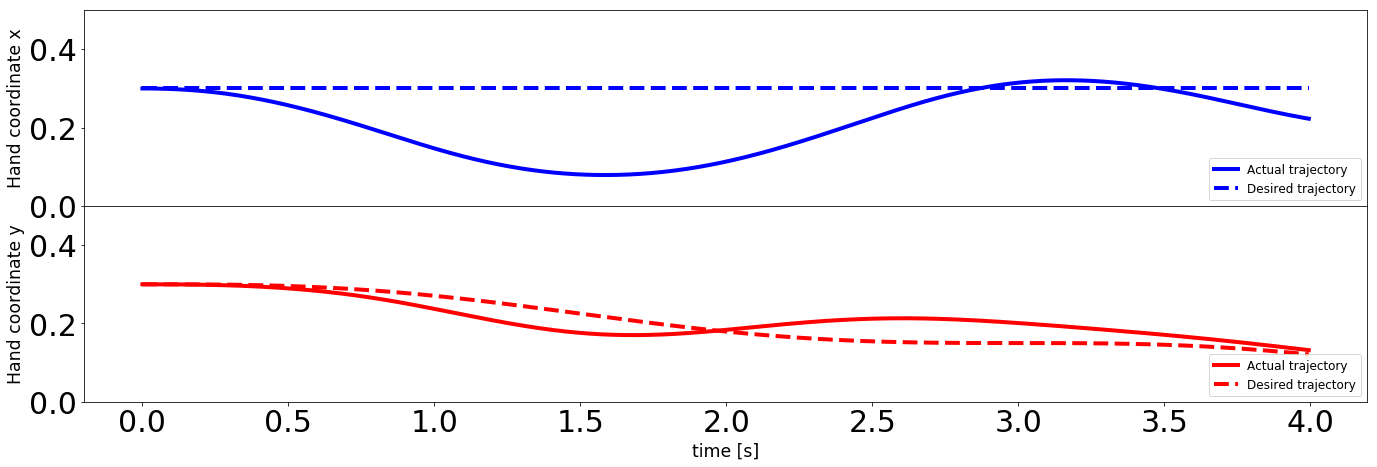

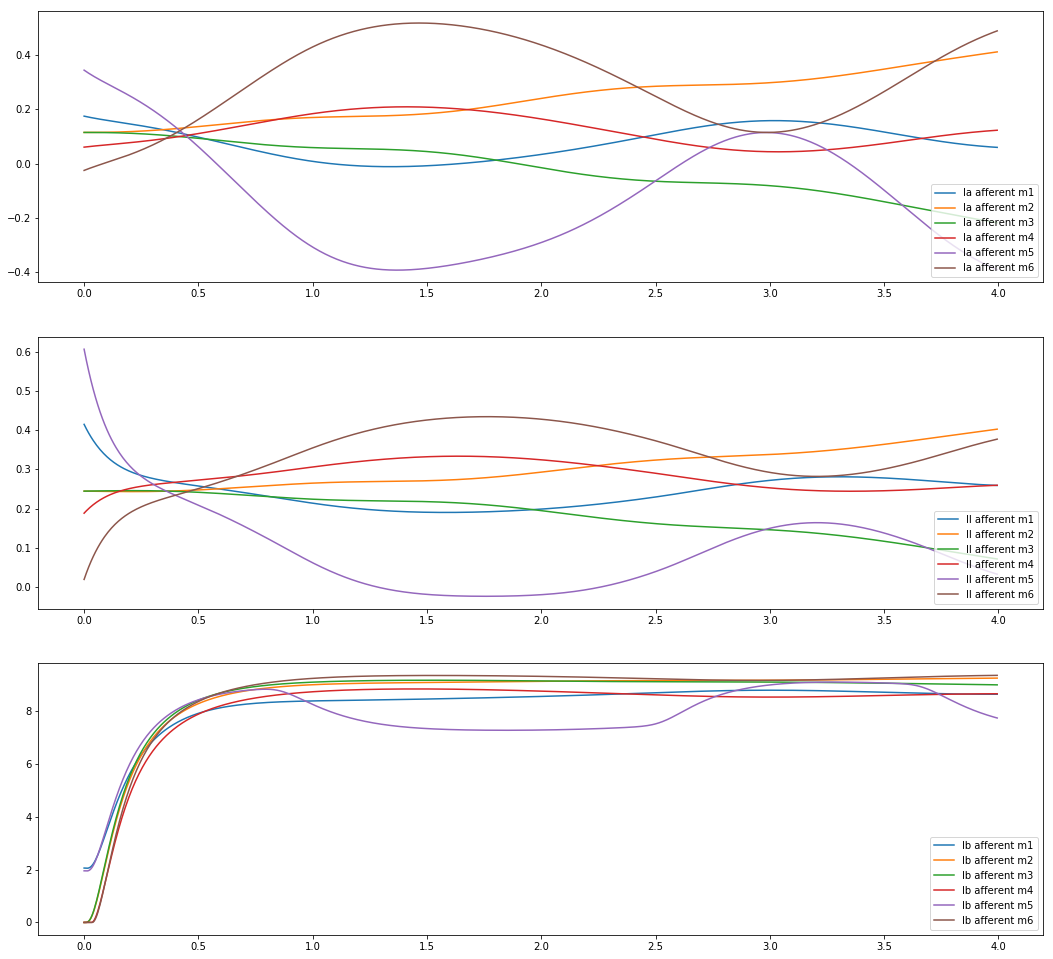

In [5]:
# Creating and runing the simulation

sc = spinal_cord()
start_time = time.time()
sc.initialize()
sc.simulate(4.)
print('Execution time: %s seconds' % (time.time() - start_time))
error = sc.calc_error(0.3,0.15,4.)
print('Error: ' + str(error))
#sc.arm_coord(0.3,0.15)
#sc.arm_activity()
#sc.neuron_activity()
sc.arm_trajectory(0.3,0.15,4.)
sc.arm_afferent_output()

<IPython.core.display.Javascript object>


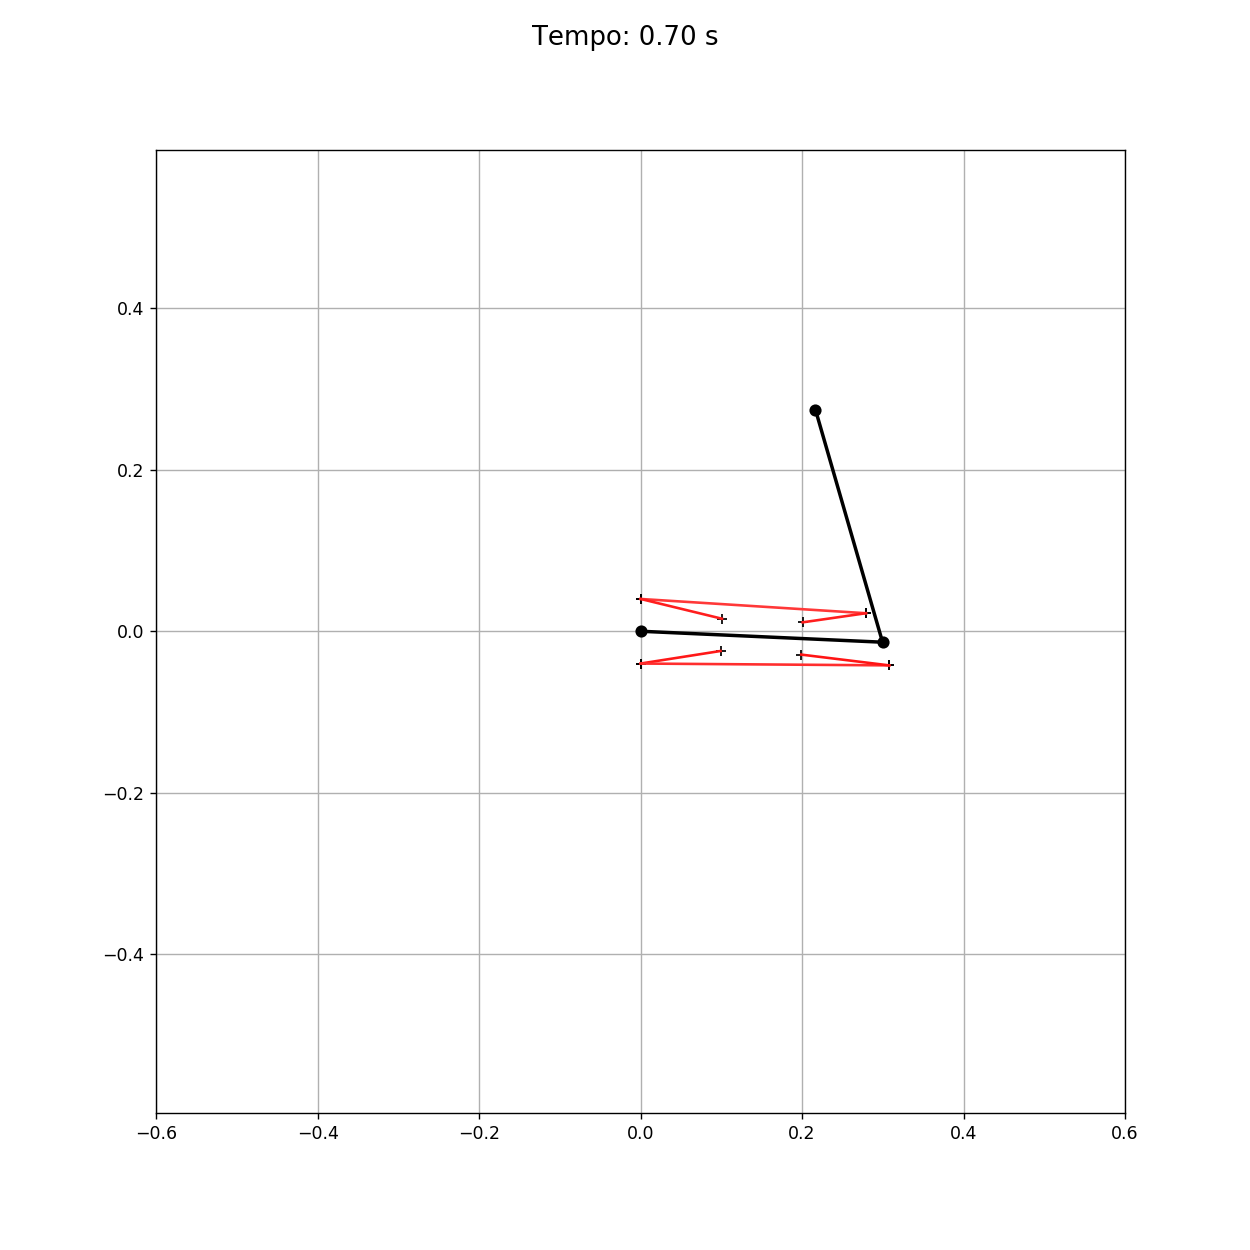

In [6]:
# Animation of the arm and muscles

%matplotlib notebook

# angles of shoulder and elbow
theta_s = sc.arm_activs[:,0]
theta_e = sc.arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sc.sim_dat[1])
ipx = acts[sc.ipx_track]
ipy = acts[sc.ipy_track]
ten = sc.arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = sc.net.plants[sc.arm].l_arm
l2 = sc.net.plants[sc.arm].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-k', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))

    cur_time = frame*0.005
    fig.suptitle('Tempo: ' + '{:.2f}'.format(cur_time) + ' s', fontsize=15)
    return line, points, mus_lines #muscle1

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                              interval=10)
plt.show()
#ani.save('alvo_03_015.mp4', writer=writer)
#ani.save('alvo_03_015.gif', writer='imagemagick', fps=60)


Initial state. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:0, e1:21.154930, e2:21.154930, e3:21.154930
change. unit 0 test syns: : [1.5, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.0974484538970151

uid:0, sid:11, e1:21.150827, e2:21.150827, e3:21.150827
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:12, e1:21.150827, e2:21.150827, e3:21.150827
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, -0.1808233961108603, -0.04442518840852866, 0.16252145

uid:0, sid:23, e1:21.147521, e2:21.145688, e3:21.149128
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:24, e1:21.145688, e2:21.165821, e3:21.143815
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, -0.04442518840852866, 0.16252145

uid:0, sid:35, e1:19.044347, e2:19.043851, e3:19.044389
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075]
uid:0, sid:36, e1:19.043851, e2:19.038547, e3:19.044347
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528,

uid:0, sid:47, e1:18.998691, e2:32.904715, e3:19.192831
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
Initial state. unit 1 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -0.1622398916770107]
uid:1, sid:0, e1:18.998691, e2:18.998691, e3:18.998691
change. unit 1 test syn

uid:2, sid:11, e1:18.997115, e2:18.998277, e3:18.996830
change. unit 2 test syns: : [-2.5, 2.5, -2.5, -2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -0.36486494528252966, -0.6525537532193437, -0.38110610329391675, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:12, e1:18.996830, e2:18.997115, e3:18.996765
change. unit 2 test syns: : [-2.5, 2.5, -2.5, -2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -0.36486494528252966, -0.6525537532193437, -0.38110610329391675, -0.32039829300841893, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -0.0037987958821298073]
uid:2, sid:13, e1:18.996765, e2:18.996767, e3:18.996765
change. unit 2 test syns: : [-2.5, 2.5, -2.5, -2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -0.36486494528252966, -0.6525537532193437, -0.38110610329391675, -0.32039829300841893, -0.6407748494360624, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 

uid:5, sid:0, e1:18.845373, e2:18.845373, e3:18.845373
change. unit 5 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:8, e1:18.845147, e2:18.845147, e3:18.845147
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.1

uid:5, sid:16, e1:18.844910, e2:18.844910, e3:18.844910
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.0, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.008336965189399, -2.0, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:24, e1:18.844849, e2:18.844849, e3:18.844849
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.0, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.0, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:32, e1:18.844849, e2:18.844942, e3:18.844764
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.08332986839706608, -0.14819366614734686, -0.058481445852074515, -0.0382913922612666, 0.05941355970818529, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.

uid:5, sid:40, e1:18.782589, e2:18.782626, e3:18.782586
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018

uid:5, sid:48, e1:18.782278, e2:18.782278, e3:18.782278
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514

uid:5, sid:56, e1:18.782278, e2:18.782278, e3:18.782278
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0

uid:5, sid:64, e1:18.782278, e2:18.782278, e3:18.782278
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0

uid:6, sid:12, e1:18.782192, e2:18.782173, e3:18.782231
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, 0.3014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.3608694226197451, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:13, e1:18.782173, e2:18.782168, e3:18.782192
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, 0.3014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.36086942261974503, 0.5108238007947352, -0.00823792053350672, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:14, e1:18.782168, e2:18.782167, e3:18.782173
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, 0.3014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.36086942261974503, 0.5108238007947352, 0.4917620794664933, -0.1631240253647102, -0.03226856391850261]
uid:6, sid:15, e1:18.782167, e2:18.782166, e3:18.782168
change. u

uid:7, sid:15, e1:18.781592, e2:18.781583, e3:18.781595
change. unit 7 test syns: : [-2.5, 2.5, -2.5, 2.5, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.4952170271289585, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:16, e1:18.781583, e2:18.781584, e3:18.781583
change. unit 7 test syns: : [-2.5, 2.5, -2.5, 2.5, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.4952170271289585, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, -0.3607155612094266, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -0.14729596148185867]
uid:7, sid:17, e1:18.781583, e2:18.781568, e3:18.781592
change. unit 7 test syns: : [-2.5, 2.5, -2.5, 2.5, -2.5, 2.0, -2.5, 2.0, -2.5, -2

uid:8, sid:12, e1:18.737795, e2:18.737795, e3:18.737798
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, -0.30878844215321216, 0.652874650350254, 0.5109436681985137, 0.3885636162177477, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:13, e1:18.737795, e2:18.737795, e3:18.737795
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, -0.30878844215321216, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, -0.16977700138009655, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:14, e1:18.737795, e2:18.737795, e3:18.737795
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, -0.30878844215321216, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:15, e1:18.737795, e2:18.737795, e3:18.737795
change. u

uid:10, sid:2, e1:17.881189, e2:17.881189, e3:17.881189
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:10, e1:17.881186, e2:17.881190, e3:17.881183
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:18, e1:17.881181, e2:17.881181, e3:17.882838
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -0.8185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 2.0, -2.0, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:26, e1:17.881174, e2:17.881174, e3:17.881174
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.0, -0.6543155782769752, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011

uid:10, sid:34, e1:17.881166, e2:17.886558, e3:17.880662
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.0084310114

uid:10, sid:42, e1:17.852274, e2:17.852271, e3:17.852317
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863

uid:10, sid:50, e1:17.852270, e2:17.852270, e3:17.852270
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615307, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 

uid:10, sid:58, e1:17.852270, e2:17.852270, e3:17.852270
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:10, sid:66, e1:17.852270, e2:17.852270, e3:17.852270
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774

uid:12, sid:0, e1:17.851988, e2:17.851988, e3:17.851988
change. unit 12 test syns: : [-2.5, -2.0, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:1, e1:17.851988, e2:17.851988, e3:17.851988
change. unit 12 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, -2.0, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:2, e1:17.851988, e2:17.851988, e3:17.851988
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.0, 2.0, -2.0, 2.0, -2.0, -2

uid:12, sid:20, e1:17.851952, e2:17.851952, e3:17.851952
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:21, e1:17.851952, e2:17.851952, e3:17.851952
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.5295028538314183, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484]
uid:12, sid:22, e1:17.851952, e2:17.851947, e3:17.851963
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.0, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 

uid:14, sid:1, e1:17.851492, e2:17.851492, e3:17.851493
change. unit 14 test syns: : [2.5, 2.5, 2.0, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:2, e1:17.851492, e2:17.851492, e3:17.851492
change. unit 14 test syns: : [2.5, 2.5, 2.5, -0.07757993049566014, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:3, e1:17.851492, e2:17.851483, e3:17.851492
change. unit 14 test syns: : [2.5, 2.5, 2.5, 0.42242006950433986, 2.0, 0.2696761449625127, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, -0.1800404062509589]
uid:14, sid:4, e1:17.851483, e2:17.851483, e3:17.851483
change. unit 14 test syns: : [2.5, 2.5, 2.

uid:15, sid:6, e1:17.850589, e2:17.850589, e3:17.850589
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:7, e1:17.850589, e2:17.850589, e3:17.850589
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114

uid:15, sid:18, e1:17.850489, e2:17.850510, e3:17.850469
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:19, e1:17.850469, e2:17.850469, e3:17.850469
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 0.1840194180209142, -0.08483082664400939, 0.14620721

uid:15, sid:30, e1:17.797930, e2:17.794645, e3:17.820504
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:31, e1:17.794645, e2:17.794359, e3:17.797930
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.646207211454

uid:15, sid:42, e1:17.794333, e2:17.794333, e3:17.794333
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822]
uid:15, sid:43, e1:17.794333, e2:17.794333, e3:17.794333
change. unit 15 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.3

uid:17, sid:0, e1:17.411894, e2:17.411746, e3:17.412004
change. unit 17 test syns: : [-1.5, -2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:1, e1:17.411746, e2:17.411737, e3:17.411755
change. unit 17 test syns: : [-1.5, -1.5, 2.0, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:2, e1:17.411737, e2:17.411737, e3:17.411737
change. unit 17 test syns: : [-1.5, -1.5, 2.5, -2.0, 2.0, 2.0, -2.0, 2.0, 2.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19

uid:18, sid:5, e1:17.410673, e2:17.410662, e3:17.410774
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:6, e1:17.410662, e2:17.411707, e3:17.410652
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:7, e1:17.410652, e2:17.410988, e3:17.411685
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484]
uid:18, sid:8, e1:17.410652, e2:17.410988, e3:17.411685
change. unit 18 test syns: : [-2.5, 2.5, 2.5, 2.5, 2.5, 2.5, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024

uid:20, sid:4, e1:17.409877, e2:17.409877, e3:17.409877
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:12, e1:17.409783, e2:17.409774, e3:17.409792
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -2.0, 2.0, 2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:20, e1:17.409735, e2:17.409735, e3:17.409735
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -2.0, -1.3684665963161868, 2.0, 2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04

uid:20, sid:28, e1:17.407509, e2:17.407509, e3:17.407509
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -2.0, -1.1754979409481874, 2.0, 2.0, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.047

uid:20, sid:36, e1:17.386225, e2:17.322654, e3:17.407297
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.0473841552

uid:20, sid:44, e1:13.931332, e2:9.424781, e3:16.913151
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055

uid:20, sid:52, e1:8.465530, e2:8.458956, e3:8.544964
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12

uid:20, sid:60, e1:4.663511, e2:6.037155, e3:3.598369
change. unit 20 test syns: : [2.0, -1.5, -1.5, 2.0, 2.0, -1.5, -1.5, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, -0.16140980521915593, 0.04738415529429055, -0.1265764

uid:21, sid:0, e1:3.035589, e2:3.035589, e3:3.035589
change. unit 21 test syns: : [1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:1, e1:3.035589, e2:3.035589, e3:3.035589
change. unit 21 test syns: : [1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:2, e1:3.035589, e2:3.035589, e3:3.035589
change. unit 21 test syns: : [1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.07986235687947951]
uid:21, sid:3, e1:3.035589, e2:3.035589, e3:3.035

uid:22, sid:6, e1:3.035500, e2:3.035500, e3:3.035500
change. unit 22 test syns: : [-2.5, 2.0, -2.5, 2.0, -2.5, 2.5, -2.5, -2.0, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:7, e1:3.035500, e2:3.035500, e3:3.035500
change. unit 22 test syns: : [-2.5, 2.0, -2.5, 2.0, -2.5, 2.5, -2.5, -2.5, 2.0, -2.0, -2.0, 2.0, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802]
uid:22, sid:8, e1:3.035500, e2:3.035500, e3:3.035500
change. unit 22 test syns: : [-2.5, 2.0, -2.5, 2.0, -2.5, 2.5, -2.5, -2.5, 1.5, -2.0,

uid:23, sid:0, e1:3.035406, e2:3.035482, e3:3.035337
change. unit 23 test syns: : [1.5, -2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:1, e1:3.035337, e2:3.035045, e3:3.035466
change. unit 23 test syns: : [1.5, -1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:2, e1:3.035045, e2:3.035078, e3:3.035013
change. unit 23 test syns: : [1.5, -1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132]
uid:23, sid:3, e1:3.035013, e2:3.035078, e3:3.034954

uid:24, sid:9, e1:2.997448, e2:2.999018, e3:2.995647
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.07772078096198487, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:10, e1:2.995647, e2:2.997448, e3:2.993480
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, 0.19046872638051077, -0.09106627291137759]
uid:24, sid:11, e1:2.993480, e2:2.995647, e3:2.990843
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, -0.30953127361948923, -0.09106627291137759]
uid:24, sid:12, e1:2.990843, e2:4.784606, e3:3.109730
change. unit 24 test syns: : [1.5, 1.5, 1.411141331298305, 1.5, 0.386

uid:25, sid:6, e1:2.990795, e2:2.990795, e3:2.990795
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333

uid:25, sid:14, e1:2.990750, e2:2.990750, e3:2.990750
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -0.9690222787007161, -0.6338128674265029, -2.0, 0.7780283911173442, 2.0, -2.0, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.00506393913133

uid:25, sid:22, e1:2.990715, e2:2.990715, e3:2.990715
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -0.6299127464859344, -0.5481228394237365, -2.0, -1.5562255535388942, 2.0, -2.0, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313334

uid:25, sid:30, e1:2.990672, e2:2.990677, e3:2.990666
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, -0.06716157864991823, 2.0, 2.0, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.0050639391313334

uid:25, sid:38, e1:2.986671, e2:2.987195, e3:2.986617
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461,

uid:25, sid:46, e1:2.986425, e2:2.986426, e3:2.986425
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17

uid:25, sid:54, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.3889274882046756, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.1741

uid:25, sid:62, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.1741195

uid:26, sid:5, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:6, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:7, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169]
uid:26, sid:8, e1:2.986425, e2:2.986425, e3:2.986425
chang

uid:27, sid:10, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 27 test syns: : [-1.5, -1.5, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, -1.5, -1.5, 2.0, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:11, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 27 test syns: : [-1.5, -1.5, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, -1.5, -1.5, 1.5, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007]
uid:27, sid:12, e1:2.986425, e2:2.986425, e3:2.986425
change. unit 27 test syns: : [-1.5, -1.5, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, -1.5, 

uid:28, sid:6, e1:2.986416, e2:2.986418, e3:2.986413
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:7, e1:2.986413, e2:2.986416, e3:2.986410
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:8, e1:2.986410, e2:2.972576, e3:2.986484
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.4003445763549601, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353]
uid:28, sid:9, e1:2.972576, e2:2.972581, e3:2.972188
change. unit

Iteration: 1
Error: 2.9680075737484515


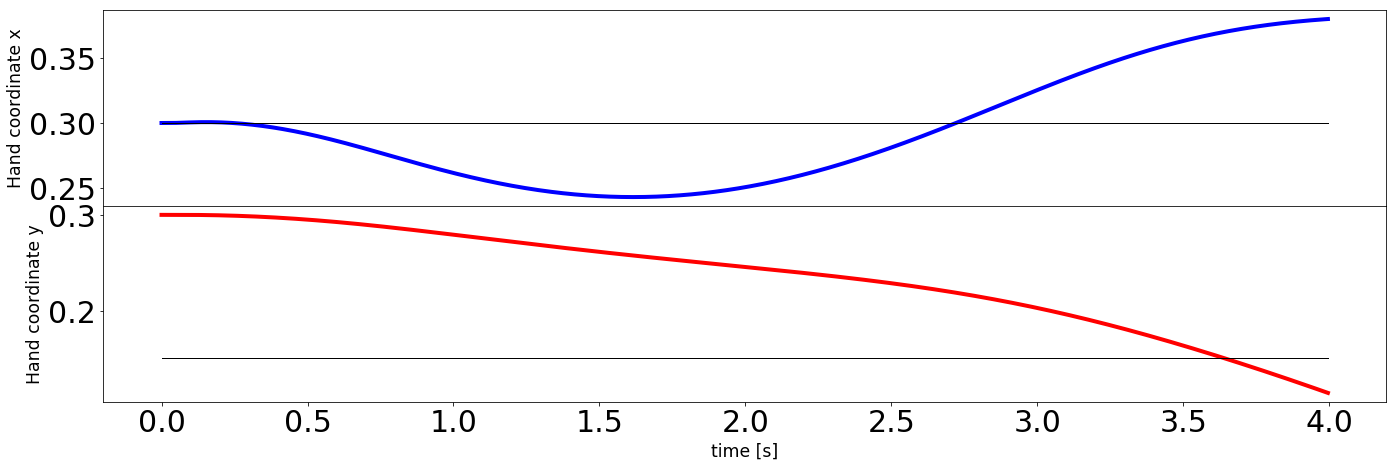

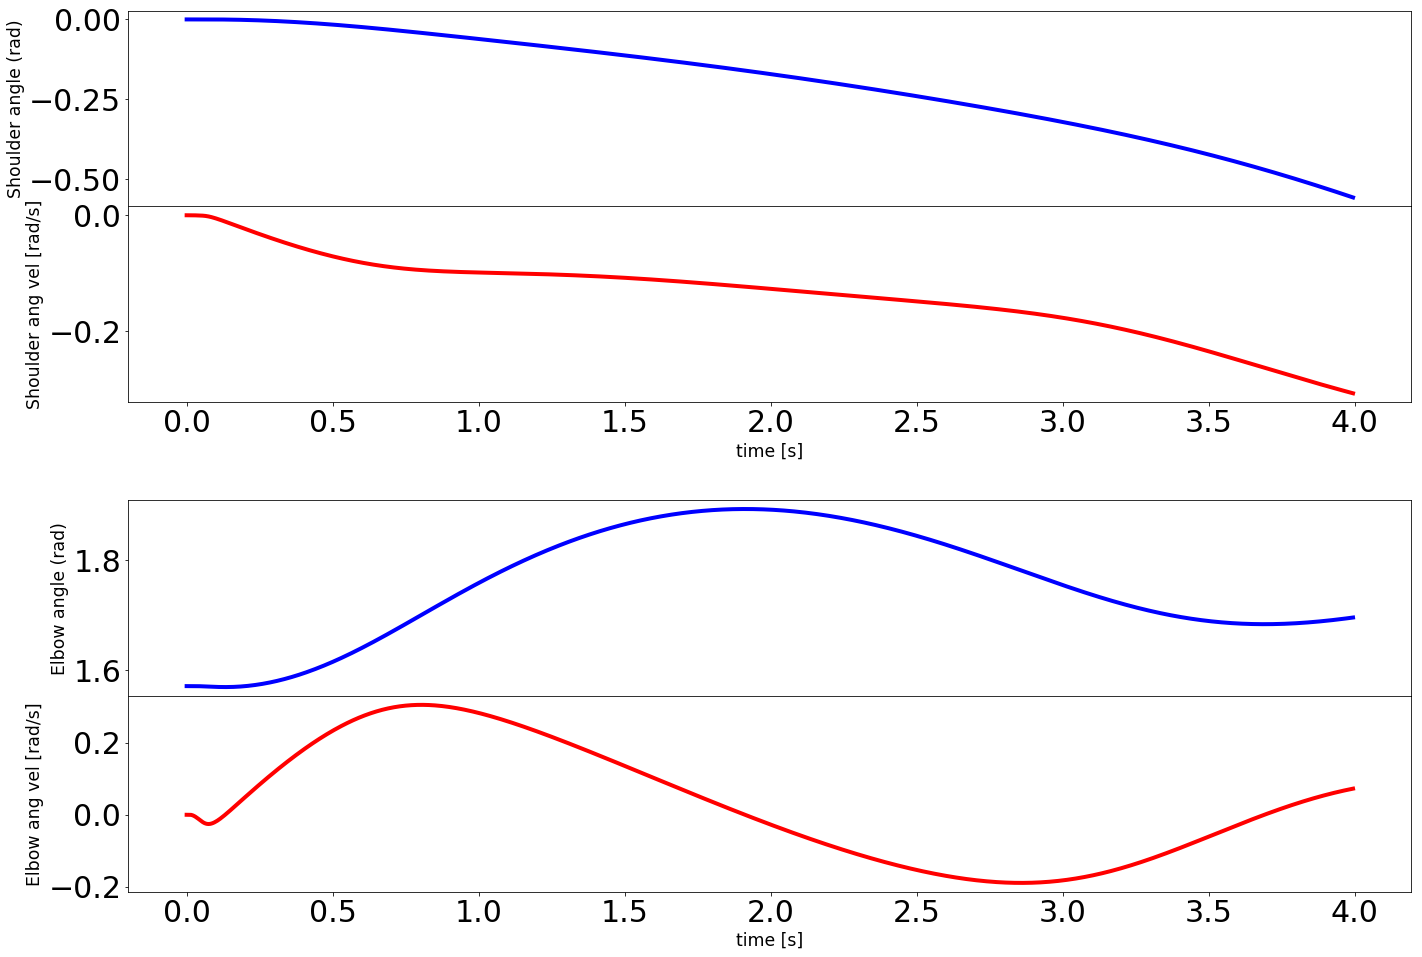

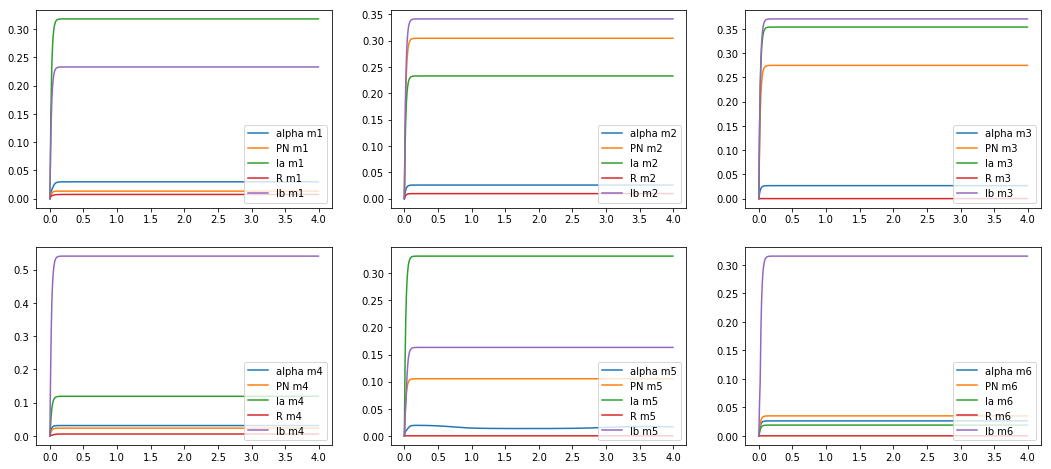

Initial state. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:0, e1:2.968008, e2:2.968008, e3:2.968008
change. unit 0 test syns: : [1.5, -1.5, -1.5, 2.5, 1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.429

uid:0, sid:11, e1:2.837605, e2:2.837605, e3:2.837605
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:12, e1:2.837605, e2:2.837605, e3:2.837605
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941,

uid:0, sid:23, e1:2.832753, e2:3.157358, e3:2.903997
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -0.6808233961108603, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941, -0.4025515461029848, 0.5531896647072667, 0.4296720070920256, 0.6689506129618912, 0.39489057546466977, 0.12957822835567762, 0.10024285613737621, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:24, e1:2.832753, e2:2.832753, e3:2.832753
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -0.6355927162974941,

uid:0, sid:35, e1:2.832723, e2:2.832749, e3:2.832541
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.6381444980770978, 0.6695728516172796, 0.3883347167329462, 0.17322155041832116, 0.49559949742940407, -0.010112543938806617, -0.16433301113364074, 0.3919792711941071, 0.5863749640444654, 0.498450464813117, 0.6065957514084637, 0.15871892895629075]
uid:0, sid:36, e1:2.832541, e2:2.832723, e3:2.831428
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297

uid:0, sid:47, e1:2.825490, e2:14.655418, e3:5.011345
change. unit 0 test syns: : [1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.17322155041832116, 0.09559949742940405, -0.010112543938806617, -0.16433301113364074, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.15871892895629075]
Initial state. unit 1 test syns: : [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, -0.42612605371701473, -0.5995948130344706, -0.6622398916770107]
uid:1, sid:0, e1:2.825490, e2:2.825492, e3:2.825484
change. unit 

uid:2, sid:11, e1:2.822289, e2:2.822238, e3:2.822305
change. unit 2 test syns: : [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.018893896706083213, -0.32039829300841893, -0.6407748494360624, -0.33725120605438047, -0.384650669818488, -0.39263766346785517, 0.03939859321099051, 0.49620120411787016]
uid:2, sid:12, e1:2.822238, e2:2.822089, e3:2.822289
change. unit 2 test syns: : [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -0.6407748494360624, -0.33725120605438047, -0.384650669818488, -0.39263766346785517, 0.03939859321099051, 0.49620120411787016]
uid:2, sid:13, e1:2.822089, e2:2.822090, e3:2.822084
change. unit 2 test syns: : [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -1.0407748494360625, -0.33725120605438047, -0.384650669818488, -0.39263766346785517, 0.039398593210

uid:5, sid:0, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.100

uid:5, sid:8, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.100

uid:5, sid:16, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:24, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:32, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:40, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.4847962547242609, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10

uid:5, sid:48, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.1

uid:5, sid:56, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.1

uid:5, sid:64, e1:2.812951, e2:2.812951, e3:2.812951
change. unit 5 test syns: : [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.1

uid:6, sid:12, e1:2.812943, e2:2.812949, e3:2.812929
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.5108238007947352, 0.4917620794664933, 0.3368759746352898, 0.46773143608149736]
uid:6, sid:13, e1:2.812929, e2:2.812943, e3:2.812902
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.1108238007947352, 0.4917620794664933, 0.3368759746352898, 0.46773143608149736]
uid:6, sid:14, e1:2.812902, e2:2.812929, e3:2.812872
change. unit 6 test syns: : [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.1108238007947352, 0.09176207946649328, 0.3368759746352898, 0.46773143608149736]
uid:6, sid:15, e1:2.812872, e2:2.812902, e3:2.812855
change. unit 

uid:7, sid:16, e1:2.812836, e2:2.812836, e3:2.812836
change. unit 7 test syns: : [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.09521702712895846, -0.08286755753249109, 0.02251846152391851, -0.0031205340348234856, 0.03928443879057342, 0.57823594326208, -0.555469254119539, 0.5022805758184337, -0.582331031034447, -0.43596617202010823, 0.5136541406416392, -0.6220735757260787, 0.35270403851814136]
uid:7, sid:17, e1:2.812836, e2:2.812850, e3:2.812810
change. unit 7 test syns: : [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.09521702712895846, -0.08286755753249109, 0.02251846152391851, -0.0031205340348234856, 0.03928443879057342, 0.17823594326208003, -0.555469254119539, 0.5022805758184337, -0.582331031034447, -0.43596617202010823, 0.5136541406416392, -0.6220735757260787, 0.35270403851814136]
uid:7, sid:18, e1:2.812810, e2:2.812810, e3:2.812810
change. unit 7 test syns: : [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.095

uid:8, sid:14, e1:2.812764, e2:2.812764, e3:2.812764
change. unit 8 test syns: : [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:15, e1:2.812764, e2:2.812764, e3:2.812764
change. unit 8 test syns: : [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
uid:8, sid:16, e1:2.812764, e2:6.267300, e3:2.816195
change. unit 8 test syns: : [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471]
Initial state. unit 9 test syns: : [2.5, 2.5, 2.5, 1.3798266669759616, 2.5, 0.9897

uid:10, sid:3, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351

uid:10, sid:11, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:19, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:27, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:35, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558986, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:43, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:51, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.41703528705453163, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.177413

uid:10, sid:59, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:10, sid:67, e1:2.811673, e2:2.811673, e3:2.811673
change. unit 10 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.1774135

uid:12, sid:3, e1:2.811617, e2:2.811617, e3:2.811617
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.5295028538314183, 0.31391200892114535, -0.4664540803316589, 0.5491727879677535]
uid:12, sid:4, e1:2.811617, e2:2.811617, e3:2.811617
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.3451087523694581, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.5295028538314183, 0.31391200892114535, -0.4664540803316589, 0.5491727879677535]
uid:12, sid:5, e1:2.811617, e2:2.811617, e3:2.811617
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.5, 2.0, -2.5, -2.5, 2.0, -2.5, -0.34510875236

uid:12, sid:23, e1:2.811606, e2:2.811606, e3:2.811606
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.1, 2.4, -2.1, -2.9, 2.4, -2.1, 0.05489124763054193, -0.25460361444622404, -0.0642288057541952, -0.06991746606855043, -0.0645319472530756, 0.2627842153710266, -0.16712183838813333, 0.18297567258088243, -0.032749356132471874, -0.12950285383141824, -0.08608799107885468, -0.0664540803316589, 0.5491727879677535]
uid:12, sid:24, e1:2.811606, e2:2.813961, e3:2.811533
change. unit 12 test syns: : [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.1, 2.4, -2.1, -2.9, 2.4, -2.1, 0.05489124763054193, -0.25460361444622404, -0.0642288057541952, -0.06991746606855043, -0.0645319472530756, 0.2627842153710266, -0.16712183838813333, 0.18297567258088243, -0.032749356132471874, -0.12950285383141824, -0.08608799107885468, -0.0664540803316589, 0.14917278796775346]
Initial state. unit 13 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.3613165025224374, -0.6020159475460238, -0.5722326601388215, -

uid:14, sid:6, e1:2.811450, e2:2.811472, e3:2.811408
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.42099410959269434, 0.4150234142912894, 0.6172163576388046, 0.3185985109704372, -0.5137910390363629, 0.3199595937490411]
uid:14, sid:7, e1:2.811408, e2:2.811450, e3:2.811335
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.02099410959269432, 0.4150234142912894, 0.6172163576388046, 0.3185985109704372, -0.5137910390363629, 0.3199595937490411]
uid:14, sid:8, e1:2.811335, e2:2.811408, e3:2.811230
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.02099410959269432, 0.015023414291289394, 0.6172163576388046, 0.3185985109704372, -0.5137910390363629, 0.3199595937490411]
uid:14, sid:9, e1:2.811230, e2:2.811335, e3:2.811110
change. unit 14 test syns: : [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.630

uid:15, sid:8, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:9, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.3939568253692

uid:15, sid:20, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:21, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.3159805819790858, -0.5848308266440094, 0.6462072114543382, 0.39395682536

uid:15, sid:32, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:33, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536

uid:15, sid:44, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822]
uid:15, sid:45, e1:2.810945, e2:2.810945, e3:2.810945
change. unit 15 test syns: : [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536

uid:17, sid:5, e1:2.806818, e2:2.806818, e3:2.806818
change. unit 17 test syns: : [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.5, 2.5, 2.5, 0.5016592199893638, 0.14248040525543126, -0.5675076877805297, -0.10937192073963709, -0.5636347281847506, -0.5789520220150634, 0.18874733312642178, -0.6978700002755511, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:6, e1:2.806818, e2:2.806870, e3:2.806767
change. unit 17 test syns: : [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.9, 2.5, 2.5, 0.5016592199893638, 0.14248040525543126, -0.5675076877805297, -0.10937192073963709, -0.5636347281847506, -0.5789520220150634, 0.18874733312642178, -0.6978700002755511, -0.09627009060385722, -0.026403491636533438]
uid:17, sid:7, e1:2.806767, e2:2.806767, e3:2.806767
change. unit 17 test syns: : [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.9, 2.9, 2.5, 0.5016592199893638, 0.14248040525543126, -0.5675076877805297, -0.10937192073963709, -0.5636347281847506, -0.5789520220150634, 0.18874733312642178, -0.6978700002755511, -0.0962700

uid:18, sid:12, e1:2.800731, e2:2.800717, e3:2.800761
change. unit 18 test syns: : [-2.9, 2.9, 2.9, 2.9, 2.9, 2.9, -0.8267510039273527, 0.5362328662246951, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.31671976651367517]
Initial state. unit 19 test syns: : [2.5, 2.5, 2.5, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:0, e1:2.800717, e2:2.800717, e3:2.800717
change. unit 19 test syns: : [2.1, 2.5, 2.5, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:1, e1:2.800717, e2:2.800717, e3:2.800717
change. unit 19 test syns: : [2.1, 2.1, 2.5, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:2, e1:2.800717, e2:2.800717, e3:2.800717
change. unit 19 test syns: : [2.1, 2.1, 2.1, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.41142247060756826]
uid:19, sid:3, e1:2.800717, e2:2.800717, e3:2.800717
change. un

uid:20, sid:6, e1:2.784157, e2:2.784157, e3:2.784157
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.5, 2.0, -1.5, -1.5, 2.0, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.126576423

uid:20, sid:14, e1:2.784157, e2:2.768005, e3:2.800717
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.5, 0.26698208986846783, 2.0, -1.5, -0.8684665963161868, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:22, e1:2.768005, e2:2.768005, e3:2.768005
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161867, 2.0, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.0, -1.5, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:30, e1:2.752214, e2:2.752214, e3:2.752214
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.6754979409481874, 2.0, 1.5, -0.5498789985190359, 0.342348224624485, 0.574922619046688, -0.6814153248120884, -0.6340915478297486, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:38, e1:2.735441, e2:3.024715, e3:3.067282
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297487, 0.4604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.1265764

uid:20, sid:46, e1:2.735441, e2:2.735441, e3:2.735441
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:20, sid:54, e1:2.735441, e2:3.024715, e3:3.067282
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.4407408408494532, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.126576423

uid:20, sid:62, e1:2.735441, e2:3.024715, e3:3.067282
change. unit 20 test syns: : [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642

uid:21, sid:5, e1:2.734728, e2:2.734748, e3:2.734703
change. unit 21 test syns: : [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.5, 1.5, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, -0.439366149225655, -0.5180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951]
uid:21, sid:6, e1:2.734703, e2:2.735021, e3:2.734426
change. unit 21 test syns: : [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.5, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, -0.439366149225655, -0.5180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951]
uid:21, sid:7, e1:2.734426, e2:2.734475, e3:2.734363
change. unit 21 test syns: : [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, -0.439366149225655, -0.5180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951]
uid:21, sid:8, e1:2.734363, e2:2.734672, e3:2.734021
change. 

uid:22, sid:10, e1:2.731844, e2:2.731844, e3:2.731844
change. unit 22 test syns: : [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.5, -0.4015012693932637, 0.4985684136956659, -0.423588366567365, 0.5886938788067251, -0.6306862923294501, 0.3754089366478497, -0.5723387390364124, -0.44256418660415564, 0.4408058213425513, -0.4941070018731825, -0.44097866551063414, 0.5277798099622827, 0.535721398218348]
uid:22, sid:11, e1:2.731844, e2:2.731844, e3:2.731844
change. unit 22 test syns: : [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.9, -0.4015012693932637, 0.4985684136956659, -0.423588366567365, 0.5886938788067251, -0.6306862923294501, 0.3754089366478497, -0.5723387390364124, -0.44256418660415564, 0.4408058213425513, -0.4941070018731825, -0.44097866551063414, 0.5277798099622827, 0.535721398218348]
uid:22, sid:12, e1:2.731844, e2:2.731844, e3:2.731844
change. unit 22 test syns: : [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.9, -0.0015012693

uid:23, sid:5, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 23 test syns: : [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.6525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -0.3061290858869787]
uid:23, sid:6, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 23 test syns: : [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.6525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -0.3061290858869787]
uid:23, sid:7, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 23 test syns: : [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.6525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -0.3061290858869787]
uid:23, sid:8, e1:2.731338, e2:2.731338, e3:2.731338
change. unit 2

uid:25, sid:0, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.67411952

uid:25, sid:8, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.67411952

uid:25, sid:16, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195

uid:25, sid:24, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195

uid:25, sid:32, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.6015138358665681, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195

uid:25, sid:40, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:25, sid:48, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:25, sid:56, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:25, sid:64, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.674119

uid:26, sid:12, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, -0.3125499067347383]
uid:26, sid:13, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.06212883504767319, -0.1029448933394213, 0.07195458054188147, -0.3125499067347383]
uid:26, sid:14, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 26 test syns: : [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.10294489333942136, 0.07195458054188147, -0.3125499067347383]
uid:26, sid:15, e1:2.729436, e2:2.729436, e3:2.729436
c

uid:27, sid:15, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 27 test syns: : [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.9442560854270845, 0.7414636623546127, -0.8661408416068481, -0.7051148592223746, 0.6662544744366369, -0.648102297684842, 0.33454727333798945, 0.4271177977626887, -0.6952109005534342, 0.5248987521150207, 0.6398464456687389, -0.6080186673489524, -0.41980010290692993]
uid:27, sid:16, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 27 test syns: : [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.9442560854270845, 0.7414636623546127, -0.8661408416068481, -0.7051148592223746, 1.066254474436637, -0.648102297684842, 0.33454727333798945, 0.4271177977626887, -0.6952109005534342, 0.5248987521150207, 0.6398464456687389, -0.6080186673489524, -0.41980010290692993]
uid:27, sid:17, e1:2.729436, e2:2.729436, e3:2.729436
change. unit 27 test syns: : [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.944256085427

uid:28, sid:12, e1:2.729434, e2:2.729428, e3:2.729434
change. unit 28 test syns: : [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.0606726912091744, -0.42467767111627797, -0.4694214650982186, -0.3152031064617331, -0.3545214184542865]
uid:28, sid:13, e1:2.729428, e2:2.729427, e3:2.729434
change. unit 28 test syns: : [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.060672691209174345, -0.024677671116277944, -0.4694214650982186, -0.3152031064617331, -0.3545214184542865]
uid:28, sid:14, e1:2.729427, e2:2.729427, e3:2.729428
change. unit 28 test syns: : [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.060672691209174345, -0.024677671116277944, -0.4694214650982186, -0.3152031064617331, -0.3545214184542865]
uid:28, sid:15, e1:2.729427, e2:2.729427, e3:2.72

Iteration: 2
Error: 2.7264737035176783


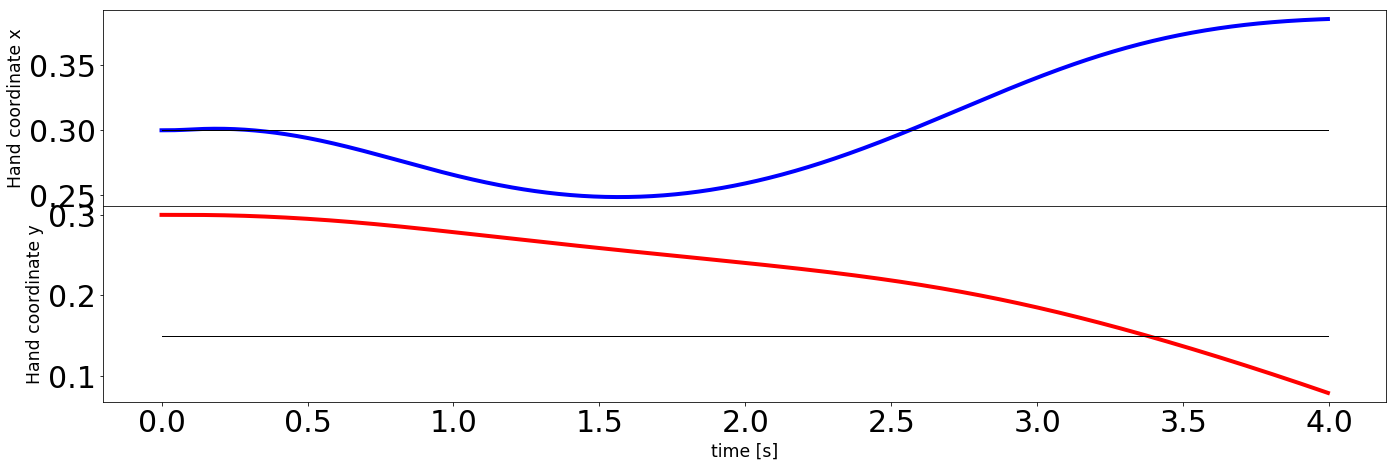

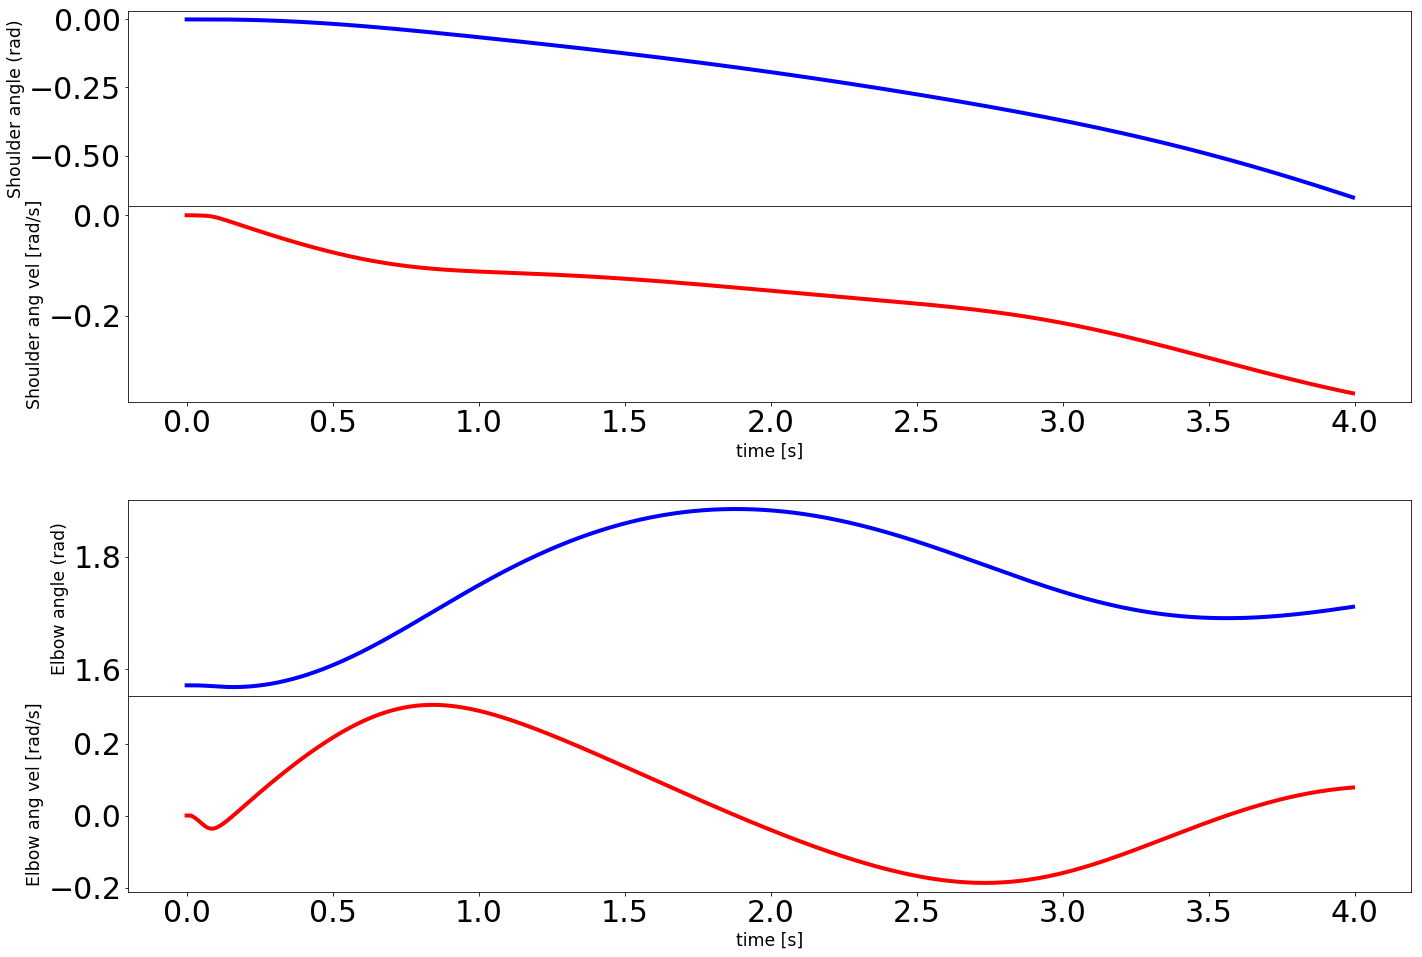

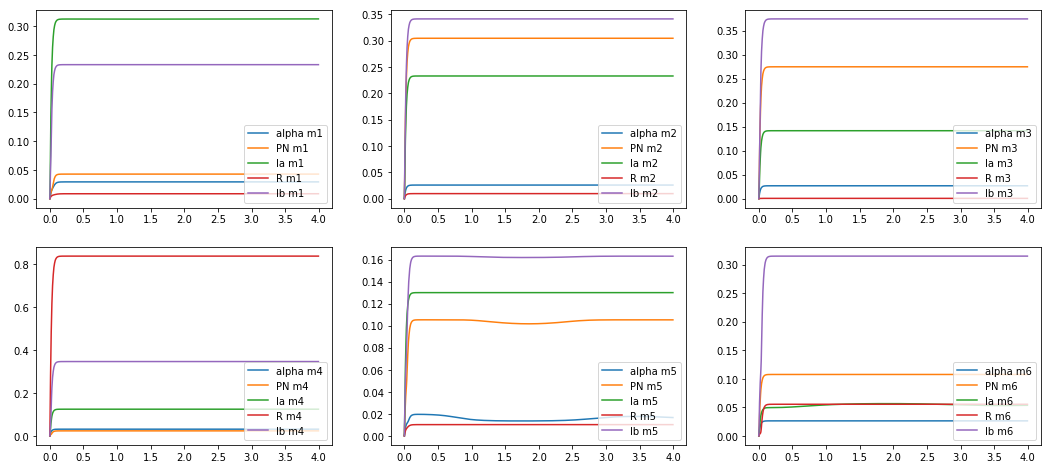

Execution time: 36400.30216193199 seconds
[[1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.17322155041832116, 0.09559949742940405, -0.010112543938806617, -0.16433301113364074, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.15871892895629075], [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -0.7911107926678596, -0.7291302846827832, -0.8541391891053229, -0.8563744923051402, -0.8261260537170148, -0.9995948130344706, -0.2622398916770107], [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -1.040

In [6]:
w = sc.grad_desc()
print(w)

In [11]:
# Synapse weights after 2 iterations: [0.5, 0.4]

# (0.3,0.15)
w = [[1.5, -1.1, -1.1, 2.5, 1.5, -1.9, -1.5, 1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, 1.5, -1.9, -1.5, 2.5, 1.5, 1.5, 1.5, -1.5, -1.0808233961108602, 0.45557481159147134, 0.6625214580252528, -1.035592716297494, -0.8025515461029848, 0.5531896647072667, 0.4296720070920256, 0.26895061296189116, -0.005109424535330254, 0.12957822835567762, 0.10024285613737621, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.17322155041832116, 0.09559949742940405, -0.010112543938806617, -0.16433301113364074, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.15871892895629075], [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -0.7911107926678596, -0.7291302846827832, -0.8541391891053229, -0.8563744923051402, -0.8261260537170148, -0.9995948130344706, -0.2622398916770107], [-2.1, 2.1, -2.1, -2.1, 2.1, 2.1, -2.1, 2.1, 2.1, 0.03513505471747036, -1.0525537532193439, 0.01889389670608327, 0.07960170699158109, -1.0407748494360625, -0.7372512060543805, 0.015349330181512022, -0.7926376634678551, -0.36060140678900954, 0.49620120411787016], [2.9, -2.9, 2.9, 2.9, 2.9, 2.9, -0.023141752983194153, -0.810784792068097, -0.03335270022000403, -0.10927584182177, -0.018309063632626188, 0.13917750129811174, 0.04057954870249145], [2.1, 2.1, 2.1, 0.27466237958571404, 0.28241447382919216, 0.05683772626359129, 0.14310981779390508], [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.586531079087646, -0.3173750308938658, 0.16377018457966908, -0.0686299249869736, -0.3192937725462992, 0.3465285903053844, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, -0.30392790599071157, -0.17560916348237254], [2.5, 2.0, 2.5, 2.0, 2.5, 2.0, 2.0, 2.0, -0.09850560781897333, 0.22500128529942487, 0.1330946881388958, -0.03990160743242116, -0.039130577380254994, 0.1108238007947352, 0.09176207946649328, -0.06312402536471023, 0.46773143608149736], [-2.1, 2.1, -2.1, 2.1, -2.1, 1.6, -2.1, 1.6, -2.1, -2.1, 1.6, -2.1, -0.09521702712895846, -0.08286755753249109, 0.02251846152391851, -0.0031205340348234856, 0.03928443879057342, 0.17823594326208003, -0.15546925411953894, 0.10228057581843364, -0.18233103103444703, -0.03596617202010821, 0.11365414064163915, -0.22207357572607866, 0.35270403851814136], [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1.044762271820196, -0.7087884421532122, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.1727572734521471], [2.1, 2.1, 2.1, 0.9798266669759615, 2.1, 0.5897561346948027, 0.2516671627479715, 0.25976930476652516, -0.07380172706996202, 0.03967078609914432, 0.0935153122504615, 0.20281104693647867, 0.3973932027921051], [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.17295757956568547, 2.0, 2.0, -1.3185440755241489, -1.8562164777324401, -2.5, -1.9626984527478322, 2.0, -2.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -2.5, -1.1543155782769752, -0.6772893791527519, -0.6083950926558988, 0.9517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.1150571626467648, 0.06016792838220181, -0.007939680935575844, 0.038000200094641, 0.03420484936662205, 0.005669913720411701, 0.21076388623381936, 0.21736689912092488, 0.41953765643117624], [-2.1, -2.5, 2.9, 2.4, -2.1, 2.4, -2.1, 2.4, -2.1, -2.9, 2.4, -2.1, 0.05489124763054193, -0.25460361444622404, -0.0642288057541952, -0.06991746606855043, -0.0645319472530756, 0.2627842153710266, -0.16712183838813333, 0.18297567258088243, -0.032749356132471874, -0.12950285383141824, -0.08608799107885468, -0.0664540803316589, 0.14917278796775346], [-1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.03868349747756261, -0.6020159475460238, -0.5722326601388215, -0.47483249564599, -0.40168998893251073, -0.42420558235174033, 0.09565924874416848, 0.1599076004345354, -0.18971340374189993], [2.1, 2.1, 2.1, 0.022420069504339835, 2.1, -0.6303238550374873, 0.10671835877302083, 0.02099410959269432, 0.015023414291289394, 0.21721635763880454, -0.08140148902956285, -0.9137910390363629, 0.3199595937490411], [-2.5, -2.1, 2.0, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 0.6462072114543382, 0.39395682536926035, -0.33279013503732563, -0.6974228595611784, 0.5005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.5841744415475822], [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -1.0063686006317372, -0.8866377086557204, -0.713098303257613, -0.8374429235854562, -0.7053216462836496, -0.7493512306247863, -0.4036103740595907], [-1.9, -1.9, 2.9, -1.9, 2.9, 2.9, -1.9, 2.9, 2.9, 0.10165921998936378, -0.25751959474456876, -0.1675076877805297, -0.5093719207396371, -0.5636347281847506, -0.5789520220150634, -0.21125266687357824, -0.6978700002755511, -0.09627009060385722, -0.026403491636533438], [-2.9, 2.9, 2.9, 2.9, 2.9, 2.9, -0.8267510039273527, 0.5362328662246951, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.31671976651367517], [2.1, 2.1, 2.1, 0.1948650113120095, 0.0903886130141438, 0.050975411167554496, 0.011422470607568236], [2.0, -1.1, -1.1, 2.4, 2.0, -1.1, -1.1, 2.0, 2.0, 2.0, -1.1, 2.0, -1.1, -1.1, 2.4, 2.5, 0.8014692157564789, 0.9710032376503226, -1.1, 0.26698208986846783, 2.0, -1.5, -0.4684665963161868, 2.4, 2.0, 0.6061818755341326, 0.08723044609776087, -1.5, 1.1995981127148587, 2.4, -1.1, -0.27549794094818736, 2.4, 1.5, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.8585221128008135, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.12657642372260153, 0.6156452219339784, 0.365542617296521, 0.05185509426748264, 0.020453003975285045], [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -0.7461450399577921, -1.0549240100621622, -0.8420650668990672, -0.8861715702849549, -0.839366149225655, -0.9180844654169202, -0.6568032316086185, -0.6398658827489919, 0.07986235687947951], [-2.5, 1.6, -2.1, 2.0, -2.5, 2.5, -2.1, -2.5, 1.5, -2.1, -2.1, 2.9, -0.0015012693932636711, 0.09856841369566588, -0.02358836656736496, 0.18869387880672506, -0.23068629232945004, -0.024591063352150333, -0.1723387390364124, -0.04256418660415562, 0.040805821342551285, -0.0941070018731825, -0.040978665510634116, 0.12777980996228266, 0.13572139821834794], [1.5, -1.9, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 0.25253438268942463, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, 0.09387091411302134], [1.1, 1.1, 1.411141331298305, 1.5, 0.3861789062132357, 1.5, -0.9330067128179697, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, -0.30953127361948923, -0.09106627291137759], [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -0.20151383586656813, -0.4747895331696267, 0.6983252320898046, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, -0.028578885606721588, -0.4894874628944024, -0.5992879049026084, 0.16144944026798047, 0.005063939131333461, 0.6741195210286743, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.08745009326526171], [-1.1, -1.1, 1.6, 1.6, -1.1, 1.6, -1.1, -1.5, 1.6, -1.1, -1.5, 1.1, 0.9442560854270845, 0.7414636623546127, -0.8661408416068481, -0.7051148592223746, 1.066254474436637, -1.048102297684842, 0.7345472733379894, 0.8271177977626887, -1.0952109005534343, 0.12489875211502066, 0.23984644566873892, -1.0080186673489524, -0.019800102906929906], [-1.9, 1.5, 1.9, 1.9, 1.9, 1.5, 1.5, 1.5, 0.0003445763549601022, 0.0436041412907357, 0.05230458371466107, 0.0546564579368124, -0.060672691209174345, -0.024677671116277944, -0.4694214650982186, -0.3152031064617331, 0.04547858154571355], [1.1, 1.1, 0.3655330370398051, 1.1, 0.053056356320674514, 1.1, -0.9478261987351084, -0.7100092265560642, -0.9559850458607481, -0.9008997390737045, -0.9323326425964306, -1.0073243934402565, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# (0.3,0.45)
#w = [[2.5, -2.5, -2.5, 1.5, 2.5, -2.5, -2.5, 2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.5, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.5, 2.0, 2.0, -2.5, -0.08082339611086031, -0.1444251884085287, 0.06252145802525277, -0.03559271629749422, 0.19744845389701515, -0.04681033529273321, -0.1703279929079744, 0.26895061296189116, -0.005109424535330254, 0.029578228355677638, 0.00024285613737623502, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.07322155041832118, 0.09559949742940405, -0.11011254393880654, -0.2643330111336407, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.05871892895629077], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, -0.42612605371701473, -0.5995948130344706, -1.0622398916770108], [-1.1, 1.1, -1.1, -1.1, 1.1, 1.1, -1.1, 1.1, 1.1, 1.0351350547174705, -1.0525537532193439, 1.0188938967060834, 1.079601706991581, -1.0407748494360625, -0.7372512060543805, 1.015349330181512, -0.7926376634678551, -0.8606014067890095, -0.9037987958821299], [2.5, -2.1, 2.5, 2.5, 2.5, 2.5, 0.07685824701680583, -0.010784792068096904, 0.06664729977999595, -0.009275841821769992, 0.08169093636737379, 0.23917750129811177, 0.14057954870249145], [2.1, 2.1, 2.1, 0.27466237958571404, 0.28241447382919216, 0.05683772626359129, 0.24310981779390506], [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, 0.0471434958222976, -2.5, 0.959077195591886, 0.583329868397066, -0.6481936661473469, -0.5584814458520745, 0.4617086077387334, 0.5594135597081853, -0.6867716118317652, -0.48479625472426086, 0.3526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.6680118584056915, -0.38630808994936644, -0.5411809849798448, 0.3618587325947036, 0.5884772991678382, 0.634732361637619, -0.32485791923809193, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.18024008172969802, -0.586531079087646, -0.3173750308938658, 0.6637701845796691, -0.0686299249869736, -0.3192937725462992, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, -0.30392790599071157, -0.17560916348237254], [1.1, 1.6, 1.1, 1.6, 1.1, 1.6, 1.1, 1.6, -1.0985056078189732, -0.7749987147005752, -0.8669053118611041, -1.0399016074324212, -1.0391305773802548, -0.8891761992052648, -0.9082379205335067, -1.06312402536471, -0.9322685639185027], [-1.1, 1.1, -1.1, 1.6, -1.1, 1.1, -1.1, 1.1, -1.1, -1.1, 1.1, -1.1, 0.9047829728710416, -1.082867557532491, 1.0225184615239185, -1.0031205340348235, 1.0392844387905735, -0.82176405673792, 0.8445307458804611, -0.8977194241815665, 0.817668968965553, 0.9640338279798918, -0.8863458593583609, 0.7779264242739214, -1.0472959614818587], [2.5, -2.1, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.6447622718201962, 0.09121155784678786, 0.652874650350254, 0.5109436681985137, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, -0.07275727345214711], [1.1, 1.1, 1.1, 0.37982666697596157, 1.1, -0.010243865305197275, -0.7483328372520286, -0.7402306952334747, -1.073801727069962, -0.9603292139008557, -0.9064846877495385, 1.0028110469364786, -1.002606797207895], [-1.1, -1.1, 1.6, 1.6, -1.1, -1.1, 2.4, 2.0, 2.4, 2.0, -1.5, 2.0, -1.1, -1.5, 1.6, 2.0, 2.0, -1.1, 0.0729575795656855, 1.6, 2.0, 0.08145592447585115, -0.4562164777324401, -1.1, -0.9626984527478322, 2.4, -1.1, 1.8916705547275723, 1.6, 2.0, 1.132263501148206, 1.8915890404699183, -1.1, -0.15431557827697517, 0.3227106208472481, 0.3916049073441012, -0.44829187133259235, -0.5844691158719415, 0.6980860839646308, 0.46724068161106735, -0.3059599679180597, -0.3950208513584482, -0.6777900559687428, -0.5729188593765748, 0.6871048526910315, -0.676080499766285, -0.19679307522255896, 0.033695947884497146, -0.4397863340525495, -0.37536141686880925, -0.5260241369384693, 0.08296471294546842, 0.03383193769537379, -0.4167614680812247, -0.600744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.5084310114198636, -0.32258648570187753, -0.5020163289652803, -0.31420179179042584, -0.5278512561601589, -0.1194712876871194], [1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, -0.08494283735323521, -0.1398320716177982, -0.2079396809355758, -0.16199979990535895, -0.1657951506333779, -0.19433008627958825, 0.010763886233819353, 0.017366899120924872, -0.08046234356882379], [-1.1, -1.1, 1.9, 1.5, -1.1, 1.5, -1.5, 1.5, -1.1, -1.9, 1.1, -1.1, 1.0548912476305419, 0.745396385553776, 0.7357711942458048, 0.7300825339314496, 0.9354680527469245, 1.0627842153710265, 0.8328781616118666, 0.9829756725808825, 0.9672506438675281, 0.8704971461685818, 0.7139120089211454, 0.9335459196683411, -0.8508272120322465], [-1.1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.7613165025224374, -0.6020159475460238, -0.5722326601388215, -0.47483249564599, -0.40168998893251073, -0.42420558235174033, -0.4043407512558315, 0.1599076004345354, -0.9897134037419], [1.9, 1.9, 1.9, -0.07757993049566014, 1.9, 0.6696761449625127, -0.09328164122697913, -0.17900589040730563, -0.18497658570871056, 0.6172163576388046, 0.7185985109704371, 0.8862089609636372, -0.1800404062509589], [-2.5, -2.5, 2.5, 2.0, -2.5, -2.9, 2.0, 2.5, 2.0, -2.9, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.9, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, -0.7159805819790859, -0.9848308266440094, 1.0462072114543384, 0.7939568253692604, -0.7327901350373256, -1.0974228595611786, 0.9005263000573995, 0.6859923560652879, 0.6749019526587301, -0.5273080496544464, -0.45087020003588674, 0.5803467156946233, 0.3660981573124148, 0.6715080596656018, 0.5033433982677584, -0.3972039165588197, 0.4826570550903778, -0.5950808438818646, -0.35685892583543144, 0.4794926415361151, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [2.5, 2.5, 2.5, 2.0, 2.5, 2.0, 0.7936313993682629, 0.9133622913442795, 1.086901696742387, 0.9625570764145438, 1.0946783537163505, 1.0506487693752136, 0.09638962594040928], [-1.1, -1.1, 1.1, -1.1, 1.1, 1.1, -1.1, 1.1, 1.1, 0.5016592199893638, 0.6424804052554313, 0.8324923122194703, -0.10937192073963709, 0.8363652718152494, 0.8210479779849367, 0.18874733312642178, 0.7021299997244489, 0.8037299093961427, -0.026403491636533438], [-2.9, 2.1, 2.5, 2.5, 2.5, 2.5, -0.8267510039273527, 0.636232866224695, 0.556992213834325, 0.49751589253961126, 0.4841540714332578, 0.5279252387539375, -0.08328023348632484], [2.9, 2.9, 2.9, 0.9948650113120096, 0.8903886130141438, 0.8509754111675545, 0.41142247060756826], [1.1, -1.5, -1.1, 2.1, 1.1, -1.1, -1.1, 1.1, 1.1, 1.1, -1.1, 1.1, -1.5, -1.1, 2.1, 1.1, 0.3014692157564789, 0.4710032376503226, -1.1, 0.6669820898684679, 1.1, -1.5, -0.4684665963161868, 2.9, 1.1, 0.5061818755341326, 0.08723044609776087, -1.5, 0.6995981127148587, 1.5, -1.5, -0.27549794094818736, 2.9, 1.1, -0.5498789985190359, 0.742348224624485, 0.974922619046688, -0.6814153248120884, -0.6340915478297486, 0.8604699324446442, 0.45852211280081345, -0.681182602621066, -0.6729128864913447, -0.45283073595925727, 0.602867753097335, -0.5053794613141698, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, -0.6959710248815287, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, -0.680874253708638, -0.6473544374792053, -0.32462609287089333, -0.6581501852682634, 0.33859019478084407, -0.4526158447057095, -0.6265764237226015, 0.6156452219339784, 0.365542617296521, -0.44814490573251736, -0.47954699602471496], [1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 0.05385496004220791, -0.25492401006216214, -0.04206506689906714, -0.08617157028495481, -0.039366149225654956, -0.11808446541692019, -0.2568032316086185, -0.2398658827489919, -0.8201376431205205], [-1.1, 1.1, -1.1, 1.1, -1.1, 1.1, -1.1, -1.1, 1.1, -1.1, -1.1, 1.1, 0.9984987306067363, -0.9014315863043342, 0.976411633432635, -0.811306121193275, 0.76931370767055, -1.0245910633521502, 0.8276612609635876, 0.9574358133958444, -0.9591941786574487, 0.9058929981268175, 0.9590213344893659, -0.8722201900377173, -0.864278601781652], [1.5, -1.1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.4701366744912457, 1.0525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, -0.39837602224252244, -0.4616632976490867, -0.7061290858869786], [1.1, 1.1, 1.011141331298305, 1.1, 0.3861789062132357, 1.1, -0.9330067128179697, -0.7818384256269726, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, -0.30953127361948923, -0.5910662729113776], [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, -1.469022278700716, -1.133812867426503, -2.5, 0.7780283911173442, 2.0, -2.5, 1.7149654801655982, 2.0, 2.0, -1.1299127464859344, -1.0481228394237365, -2.5, -2.0562255535388942, 2.0, -2.5, 0.43283842135008177, 2.0, 2.0, -1.001513835866568, -0.4747895331696267, 1.0983252320898047, 0.5718527707680983, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, 0.4326073402585904, 0.5816990270499733, -0.3740465634254481, -0.31744614000723664, -0.3737339649219445, 0.3077206076764002, 0.38892748820467554, -0.3381168425219795, 0.5231897488464103, 0.47192210186959377, 0.4714211143932784, -0.4894874628944024, -0.5992879049026084, -0.33855055973201953, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, -0.2737301039723131, -0.004898392901428628, 0.007344864833042086, 0.04080842427639603, -0.19623091031957063, -0.16212883504767317, -0.20294489333942123, -0.028045419458118503, 0.08745009326526171], [-1.1, -1.1, 1.1, 1.1, -1.1, 1.1, -1.1, -1.1, 1.1, -1.1, -1.1, 1.1, 0.9442560854270845, 0.7414636623546127, -0.8661408416068481, -0.7051148592223746, 1.066254474436637, -1.048102297684842, 0.7345472733379894, 0.8271177977626887, -1.0952109005534343, 0.9248987521150207, 1.039846445668739, -1.0080186673489524, -0.81980010290693], [-1.1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0.8003445763549601, -0.3563958587092643, -0.34769541628533895, -0.3453435420631876, -0.46067269120917437, -0.42467767111627797, -0.4694214650982186, -0.3152031064617331, -0.7545214184542866], [1.9, 1.9, 0.7655330370398051, 1.9, 0.45305635632067454, 1.9, -0.14782619873510838, 0.08999077344393586, -0.15598504586074802, -0.10089973907370442, -0.13233264259643052, -0.20732439344025655, -0.7531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# (0.45,0.45)
#w = [[2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.0, -2.5, -2.5, 1.5, 2.5, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.5, -0.08082339611086031, -0.1444251884085287, 0.06252145802525277, -0.03559271629749422, 0.19744845389701515, -0.04681033529273321, -0.1703279929079744, 0.26895061296189116, -0.005109424535330254, 0.029578228355677638, 0.00024285613737623502, -0.054486218905605344, 0.2381444980770978, 0.2695728516172796, -0.01166528326705385, 0.07322155041832118, 0.09559949742940405, -0.11011254393880654, -0.2643330111336407, -0.00802072880589294, 0.1863749640444654, 0.09845046481311698, 0.20659575140846365, 0.05871892895629077], [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, -0.42612605371701473, -0.5995948130344706, -0.6622398916770107], [-1.9, 1.9, -1.9, -1.5, 1.9, 1.9, -1.5, 1.9, 1.9, 1.0351350547174705, -0.2525537532193437, 0.6188938967060833, 0.6796017069915811, -0.24077484943606242, 0.06274879394561955, 0.615349330181512, 0.007362336532144853, -0.4606014067890095, -0.10379879588212981], [2.5, -2.9, 2.5, 2.5, 2.5, 2.5, 0.8768582470168058, -0.010784792068096904, 0.46664729977999597, 0.39072415817823003, 0.4816909363673738, 0.6391775012981118, 0.5405795487024915], [2.5, 2.5, 2.5, 0.27466237958571404, 0.28241447382919216, 0.05683772626359129, 0.24310981779390506], [2.0, -2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 2.0, -2.5, -2.5, 2.0, 2.0, 2.0, -2.5, 0.8371200427756724, 2.0, 2.0, 0.8253393838184282, -1.508336965189399, -2.5, 0.7907940856230207, 2.0, -2.5, 1.8750446706415755, 2.0, 2.0, 0.8112507817961032, -0.3528565041777024, -2.5, 0.959077195591886, 0.583329868397066, -0.24819366614734684, -0.15848144585207447, 0.06170860773873338, 0.15941355970818527, -0.28677161183176514, -0.08479625472426083, -0.047314752584893705, 0.10837397357485823, -0.05900608592055118, -0.23680784983247616, 0.2680118584056915, 0.013691910050633582, -0.14118098497984477, -0.03814126740529644, 0.18847729916783817, 0.234732361637619, 0.07514208076190809, 0.13068552754938734, -0.021989375971126712, -0.05288241210635014, -0.219759918270302, -0.186531079087646, 0.0826249691061342, -0.736229815420331, -0.46862992498697364, 0.5807062274537008, -0.5534714096946156, -0.250274339883409, -0.205909812954855, -0.29986584784491743, 0.5940625864693194, 0.5960720940092885, -0.5756091634823726], [1.9, 2.4, 1.9, 2.4, 1.9, 1.9, 1.9, 1.9, -0.2985056078189733, 0.025001285299424858, -0.0669053118611041, -0.23990160743242106, -0.2391305773802549, -0.08917619920526476, -0.10823792053350667, -0.26312402536471013, -0.9322685639185027], [-1.1, 1.1, -1.1, 1.6, -1.1, 1.1, -1.1, 1.1, -1.1, -1.1, 1.1, -1.1, 0.9047829728710416, -1.082867557532491, 1.0225184615239185, -1.0031205340348235, 1.0392844387905735, -0.82176405673792, 0.8445307458804611, -0.8977194241815665, 0.817668968965553, 0.9640338279798918, -0.8863458593583609, 0.7779264242739214, -1.0472959614818587], [1.9, -1.9, 1.9, 1.1, 1.1, 1.1, 1.1, 1.1, -0.35523772817980376, 0.29121155784678787, -0.3471253496497459, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -0.27275727345214706], [1.1, 1.1, 1.1, 0.37982666697596157, 1.1, -0.010243865305197275, -0.7483328372520286, -0.7402306952334747, -1.073801727069962, -0.9603292139008557, -0.9064846877495385, 1.0028110469364786, -1.002606797207895], [-1.1, -1.1, 2.0, 2.0, -1.1, -1.5, 2.0, 2.0, 2.0, 2.0, -1.5, 2.0, -1.1, -1.5, 2.0, 2.0, 2.0, -1.1, 0.0729575795656855, 2.0, 2.0, -0.7185440755241489, -0.8562164777324401, -1.5, -0.9626984527478322, 2.0, -1.5, 1.8916705547275723, 2.0, 2.0, 1.132263501148206, 1.8915890404699183, -1.5, -0.15431557827697517, 0.3227106208472481, 0.3916049073441012, -0.04829187133259233, -0.5844691158719415, 0.6980860839646308, 0.46724068161106735, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, 0.18710485269103144, 0.32391950023371496, -0.19679307522255896, 0.033695947884497146, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, 0.08296471294546842, 0.03383193769537379, 0.5832385319187753, 0.399255162774531, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.6863224500106241, 0.06388028565894938, 0.6412099328407679, 0.4915689885801365, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [1.1, 1.1, 1.1, 1.6, 1.1, 2.1, 1.1, 2.1, -0.8849428373532353, -0.9398320716177982, -1.0079396809355758, -0.961999799905359, -0.965795150633378, -0.9943300862795883, -0.7892361137661807, -0.7826331008790752, -0.18046234356882374], [-1.9, -1.9, 1.9, 2.4, -1.9, 1.9, -1.9, 1.9, -1.9, -1.9, 1.9, -1.9, 0.25489124763054194, -0.05460361444622408, -0.26422880575419516, -0.6699174660685504, 0.13546805274692442, -0.33721578462897345, 0.032878161611866574, -0.41702432741911755, 0.16725064386752808, 0.07049714616858171, -0.6860879910788547, 0.5335459196683411, -0.050827212032246494], [-1.1, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, -0.5386834974775626, 0.3979840524539761, 0.42776733986117854, 0.52516750435401, 0.5983100110674893, 0.5757944176482597, 0.5956592487441685, 0.6599076004345354, -0.08971340374189994], [2.9, 2.9, 2.9, -0.07757993049566014, 2.9, 1.1696761449625126, 0.9067183587730209, 0.8209941095926944, 0.8150234142912894, 0.6172163576388046, 0.7185985109704371, 0.8862089609636372, -0.1800404062509589], [-2.5, -2.5, 2.9, 2.4, -2.5, -2.5, 2.4, 2.0, 2.0, -2.5, -2.5, 2.0, 1.5, 2.0, 2.0, -2.5, 2.5, -2.5, -2.5, 2.0, 2.0, 1.5, 2.0, -2.5, -0.7159805819790859, -0.5848308266440094, 0.5462072114543384, 0.2939568253692604, -0.33279013503732563, -0.6974228595611784, 0.40052630005739953, 0.585992356065288, 0.5749019526587302, -0.5273080496544464, -0.45087020003588674, 0.4803467156946233, 0.2660981573124148, 0.5715080596656017, 0.4033433982677585, -0.3972039165588197, 0.38265705509037784, -0.5950808438818646, -0.35685892583543144, 0.3794926415361151, 0.5443226592391508, 0.2616573667377219, -0.10010116435844259, -0.9841744415475823], [1.6, 1.6, 1.6, 1.6, 1.6, 1.6, -0.006368600631737165, -0.3866377086557205, -0.2130983032576131, -0.33744292358545624, -0.20532164628364952, -0.2493512306247863, -0.30361037405959074], [-1.1, -1.6, 2.9, -1.6, 2.4, 2.4, -1.6, 2.4, 2.4, 0.9016592199893638, 1.0424804052554313, -0.9675076877805298, 0.7906280792603629, -0.9636347281847506, -0.4789520220150634, 1.0887473331264217, 0.30212999972444887, -0.09627009060385722, -0.5264034916365334], [-2.1, 1.9, 1.5, 1.5, 1.5, 1.5, -0.02675100392735258, 0.23623286622469497, 0.15699221383432493, 0.09751589253961124, 0.08415407143325776, 0.12792523875393746, 0.41671976651367515], [2.9, 2.9, 2.9, 0.9948650113120096, 0.8903886130141438, 0.8509754111675545, -0.08857752939243176], [1.5, -2.5, -2.5, 2.5, 1.5, -2.5, -2.5, 1.5, 1.5, 1.5, -2.5, 1.5, -2.5, -2.5, 2.5, 1.5, 0.3014692157564789, 0.4710032376503226, -2.5, -0.23301791013153217, 1.5, -2.5, -1.8684665963161868, 2.5, 1.5, 0.10618187553413261, -0.9127695539022391, -2.5, 0.6995981127148587, 1.5, -2.5, -1.6754979409481874, 2.5, 1.5, 0.8501210014809641, -0.657651775375515, -0.42507738095331205, 0.7185846751879116, 0.3659084521702513, -0.5395300675553558, -0.5414778871991865, 0.318817397378934, 0.32708711350865527, 0.5471692640407427, -0.3971322469026651, 0.4946205386858302, -0.4209114168723244, -0.3510570925992292, 0.6501382979693633, 0.6288200041873253, 0.3265883188785339, 0.47927975759592073, -0.32459535807032636, -0.6959710248815287, 0.5592591591505469, -0.3962872257484307, -0.3167821988031785, 0.31912574629136203, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [2.1, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, -0.7461450399577921, -1.0549240100621622, -0.8420650668990672, -0.8861715702849549, -0.839366149225655, -0.9180844654169202, -0.5568032316086186, -0.5398658827489919, -0.8201376431205205], [-2.1, 1.9, -2.5, 1.9, -2.1, 1.9, -2.5, -2.1, 1.9, -2.1, -2.1, 1.9, -0.0015012693932636711, -0.10143158630433413, -0.02358836656736496, -0.011306121193274954, -0.23068629232945004, -0.2245910633521503, -0.1723387390364124, -0.04256418660415562, -0.15919417865744867, -0.0941070018731825, -0.040978665510634116, -0.4722201900377173, -0.464278601781652], [2.5, -2.1, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 0.12986332550875435, -0.7474656173105754, 0.35212150959334937, 0.4255174837880124, 0.5142984688061863, 0.30551377066001795, 0.6016239777574776, 0.5383367023509134, 0.19387091411302132], [2.1, 2.1, 2.011141331298305, 2.1, 0.9861789062132357, 2.1, 0.06699328718203029, 0.2181615743730274, 0.23183067666171786, 0.0861896994940759, 0.022279219038015108, 0.2904687263805107, -0.09106627291137759], [-1.9, -1.9, 2.4, 1.6, -1.9, -1.9, 1.6, 2.0, 1.6, 2.0, -1.9, 2.0, -1.9, -1.9, 1.6, 2.0, -0.8690222787007161, -0.5338128674265029, -1.9, 0.7780283911173442, 1.6, -1.9, 1.7149654801655982, 1.6, 2.0, -0.5299127464859344, -0.44812283942373654, -1.1, -1.0562255535388942, 2.0, -1.9, -0.46716157864991825, 1.6, 2.0, 0.39848616413343185, 0.02521046683037334, -0.3016747679101954, -0.4281472292319018, 0.16388029016001587, -0.11788126516410383, -0.6306669294494955, -0.3098283376104054, -0.6112183166484333, -0.4587066782797368, 0.08338800099248794, -0.305598657684106, 0.19070102981960618, 0.12198435499847288, -0.5673926597414096, -0.4183009729500266, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.6922793923235998, -0.6110725117953244, 0.1618831574780205, -0.4768102511535897, -0.5280778981304062, -0.5285788856067216, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, -0.32588047897132566, -0.02984020131182913, 0.0331810036426447, -0.3293235434338268, -0.6742642111892087], [1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, -1.0737301039723133, -0.8048983929014286, -0.792655135166958, -0.7591915757236041, -0.9962309103195707, -0.9621288350476732, -1.0029448933394214, -0.8280454194581186, -0.3125499067347383], [-1.9, -1.9, 2.0, 2.0, -1.9, 2.0, -1.9, -1.9, 2.0, -1.9, -1.9, 2.0, 0.14425608542708446, -0.05853633764538735, 0.13385915839315188, 0.2948851407776255, 0.26625447443663686, -0.04810229768484198, -0.06545272666201057, 0.4271177977626887, -0.09521090055343423, 0.5248987521150207, 0.6398464456687389, -0.008018667348952402, -0.81980010290693], [-1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 0.4003445763549601, -0.3563958587092643, -0.34769541628533895, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [1.1, 1.1, 0.3655330370398051, 1.1, 0.053056356320674514, 1.1, -0.9478261987351084, -0.7100092265560642, -0.9559850458607481, -0.9008997390737045, -0.9323326425964306, -1.0073243934402565, -0.3531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# Synapse weights after 6 iterations: [1.0, 1.0, 0.5, 0.5, 0.2, 0.2]

# (0.45,0.45)
#w = [[1.6, -3.0, -3.0, 2.4000000000000004, 2.5, -3.0, -3.0, -0.2, 1.0, -3.0, -3.0, 3.4000000000000004, 2.5, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 3.4000000000000004, 1.5, 2.0, 2.0, -4.0, -0.1808233961108603, -0.8444251884085288, -0.8374785419747472, -0.13559271629749414, 0.09744845389701506, -0.9468103352927333, -1.0703279929079745, 0.16895061296189118, -0.10510942453533023, -0.8704217716443223, -0.8997571438626237, -0.15448621890560532, 0.13814449807709783, -0.8304271483827204, -1.111665283267054, 0.1732215504183212, -1.004400502570596, -0.010112543938806562, -0.16433301113364074, -1.108020728805893, -0.9136250359555346, -1.001549535186883, -0.8934042485915363, 0.1587189289562907], [-0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -2.3911107926678596, -1.3291302846827833, -1.454139189105323, -1.4563744923051403, -0.9261260537170147, -1.0995948130344706, -2.162239891677011], [-0.5, 0.0, -0.8, -0.5, -0.2, 1.0, -0.5, 0.0, 1.0, 2.6351350547174706, -2.152553753219344, 2.1188938967060835, 2.679601706991581, -1.6407748494360626, -0.8372512060543804, 1.115349330181512, -0.8926376634678552, -0.9606014067890095, -3.40379879588213], [3.0, -3.8, 3.0, 3.0, 3.0, 3.0, -0.023141752983194097, 0.08921520793190307, -0.03335270022000403, -0.10927584182176997, -1.0183090636326262, -0.8608224987018882, -0.35942045129750866], [2.0, 2.0, 2.0, 0.17466237958571407, 0.6824144738291922, 0.4568377262635913, 1.443109817793905], [2.0, -3.0, -3.0, 2.0, 1.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 1.0, 2.0, -3.0, 0.037120042775672435, 2.0, 2.0, 0.8253393838184282, -2.008336965189399, -3.0, 1.7907940856230207, 2.0, -3.0, 0.37504467064157554, 2.0, 3.0, 0.8112507817961032, 0.0471434958222976, -3.0, -0.04092280440811402, 2.0833298683970662, -1.648193666147347, -1.0584814458520746, 1.4617086077387333, 1.0594135597081853, -1.186771611831765, -0.9847962547242608, 0.8526852474151063, 1.0083739735748583, 0.8409939140794489, -1.1368078498324763, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [-0.49999999999999994, 1.0, 1.0, 0.5, -0.3, 0.5, -0.3, -0.5, -2.6985056078189733, -0.8749987147005751, -0.9669053118611042, -1.139901607432421, -0.939130577380255, -0.9891761992052648, -1.4082379205335067, -1.3631240253647101, -2.0322685639185023], [-1.0, -0.5, -1.0, 2.0, -1.0, -0.5, -1.0, -0.5, -1.5, -1.0, -0.5, -1.5, 2.0047829728710416, -3.182867557532491, 2.6225184615239185, -1.1031205340348236, 1.1392844387905734, -1.42176405673792, 0.944530745880461, -0.9977194241815663, 0.9176689689655531, 1.0640338279798918, -0.9863458593583607, 0.8779264242739213, -2.1472959614818588], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.8552377281798038, 2.191211557846788, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -1.472757273452147], [0.0, 0.0, 0.0, 0.37982666697596157, 0.0, -0.010243865305197275, -2.8483328372520287, -2.340230695233475, -2.673801727069962, -2.5603292139008555, -2.5064846877495386, 3.1028110469364787, -3.102606797207895], [-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 1.3, 1.0, 1.0, -2.0, 0.6000000000000001, -2.0, -2.0, 1.0, 2.0, 0.6000000000000001, -2.0, -1.8270424204343145, 1.0, 2.0, -0.3185440755241489, -1.3562164777324401, -2.0, -1.4626984527478322, 1.6, -2.0, 2.3916705547275723, 1.0, 2.0, -0.36773649885179394, 2.491589040469918, -1.0, 0.14568442172302482, -0.1772893791527519, -0.1083950926558988, -0.9482918713325923, -1.0844691158719415, -0.8019139160353692, -0.03275931838893262, -0.8059599679180597, -0.8950208513584482, -1.1777900559687429, -1.0729188593765748, -0.8128951473089685, -1.176080499766285, -1.1967930752225588, -0.9663040521155029, -0.9397863340525495, 0.12463858313119075, -0.026024136938469222, -0.9170352870545315, -0.9661680623046263, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -1.1196497960288463, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.315057162646765, 1.9601679283822018, 0.8920603190644242, 0.938000200094641, 0.9342048493666221, 0.9056699137204117, 1.1107638862338194, 1.117366899120925, -1.9804623435688238], [-1.5, -1.5, 0.0, 0.0, -1.5, 0.5, -1.5, 0.5, -1.5, -1.5, 0.0, -1.5, 3.154891247630542, 1.345396385553776, -2.6642288057541954, -2.6699174660685507, 0.5354680527469244, -2.3372157846289734, 0.4328781616118666, -0.9170243274191175, 0.5672506438675281, 0.47049714616858174, -0.18608799107885463, 0.5335459196683411, -3.3508272120322466], [-3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.3613165025224374, 0.8979840524539762, 0.9277673398611785, 1.02516750435401, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.5897134037419], [5.2, 4.5, 4.5, 0.7224200695043399, 4.5, -0.33032385503748735, 3.006718358773021, 2.4209941095926943, 2.4150234142912894, 2.617216357638805, 2.3185985109704372, -1.113791039036363, -0.1800404062509589], [-3.0, -3.0, 2.0, 2.0, -3.0, -3.0, 2.0, 2.0, 2.0, -3.0, -3.0, 2.0, 3.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, 2.0, 2.0, -3.0, -1.3159805819790857, -1.0848308266440094, 1.1462072114543382, 0.8939568253692604, -0.8327901350373257, -1.1974228595611784, 1.0005263000573994, 1.1859923560652879, 1.17490195265873, -1.0273080496544464, -0.9508702000358867, 1.0803467156946231, 0.8660981573124148, 1.1715080596656018, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 0.4936313993682628, 0.6133622913442796, 0.786901696742387, 0.6625570764145439, 0.7946783537163506, 0.7506487693752137, 0.09638962594040928], [-0.6000000000000001, -0.09999999999999998, 0.8, -0.3, 1.0, 0.4, -1.0, 1.0, 0.4, 1.0016592199893637, 1.1424804052554314, -1.0675076877805296, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438], [-3.4000000000000004, 3.0, 3.0, 3.0, 3.0, 3.0, -0.9267510039273525, 0.936232866224695, 1.056992213834325, 0.9975158925396113, -0.015845928566742218, 0.02792523875393743, 0.6167197665136752], [1.5, 1.5, 1.5, -0.40513498868799047, -0.5096113869858562, -0.5490245888324454, -0.5885775293924318], [0.0, -3.0, -2.0, 4.0, 0.0, -2.0, -2.0, 2.0, 1.0, 1.0, -2.0, 0.0, -3.0, -3.0, 3.0, 1.0, -0.1985307842435211, -0.028996762349677407, -1.0, -0.7330179101315322, 1.0, -3.0, -2.368466596316187, 3.0, 1.0, -0.3938181244658674, -1.4127695539022391, -3.0, 0.19959811271485872, 1.0, -3.0, -2.1754979409481874, 3.0, 1.0, -1.049878998519036, -0.1576517753755151, -0.925077380953312, -1.1814153248120884, -1.1340915478297486, -1.0395300675553558, -1.0414778871991865, -1.1811826026210661, -1.1729128864913447, -0.9528307359592573, 1.102867753097335, -1.0053794613141698, 1.0790885831276755, 1.1489429074007709, -0.8498617020306367, -0.8711799958126747, 0.8265883188785339, 0.9792797575959207, 1.1754046419296738, 0.8040289751184713, -0.9407408408494531, 1.1037127742515693, 1.1832178011968215, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, 0.8418498147317366, 0.8385901947808441, -0.9526158447057095, -0.12657642372260153, 1.1156452219339785, 0.865542617296521, 0.05185509426748264, 0.020453003975285045], [3.5, 3.0, 3.5, 2.0, 2.0, 2.0, 2.0, 2.0, 1.5538549600422078, 1.045075989937838, 1.2579349331009329, 1.213828429715045, 1.2606338507743449, 1.1819155345830799, 1.0431967683913814, 1.0601341172510081, 1.0798623568794796], [-3.5, 3.0, -1.8, 2.0, -3.0, 2.0, -2.0, -2.5, 3.0, -2.0, -3.0, 1.0, 1.498498730606736, 1.3985684136956658, 1.476411633432635, 1.488693878806725, 1.2693137076705499, 1.2754089366478496, 1.3276612609635874, 1.4574358133958443, 1.3408058213425513, 1.4058929981268173, 1.4590213344893659, 1.4277798099622827, -1.364278601781652], [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.9701366744912456, 2.1525343826894248, -1.1478784904066506, -1.0744825162119875, -0.9857015311938137, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -1.8061290858869787], [-0.5, -0.5, 0.911141331298305, -0.5, 0.8861789062132357, -0.5, -1.5330067128179694, -1.8818384256269725, -1.3681693233382821, -2.013810300505924, -1.577720780961985, -2.3095312736194895, -1.5910662729113776], [-3.0, -3.0, 2.0, 2.0, -3.0, -3.0, 2.0, 2.0, 2.0, 2.0, -3.0, 2.0, -3.0, -3.0, 2.0, 2.0, -0.4690222787007161, 0.06618713257349712, -3.0, -0.22197160888265577, 2.0, -3.0, 1.7149654801655982, 2.0, 2.0, 0.3700872535140656, -1.5481228394237365, -3.0, -2.5562255535388942, 2.0, -3.0, 0.9328384213500818, 2.0, 2.0, -1.1015138358665681, -0.9747895331696267, 1.6983252320898048, 1.0718527707680983, -0.8361197098399842, -1.117881265164104, 0.8693330705505045, 1.1901716623895946, 0.8887816833515667, 1.0412933217202631, -0.9166119990075121, 0.194401342315894, -0.8092989701803939, -0.8780156450015271, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, -0.6737301039723131, -0.4048983929014287, -0.39265513516695794, -0.35919157572360394, -0.5962309103195707, -0.5621288350476732, -0.6029448933394213, -0.42804541945811847, -2.3125499067347386], [-1.0, -1.0, 0.5, 0.0, -1.0, -0.2, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 2.044256085427085, 1.8414636623546126, -2.466140841606848, -2.3051148592223747, 2.666254474436637, -1.6481022976848418, 1.8345472733379895, 0.9271177977626888, -1.6952109005534342, 1.5248987521150206, 1.139846445668739, -1.1080186673489523, -2.3198001029069304], [-2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9003445763549601, -0.8563958587092644, -0.847695416285339, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, -0.8545214184542864], [0.2, 0.0, 0.3655330370398051, 0.0, 0.053056356320674514, 0.0, -1.0478261987351085, 0.1899907734439359, -3.055985045860748, -2.0008997390737044, -3.0323326425964305, -2.1073243934402566, -2.253193058247074], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


## BEFORE CHANGING NEURONS' DICTIONARY ##

# Synapse weights after 10 iterations: [0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]

# (0.3,0.15)
#w = [[4.0, -1.0, -2.5, 4.0, 4.0, -1.1, -1.2000000000000002, 4.0, 4.0, -1.0, -3.0, 4.0, 4.0, 4.0, 4.0, -1.0, 4.0, -1.0, -3.0, 4.0, 4.0, 4.0, 4.0, -1.4000000000000001, -0.6808233961108603, 0.9555748115914713, 1.1625214580252528, -0.6355927162974941, -0.4025515461029848, 1.0531896647072667, 0.4296720070920256, -0.3310493870381089, -0.6051094245353302, 0.6295782283556777, 0.6002428561373763, -0.6544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.6732215504183212, -0.004400502570595932, 0.4898874560611934, 0.33566698886635926, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.6587189289562907], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6088892073321405, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, 0.5738739462829853, -0.0995948130344706, 0.03776010832298929], [-3.5, 4.0, -3.5, -3.5, 4.0, 4.0, -3.5, 4.0, 4.0, 0.6351350547174703, -0.6525537532193437, 0.6188938967060833, 0.6796017069915811, -0.6407748494360624, -0.33725120605438047, 0.615349330181512, -0.39263766346785517, 0.03939859321099051, -1.6037987958821296], [2.7, -1.7999999999999998, 2.8000000000000003, 3.1, 3.1, 3.1, -0.42314175298319423, 2.589215207931903, -0.23335270022000404, -0.30927584182177, -0.4183090636326262, -0.2608224987018883, -0.7594204512975085], [2.1, 2.2, 2.7, -1.125337620414286, -1.1175855261708079, -1.3431622737364086, 0.14310981779390508], [4.0, -6.0, -6.0, 4.0, 4.0, -6.0, -5.6, 4.0, 4.0, 4.0, -3.7, 4.0, -2.8, -4.999999999999999, 4.0, 4.0, 4.0, -2.8, 1.6742400855513448, 4.0, 4.0, 1.6506787676368564, -1.3166739303787982, -3.4, 1.5815881712460413, 4.0, -2.0, 3.750089341283151, 4.0, 4.0, 1.6225015635922064, -0.9057130083554048, -3.0, 1.918154391183772, -0.3166701316029339, 0.35180633385265314, 0.4415185541479255, -0.5382913922612667, -0.4405864402918147, 0.31322838816823484, 0.5152037452757392, -0.6473147525848937, -0.4916260264251418, -0.15900608592055115, 0.3631921501675238, -0.3319881415943085, 0.6136919100506335, 0.45881901502015526, 0.3618587325947036, 0.0884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.8014943921810267, 0.6250012852994249, 0.5330946881388958, 0.36009839256757886, 0.36086942261974503, 0.5108238007947352, 0.4917620794664933, -0.1631240253647102, 0.9677314360814974], [-2.3, 4.0, -2.5, 4.0, -2.7, 4.0, -2.7, 4.0, -2.7, -2.7, 4.0, -3.0, -0.2952170271289584, -0.182867557532491, 0.02251846152391851, 0.0968794659651766, 0.03928443879057342, -0.6217640567379199, -0.15546925411953894, -0.6977194241815663, -0.18233103103444703, 0.4640338279798918, -0.6863458593583609, 0.7779264242739214, 0.45270403851814134], [3.5, -2.6, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, -0.35523772817980376, 1.291211557846788, -0.3471253496497459, -0.48905633180148633, -0.6114363837822523, -0.6189110137226618, -0.16977700138009655, 0.18102719529519934, -1.172757273452147], [2.0, 1.7, 2.2, 0.7596533339519231, 2.2, -0.22048773061039456, -1.7483328372520286, -1.7402306952334747, -2.0738017270699616, -1.9603292139008552, -1.9064846877495383, -2.3971889530635213, -0.5026067972078949], [-4.0, -4.0, 4.0, 4.0, -4.0, -4.0, 4.0, 4.0, 4.0, 4.0, -4.0, 4.0, -4.0, -4.0, 4.0, 4.0, 4.0, -4.0, 0.34591515913137094, 4.0, 4.0, -1.6370881510482977, -2.7124329554648803, -4.0, -2.9253969054956643, 4.0, -4.0, 3.7833411094551446, 4.0, 4.0, 2.264527002296412, 3.7831780809398365, -4.0, -1.3086311565539503, 0.1227106208472481, -0.1083950926558988, 0.05170812866740765, 0.3155308841280585, -0.20191391603536923, -0.032759318388932646, 0.19404003208194032, 0.10497914864155178, -0.17779005596874276, -0.07291885937657483, 0.1871048526910315, -0.17608049976628504, -0.19679307522255896, 0.033695947884497146, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, 0.08296471294546848, 0.5338319376953737, 0.5832385319187753, 0.399255162774531, -0.5051730667822435, -0.6196497960288464, -0.4157827580524908, -0.4477649111551424, 0.18632245001062409, -0.4361197143410506, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.3849428373532352, -0.4398320716177982, -0.10793968093557582, -0.06199979990535898, -0.06579515063337793, -0.09433008627958828, -0.38923611376618067, -0.38263310087907515, -0.08046234356882379], [-3.6999999999999997, -4.1, 4.0, 4.0, -4.1, 4.0, -4.1, 4.0, -3.1, -4.5, 4.0, -3.3, 0.5548912476305419, 0.24539638555377596, -0.8642288057541951, -0.5699174660685504, 0.4354680527469244, -0.23721578462897341, 0.3328781616118667, -0.31702432741911757, 0.9672506438675281, 0.8704971461685818, -0.18608799107885465, 0.4335459196683411, 0.049172787967753484], [-4.2, 3.9999999999999996, 3.6, 5.4, 4.7, 4.7, 4.7, 4.7, 0.6613165025224375, -0.30201594754602384, -0.27223266013882147, -0.47483249564598995, -0.40168998893251073, -0.42420558235174033, -0.40434075125583147, 0.15990760043453542, -0.9897134037419], [4.5, 4.5, 4.5, -0.1551598609913203, 4.5, 1.0393522899250254, -0.3932816412269792, -0.07900589040730566, -0.08497658570871058, 1.1172163576388046, -0.18140148902956282, -0.013791039036362862, -0.880040406250959], [-4.3, -4.5, 4.0, 4.0, -4.499999999999999, -4.3, 4.0, 4.0, 4.0, -4.3999999999999995, -4.7, 4.0, 4.0, 4.0, 4.0, -4.7, 4.0, -4.3999999999999995, -4.3, 4.0, 4.0, 4.0, 4.0, -4.5, 0.08401941802091428, -0.2848308266440094, -0.1537927885456618, 0.19395682536926034, -0.43279013503732566, -0.7974228595611784, 0.3005263000573995, 0.48599235606528784, 0.4749019526587301, -0.5273080496544464, 0.04912979996411329, 0.38034671569462325, 0.16609815731241478, -0.02849194033439828, -0.19665660173224153, 0.1027960834411803, -0.21734294490962222, -0.09508084388186458, 0.14314107416456856, -0.22050735846388492, -0.05567734076084924, -0.3383426332622781, -0.3001011643584426, -0.0841744415475822], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.6063686006317371, -0.4866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, 0.1506487693752137, -2.903610374059591], [-3.6, -1.9000000000000001, 4.0, -1.9000000000000001, 4.0, 4.0, -2.2, 4.0, 4.0, 1.8016592199893635, 1.9424804052554312, -0.5675076877805297, 1.690628079260363, -0.5636347281847506, -0.5789520220150634, 1.9887473331264216, -0.19787000027555113, -0.09627009060385722, -2.8264034916365333], [-3.2, 3.4, 3.6999999999999997, 3.6999999999999997, 3.6999999999999997, 3.6999999999999997, 0.0732489960726474, 0.136232866224695, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.027925238753937487, 0.41671976651367515], [3.5, 3.5, 3.5, -0.40513498868799047, -0.5096113869858562, -0.5490245888324454, -0.7885775293924318], [4.0, -2.9, -3.5, 4.0, 4.0, -3.5, -2.4999999999999996, 4.0, 4.0, 4.0, -3.0, 4.0, -3.5, -3.5, 4.0, 4.0, 1.6029384315129578, 1.9420064753006452, -3.5, 0.5339641797369357, 4.0, -3.5, -2.2369331926323737, 4.0, 4.0, 1.2123637510682652, -0.32553910780447826, -3.5, 2.3991962254297174, 4.0, -3.5, -1.8509958818963748, 4.0, 4.0, 0.5501210014809641, 0.342348224624485, 0.574922619046688, -0.2814153248120884, -0.23409154782974861, 0.4604699324446442, 0.45852211280081345, 0.11881739737893399, 0.2270871135086553, 0.44716926404074275, 0.602867753097335, 0.19462053868583024, 0.5790885831276755, 0.6489429074007709, 0.35013829796936324, 0.3288200041873254, 0.02658831887853394, 0.17927975759592074, 0.6754046419296736, 0.0040289751184712785, 0.25925915915054687, 0.6037127742515693, 0.6832178011968215, -0.48087425370863796, 0.05264556252079475, 0.3753739071291067, 0.34184981473173653, 0.33859019478084407, 0.7473841552942906, 0.07342357627739848, 0.6156452219339784, 0.365542617296521, -0.24814490573251735, 0.22045300397528506], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.6538549600422079, 0.34507598993783783, 0.5579349331009329, 0.5138284297150452, 0.560633850774345, 0.4819155345830798, 0.34319676839138147, -0.13986588274899192, 0.5798623568794795], [-4.5, 4.0, -4.5, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, -4.5, -4.5, 4.0, -0.1015012693932637, 0.19856841369566589, -0.423588366567365, -0.011306121193274954, -0.9306862923294501, -0.22459106335215034, -0.5723387390364124, -0.44256418660415564, 0.24080582134255132, 0.005892998126817484, 0.05902133448936586, 0.32777980996228273, -0.06427860178165196], [7.0, -4.699999999999999, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 0.3298633255087543, 0.5525343826894247, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [2.2, 2.2, 2.42228266259661, 2.2, 0.37235781242647137, 2.2, -1.8330067128179697, -1.2818384256269726, -1.2681693233382823, -1.413810300505924, -1.477720780961985, -1.2095312736194894, -2.8910662729113774], [-4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, -2.438044557401432, -1.7676257348530058, -4.5, 1.5560567822346885, 4.0, -4.5, 3.4299309603311965, 4.0, 4.0, -1.7598254929718689, -1.596245678847473, -4.5, -3.6124511070777885, 4.0, -4.5, 0.16567684270016353, 4.0, 4.0, -0.9015138358665682, -0.4747895331696267, 0.8983252320898045, 0.7718527707680982, -0.3361197098399841, -0.6178812651641038, 0.3693330705505044, 0.6901716623895946, 0.3887816833515667, 0.5412933217202631, -0.41661199900751206, 0.694401342315894, -0.3092989701803938, -0.3780156450015271, -0.5673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.6737301039723131, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, -0.41254990673473835], [-3.9, -3.8, 4.0, 4.0, -3.5, 4.0, -3.6999999999999997, -3.6999999999999997, 4.0, -4.699999999999999, -3.3, 4.0, 0.8442560854270845, 0.6414636623546127, -1.1661408416068482, -0.2051148592223745, 0.9662544744366369, -0.548102297684842, 0.6345472733379895, 1.2271177977626886, -0.19521090055343426, 0.8248987521150207, 1.039846445668739, -0.10801866734895238, 0.08019989709307007], [-4.800000000000002, 1.2, 2.6, 1.6, 2.2, 2.3000000000000003, 2.7, 2.7, -1.8996554236450398, -0.8563958587092644, -0.847695416285339, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [3.5, 3.5, 0.031066074079610206, 3.5, -0.393887287358651, 3.5, -0.5478261987351084, -0.31000922655606417, -0.8559850458607481, -0.5008997390737044, 1.0676673574035693, -0.6073243934402566, -1.3531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# (0.15,0.3)
#w = [[4.0, -3.5999999999999996, -3.3, 4.0, 4.0, -3.3, -3.5999999999999996, 4.0, 4.0, -3.5999999999999996, -3.3, 4.0, 4.0, 4.0, 4.0, -4.1000000000000005, 4.0, -3.5999999999999996, -3.5999999999999996, 4.0, 4.0, 4.0, 4.0, -3.3, 0.41917660388913974, 0.25557481159147133, -0.03747854197474726, 0.2644072837025058, 0.2974484538970152, -0.14681033529273324, -0.27032799290797443, 0.6689506129618912, 0.39489057546466977, -0.0704217716443224, -0.0997571438626238, 0.3455137810943947, 0.6381444980770978, 0.6695728516172796, -0.11166528326705386, 0.47322155041832115, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, -0.42612605371701473, -0.0995948130344706, -1.462239891677011], [-3.5, 4.0, -3.5, -3.5, 4.0, 4.0, -3.5, 4.0, 4.0, 1.1351350547174703, -0.6525537532193437, 0.6188938967060833, 0.6796017069915811, -0.6407748494360624, -0.33725120605438047, 0.615349330181512, -0.39263766346785517, 0.03939859321099051, -1.3037987958821298], [3.0, -3.5, 3.0, 3.0, 3.0, 3.5, -1.023141752983194, 1.689215207931903, -1.033352700220004, -0.10927584182177, -0.018309063632626188, 0.13917750129811174, -1.9594204512975084], [4.5, 4.8, 4.8, 0.374662379585714, 0.9824144738291921, 0.6568377262635913, -1.6568901822060949], [4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 1.6742400855513448, 4.0, 4.0, 1.6506787676368564, -2.516673930378798, -4.5, 1.5815881712460413, 4.0, -4.5, 3.750089341283151, 4.0, 4.0, 1.6225015635922064, -0.3057130083554048, -4.5, 1.918154391183772, 0.5833298683970659, -0.6481936661473469, -0.5584814458520745, 0.46170860773873335, 0.6594135597081853, -0.7867716118317651, -0.48479625472426086, 0.4526852474151063, 0.5083739735748583, 0.34099391407944885, -0.6368078498324762, 0.1680118584056915, -0.38630808994936644, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.5985056078189734, -0.17499871470057513, -0.2669053118611042, -0.6399016074324212, -0.23913057738025498, 0.010823800794735217, -0.008237920533506693, -0.1631240253647102, 0.46773143608149736], [-3.6999999999999997, 4.0, -3.6999999999999997, 4.0, -3.6999999999999997, 4.0, -3.6999999999999997, 4.0, -3.6999999999999997, -3.6999999999999997, 4.0, -4.1, 0.7047829728710415, -1.082867557532491, 0.8225184615239185, -0.6031205340348235, 0.8392844387905734, -0.12176405673791998, 0.34453074588046106, -0.09771942418156634, -0.08233103103444706, 0.5640338279798918, -0.08634585935836084, 0.37792642427392137, 0.35270403851814136], [4.8, -5.0, 3.8000000000000003, 4.3, 4.3, 4.3, 4.3, 4.3, 0.9447622718201962, 0.39121155784678796, 0.452874650350254, -0.08905633180148637, -0.21143638378225246, -0.31891101372266184, -0.3697770013800966, -0.11897280470480068, -0.37275727345214715], [3.5, 3.5, 3.5, 1.2596533339519231, 3.5, -0.12048773061039458, -0.8483328372520285, -0.34023069523347477, -0.17380172706996203, -0.06032921390085569, -0.006484687749538504, 1.3028110469364786, -2.6026067972078955], [-3.0, -3.0, 4.0, 4.0, -4.8, -4.5, 4.0, 4.0, 4.0, 4.0, -3.0, 4.0, -5.800000000000001, -5.500000000000001, 4.0, 4.0, 4.0, -5.500000000000001, -1.9540848408686289, 4.0, 4.0, -2.537088151048297, -4.01243295546488, -4.3, -3.3253969054956642, 4.0, -3.8999999999999995, 3.7833411094551446, 4.0, 4.0, 2.264527002296412, 3.7831780809398365, -3.9, -1.2086311565539503, 0.3227106208472481, 0.3916049073441012, -0.6482918713325923, -0.18446911587194148, 0.6980860839646308, 0.46724068161106735, -0.3059599679180597, -0.3950208513584482, -0.6777900559687428, -0.5729188593765748, 0.6871048526910315, -0.176080499766285, 0.30320692477744104, 0.5336959478844971, -0.4397863340525495, 0.12463858313119075, -0.026024136938469222, 0.5829647129454685, 0.5338319376953737, 0.08323853191877528, -0.100744837225469, 0.4948269332177565, 0.3803502039711536, 0.5842172419475091, 0.5522350888448576, 0.18632245001062409, 0.5638802856589493, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, 0.47214874383984107, 0.3805287123128806], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.5150571626467648, 0.46016792838220183, 0.3920603190644242, 0.438000200094641, 0.43420484936662207, 0.4056699137204117, 0.11076388623381933, 0.11736689912092485, 1.9195376564311761], [-3.1, -4.6000000000000005, 4.0, 4.0, -4.6000000000000005, 4.0, -4.6000000000000005, 4.0, -4.6000000000000005, -4.6000000000000005, 4.0, -4.1, 0.454891247630542, 0.145396385553776, 0.6357711942458051, 0.4300825339314496, 0.8354680527469245, 0.2627842153710266, 0.23287816161186667, 0.1829756725808824, 0.36725064386752815, 0.7704971461685818, -0.4860879910788547, 0.5335459196683411, 0.6491727879677535], [-5.600000000000001, 3.6999999999999997, 3.9, 3.5999999999999996, 3.8, 3.8, 3.8, 3.8, -0.7386834974775627, -0.0020159475460237997, -0.3722326601388214, 0.22516750435400998, 0.29831001106748933, 0.27579441764825974, 0.3956592487441686, 0.4599076004345355, -0.6897134037418999], [2.0, 2.0, 2.0, 0.0448401390086797, 2.0, -1.7606477100749747, -1.9932816412269794, -2.0790058904073057, -2.0849765857087106, -0.5827836423611955, -2.1814014890295628, -2.113791039036362, -0.7800404062509588], [-2.9000000000000004, -2.9000000000000004, 4.0, 4.0, -4.0, -3.2, 4.0, 4.0, 4.0, -3.2, -2.9000000000000004, 4.0, 4.0, 4.0, 4.0, -2.9000000000000004, 4.0, -3.7, -2.9000000000000004, 4.0, 4.0, 4.0, 4.0, -2.9000000000000004, 0.48401941802091425, -0.08483082664400937, -1.0537927885456617, -0.8060431746307397, -0.43279013503732566, -0.7974228595611784, -0.6994736999426006, -0.5140076439347121, -0.5250980473412699, -0.3273080496544464, -0.2508702000358867, -0.6196532843053768, -0.3339018426875852, -0.028491940334398225, 0.20334339826775844, -0.5972039165588197, 0.4826570550903778, -0.39508084388186454, -0.15685892583543143, 0.4794926415361151, 0.6443226592391508, 0.36165736673772186, -0.10010116435844259, -0.3841744415475822], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.20636860063173712, -0.5866377086557204, -0.11309830325761305, -0.2374429235854562, -0.10532164628364948, -0.14935123062478628, -1.5036103740595907], [-3.7, -4.0, 4.0, -4.0, 4.0, 4.0, -4.0, 4.0, 4.0, 0.5016592199893638, 0.8424804052554313, 0.7324923122194703, 0.5906280792603629, 0.4363652718152494, 0.22104797798493664, 0.48874733312642177, 0.0021299997244488833, 0.1037299093961428, -2.1264034916365335], [-3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 1.1732489960726473, -0.36376713377530495, -0.44300778616567504, -0.5024841074603887, -0.5158459285667423, -0.47207476124606257, -0.8832802334863247], [1.5999999999999999, 1.5999999999999999, 2.2999999999999994, -1.6051349886879904, -1.7096113869858562, -1.7490245888324456, -0.08857752939243176], [4.0, -3.5, -3.5, 4.0, 4.0, -3.5, -3.5, 4.0, 4.0, 4.0, -3.5, 4.0, -3.5, -3.5, 4.0, 4.0, 1.6029384315129578, 1.9420064753006452, -3.5, 0.5339641797369357, 4.0, -3.5, -2.2369331926323737, 4.0, 4.0, 1.2123637510682652, -0.32553910780447826, -3.5, 2.3991962254297174, 4.0, -3.5, -1.8509958818963748, 4.0, 4.0, -0.449878998519036, 0.342348224624485, 0.574922619046688, -0.3814153248120884, -0.3340915478297486, 0.4604699324446442, 0.45852211280081345, 0.11881739737893401, 0.12708711350865529, 0.3471692640407428, 0.602867753097335, 0.29462053868583027, 0.5790885831276755, 0.6489429074007709, -0.04986170203063675, 0.7288200041873253, 0.4265883188785339, 0.5792797575959208, 0.6754046419296736, 0.40402897511847125, 0.6592591591505469, 0.6037127742515693, 0.6832178011968215, -0.08087425370863796, -0.04735443747920526, 0.2753739071291067, 0.34184981473173653, 0.33859019478084407, 0.14738415529429055, -0.026576423722601522, 0.6156452219339784, 0.365542617296521, 0.15185509426748264, 0.12045300397528505], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.7461450399577921, -0.6549240100621622, -0.44206506689906716, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, -0.4201376431205205], [-4.3, 4.0, -4.1, 4.0, -4.3, 4.0, -4.2, -4.3999999999999995, 4.0, -4.2, -4.2, 4.0, 0.2984987306067362, -0.10143158630433419, 0.07641163343263502, -0.41130612119327503, 0.26931370767054996, -0.22459106335215034, 0.5276612609635876, 0.1574358133958444, -0.5591941786574487, -0.09410700187318255, -0.040978665510634116, 0.42777980996228293, -0.464278601781652], [4.1, -4.3999999999999995, 3.8, 4.3999999999999995, 4.1, 4.1, 4.1, 4.1, 0.6298633255087543, -0.6474656173105753, 0.4521215095933494, 0.42551748378801246, 0.21429846880618636, 0.005513770660017958, 0.8016239777574776, 0.7383367023509133, -0.4061290858869787], [2.3999999999999995, 2.3999999999999995, 2.92228266259661, 2.3999999999999995, 0.17235781242647133, 2.3999999999999995, -1.63300671281797, -1.4818384256269728, -1.3681693233382823, -1.1138103005059241, -1.977720780961985, -0.9095312736194893, -1.7910662729113778], [-5.000000000000002, -5.000000000000002, 4.0, 4.0, -5.000000000000002, -5.000000000000002, 4.0, 4.0, 4.0, 4.0, -5.000000000000002, 4.0, -5.000000000000002, -5.000000000000002, 4.0, 4.0, -2.938044557401432, -2.267625734853006, -5.000000000000002, 1.5560567822346885, 4.0, -5.000000000000002, 3.4299309603311965, 4.0, 4.0, -2.259825492971869, -1.8962456788474729, -4.200000000000001, -3.3124511070777887, 4.0, -5.000000000000002, -0.03432315729983651, 4.0, 4.0, -0.10151383586656815, 0.5252104668303733, -0.5016747679101954, -0.8281472292319019, 0.6638802901600158, 0.08211873483589618, -0.7306669294494956, -0.3098283376104054, -0.11121831664843329, 0.041293321720263176, 0.28338800099248795, 0.094401342315894, 0.3907010298196062, 0.3219843549984729, -0.0673926597414096, 0.0816990270499734, 0.3259534365745519, 0.38255385999276337, 0.3262660350780555, -0.0922793923235998, -0.011072511795324452, 0.36188315747802047, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.21051253710559759, 0.10071209509739157, 0.3614494402679804, 0.20506393913133347, 0.2741195210286743, 0.17015979868817088, 0.2331810036426447, -0.029323543433826815, -0.2742642111892087], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.6737301039723131, -0.40489839290142865, -0.39265513516695794, -0.359191575723604, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, -0.3125499067347383], [-2.7, -3.2, 4.0, 4.0, -3.2, 4.0, -3.3, -3.5, 4.0, -3.3, -2.8000000000000007, 4.0, 0.6442560854270843, 0.6414636623546127, -0.666140841606848, -0.6051148592223745, 0.9662544744366369, 0.15189770231515803, 0.6345472733379894, 0.6271177977626887, -0.49521090055343414, 1.0248987521150208, 1.139846445668739, 0.3919813326510476, -0.31980010290693], [-4.199999999999999, 4.1, 3.8, 4.1, 4.1, 3.8, 4.1, 3.8, -1.0996554236450398, 0.4436041412907358, 0.4523045837146611, 0.3546564579368124, 0.23932730879082564, 0.27532232888372205, 0.23057853490178143, 0.8847968935382668, -0.4545214184542864], [2.0, 1.9000000000000001, 0.43106607407961023, 1.9000000000000001, -2.3938872873586514, 1.9000000000000001, -2.647826198735108, -1.910009226556064, -2.155985045860748, -2.100899739073704, 0.46766735740356946, -1.9073243934402564, -0.3531930582470737], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# (0.3,0.45)
#w = [[4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, 4.0, -4.5, 0.21917660388913968, -0.44442518840852874, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323, -0.5703279929079744, 0.6689506129618912, 0.39489057546466977, -0.3704217716443224, -0.3997571438626238, 0.3455137810943947, 0.6381444980770978, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, -0.42612605371701473, -0.0995948130344706, -1.3622398916770107], [-3.1, 4.0, -3.7, -3.2, 4.0, 4.0, -3.2, 4.0, 4.0, 0.8351350547174703, -0.6525537532193437, 0.8188938967060833, 0.5796017069915811, -0.34077484943606245, -0.33725120605438047, 0.515349330181512, -0.19263766346785516, 0.03939859321099051, -1.2037987958821297], [3.5, -3.3000000000000003, 3.5, 3.0, 3.5, 3.5, -1.223141752983194, 0.3892152079319029, -0.533352700220004, -0.60927584182177, -0.018309063632626188, 0.13917750129811174, 0.04057954870249153], [4.5, 4.5, 4.5, 0.6746623795857141, 0.6824144738291922, 0.4568377262635913, 0.6431098177939051], [4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 1.6742400855513448, 4.0, 4.0, 1.6506787676368564, -2.516673930378798, -4.5, 1.5815881712460413, 4.0, -4.5, 3.750089341283151, 4.0, 4.0, 1.6225015635922064, -0.3057130083554048, -4.5, 1.918154391183772, -0.21667013160293402, -0.6481936661473469, -0.5584814458520745, -0.33829139226126664, -0.24058644029181475, -1.0867716118317652, -0.48479625472426086, -0.4473147525848937, -0.2916260264251418, -0.4590060859205512, -0.6368078498324762, -0.6319881415943085, -0.38630808994936644, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.40149439218102667, 0.7250012852994249, 0.7330946881388958, 0.5600983925675789, 0.26086942261974505, 0.41082380079473524, -0.10823792053350667, -0.26312402536471013, 0.46773143608149736], [-4.3, 4.0, -4.8, 4.0, -4.3, 4.0, -4.3, 4.0, -4.5, -3.8, 4.0, -4.8, -0.49521702712895854, 0.5171324424675089, 0.12251846152391843, 0.39687946596517654, -0.4607155612094266, 0.67823594326208, 0.04453074588046102, 0.6022805758184336, -0.28233103103444707, -0.13596617202010824, 0.31365414064163916, -0.32207357572607864, 0.35270403851814136], [6.000000000000001, -2.9000000000000004, 5.500000000000001, 6.1000000000000005, 5.6000000000000005, 6.000000000000001, 5.7, 6.2, 0.24476227182019622, -0.7087884421532122, 0.2528746503502541, 0.1109436681985137, -0.011436383782252313, -0.01891101372266174, -0.46977700138009654, 0.18102719529519934, -0.07275727345214708], [3.5, 3.5, 3.5, 1.7596533339519231, 3.5, -0.42048773061039457, -0.6483328372520285, -0.34023069523347477, -0.673801727069962, -0.06032921390085569, -0.006484687749538504, 0.5028110469364786, -1.9026067972078946], [-3.0, -3.0, 4.0, 4.0, -1.4000000000000001, -1.1, 4.0, 4.0, 4.0, 4.0, -3.0, 4.0, -1.3, -1.4000000000000001, 4.0, 4.0, 4.0, -1.3, -0.15408484086862906, 4.0, 4.0, -0.03708815104829771, -0.5124329554648804, -2.2, -0.5253969054956644, 4.0, -1.4000000000000001, 3.7833411094551446, 4.0, 4.0, 2.264527002296412, 3.7831780809398365, -2.6, -0.30863115655395035, 0.3227106208472481, 0.3916049073441012, -0.44829187133259235, -0.5844691158719415, 0.6980860839646308, 0.46724068161106735, -0.3059599679180597, -0.3950208513584482, -0.6777900559687428, -0.5729188593765748, 0.6871048526910315, -0.176080499766285, 0.30320692477744104, 0.5336959478844971, -0.4397863340525495, 0.12463858313119075, -0.026024136938469222, 0.5829647129454685, 0.5338319376953737, 0.08323853191877528, -0.100744837225469, 0.4948269332177565, 0.3803502039711536, 0.5842172419475091, 0.5522350888448576, 0.18632245001062409, 0.5638802856589493, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, 0.47214874383984107, 0.3805287123128806], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.28494283735323517, -0.03983207161779817, -0.10793968093557582, -0.06199979990535898, -0.06579515063337793, -0.5943300862795883, -0.38923611376618067, -0.38263310087907515, 0.5195376564311763], [-4.0, -4.0, 4.0, 4.0, -4.0, 4.0, -4.0, 4.0, -4.0, -4.0, 4.0, -4.0, 0.05489124763054193, -0.25460361444622404, 0.6357711942458047, 0.23008253393144956, -0.4645319472530756, 0.6627842153710266, -0.5671218383881333, 0.5829756725808825, -0.4327493561324719, -0.029502853831418235, 0.31391200892114535, 0.5335459196683411, 0.8491727879677538], [-2.6000000000000005, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 1.2613165025224375, -0.6020159475460238, -0.5722326601388215, -0.47483249564599, -0.40168998893251073, -0.42420558235174033, -0.4043407512558315, 0.1599076004345354, -2.0897134037419], [4.3, 4.0, 4.4, -0.05515986099132031, 4.0, 0.6393522899250255, -0.09328164122697913, 0.5209941095926944, 0.31502341429128944, 1.9172163576388044, -0.5814014890295628, -1.013791039036363, -2.6800404062509595], [-3.0, -3.0, 4.0, 4.0, -3.1, -3.0, 4.0, 4.0, 4.0, -3.5000000000000004, -3.0, 4.0, 4.0, 4.0, 4.0, -3.7, 4.0, -3.6000000000000005, -3.0, 4.0, 4.0, 4.0, 4.0, -3.0, -0.21598058197908576, -0.08483082664400937, -0.7537927885456617, -0.5060431746307397, 0.16720986496267431, -0.19742285956117844, -0.39947369994260046, -0.21400764393471206, -0.2250980473412698, -0.027308049654446387, 0.04912979996411326, 0.1803467156946233, 0.46609815731241483, 0.7715080596656019, 0.5033433982677584, 0.1027960834411803, 0.4826570550903778, -0.09508084388186455, 0.6431410741645686, 0.4794926415361151, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, 0.4158255584524178], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-4.0, -4.5, 4.0, -4.0, 4.0, 4.0, -4.0, 4.0, 4.0, 0.4016592199893638, 0.5424804052554313, -0.46750768778052976, 0.29062807926036294, -0.4636347281847506, -0.07895202201506338, 0.5887473331264218, -0.19787000027555113, -0.09627009060385722, 0.7735965083634665], [-3.6999999999999997, 3.5, 3.5, 3.5, 3.5, 3.5, 0.7732489960726475, -0.36376713377530495, -0.44300778616567504, -0.5024841074603887, -0.5158459285667423, -0.47207476124606257, -1.0832802334863247], [4.6, 4.0, 3.5000000000000004, -0.3051349886879905, -0.4096113869858562, -0.5490245888324454, -0.08857752939243176], [4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 1.6029384315129578, 1.9420064753006452, -4.5, 0.5339641797369357, 4.0, -4.5, -3.2369331926323737, 4.0, 4.0, 1.2123637510682652, -1.3255391078044783, -4.5, 2.3991962254297174, 4.0, -4.5, -2.8509958818963748, 4.0, 4.0, 0.450121001480964, -0.657651775375515, -0.42507738095331205, 0.21858467518791155, 0.3659084521702513, -0.5395300675553558, -0.5414778871991865, 0.318817397378934, 0.32708711350865527, 0.5471692640407427, -0.3971322469026651, 0.4946205386858302, 0.07908858312767558, 0.14894290740077082, 0.6501382979693633, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, -0.32459535807032636, -0.19597102488152873, 0.05925915915054686, -0.3962872257484307, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, -2.6201376431205206], [-3.0, 4.0, -2.5, 4.0, -3.0, 4.0, -2.2, -3.0, 4.0, -2.5, -3.0, 4.0, 1.498498730606736, -0.5014315863043342, 1.076411633432635, -0.411306121193275, 0.8693137076705499, -0.6245910633521503, 0.9276612609635876, 1.0574358133958444, -0.5591941786574487, 1.0058929981268174, 1.059021334489366, 0.027779809962282714, -2.564278601781652], [3.5, -3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, -0.4701366744912457, 1.5525343826894247, -0.6478784904066506, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, 0.10162397775747756, 0.0383367023509133, -2.1061290858869786], [3.5, 3.5, 3.32228266259661, 3.5, 1.2723578124264714, 3.5, -0.5330067128179696, -0.38183842562697257, -0.36816932333828206, -0.513810300505924, -0.5777207809619849, -0.30953127361948923, -2.6910662729113772], [-2.3, -2.7, 4.0, 4.0, -3.4, -3.1, 4.0, 4.0, 4.0, 4.0, -3.4, 4.0, -3.0, -3.6, 4.0, 4.0, -1.4380445574014322, -0.7676257348530058, -3.2, 1.5560567822346885, 4.0, -2.3000000000000003, 3.4299309603311965, 4.0, 4.0, -0.7598254929718689, -0.596245678847473, -1.8, -1.1124511070777887, 4.0, -2.6, -0.13432315729983646, 4.0, 4.0, 0.39848616413343185, 0.5252104668303733, -0.5016747679101954, -0.4281472292319018, 0.6638802901600158, 0.3821187348358962, -0.6306669294494955, -0.3098283376104054, -0.6112183166484333, 0.041293321720263176, 0.5833880009924879, 0.694401342315894, 0.6907010298196061, 0.6219843549984729, -0.5673926597414096, -0.4183009729500266, 0.6259534365745518, 0.6825538599927634, 0.6262660350780556, -0.1922793923235998, -0.11107251179532446, 0.6618831574780205, 0.5231897488464103, -0.02807789813040623, -0.028578885606721588, 0.5105125371055976, 0.4007120950973916, 0.6614494402679805, 0.5050639391313334, 0.17411952102867434, 0.47015979868817087, 0.5331810036426448, 0.1706764565661732, -0.17426421118920868], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169], [-4.4, -3.5, 4.0, 4.0, -3.5, 4.0, -3.4, -3.5, 4.0, -4.3, -3.1, 4.0, -0.25574391457291556, -0.45853633764538737, 0.33385915839315194, 0.4948851407776255, -0.13374552556336317, 0.6518977023151581, -0.4654527266620106, 0.02711779776268869, 0.20478909944656581, 0.12489875211502066, 0.23984644566873892, 0.29198133265104764, 0.68019989709307], [-3.0, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 1.3003445763549601, -0.3563958587092643, -0.34769541628533895, -0.3453435420631876, -0.46067269120917437, -0.42467767111627797, -0.4694214650982186, 0.1847968935382669, -2.054521418454286], [2.5, 2.6, 0.1310660740796102, 2.6, -0.09388728735865098, 2.6, -1.4478261987351084, -1.210009226556064, -1.4559850458607482, -1.0008997390737044, 0.46766735740356946, -1.1073243934402566, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# (0.45,0.3)
#w = [[4.0, -5.4, -5.4, 4.0, 4.0, -5.4, -5.4, 4.0, 4.0, -5.4, -5.4, 4.0, 4.0, 4.0, 4.0, -5.4, 4.0, -5.4, -5.4, 4.0, 4.0, 4.0, 4.0, -5.4, 0.4191766038891397, -1.544425188408529, -0.6374785419747472, 0.964407283702506, 0.8974484538970152, -0.6468103352927332, -0.7703279929079745, -0.33104938703810877, 0.6948905754646698, -0.07042177164432234, -0.09975714386262374, -0.2544862189056053, 0.5381444980770977, 0.16957285161727964, -0.11166528326705386, 0.3732215504183212, -0.004400502570595932, 0.1898874560611934, 0.33566698886635926, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.6587189289562907], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.19111079266785955, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, 0.5738739462829853, 0.4004051869655294, 1.0377601083229893], [-3.6999999999999993, 4.0, -3.2999999999999994, -3.6999999999999993, 4.0, 4.0, -3.6999999999999993, 4.0, 4.0, 0.43513505471747027, -0.6525537532193437, 0.41889389670608324, 0.779601706991581, -0.7407748494360624, -0.4372512060543805, 0.415349330181512, 0.10736233653214489, 0.03939859321099054, -0.2037987958821298], [3.5, -4.6000000000000005, 2.6, 3.9, 2.6, 3.4, -0.023141752983194097, 0.5892152079319031, -0.03335270022000403, -0.10927584182176997, -0.018309063632626188, 0.6391775012981118, -0.0594204512975085], [1.0, 1.6, 1.6, -1.7253376204142858, -1.917585526170808, -2.1431622737364084, 0.14310981779390508], [4.0, -5.199999999999999, -4.499999999999999, 4.0, 4.0, -2.9000000000000004, -4.2, 4.0, 4.0, 4.0, -3.5, 4.0, -3.8000000000000007, -2.4000000000000004, 4.0, 4.0, 4.0, -5.199999999999999, 1.6742400855513448, 4.0, 4.0, 1.6506787676368564, -2.316673930378798, -3.5, 1.5815881712460413, 4.0, -4.199999999999999, 3.750089341283151, 4.0, 4.0, 1.6225015635922064, -0.4057130083554048, -3.5, 1.918154391183772, -0.4166701316029339, 0.35180633385265314, 0.4415185541479255, -0.5382913922612667, -0.4405864402918147, 0.31322838816823484, 0.5152037452757392, -0.6473147525848937, -0.4916260264251418, -0.6590060859205511, 0.3631921501675238, 0.1680118584056915, 0.6136919100506335, 0.45881901502015526, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.06773143608149729], [-4.3, 4.0, -4.300000000000001, 4.0, -4.3, 4.0, -4.0, 4.0, -5.200000000000001, -4.0, 4.0, -4.6000000000000005, 0.004782972871041569, -0.6828675575324911, 0.32251846152391855, -0.6031205340348235, 0.6392844387905734, 0.07823594326208005, 0.44453074588046104, -0.4977194241815664, 0.41766896896555294, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -1.9472959614818586], [4.299999999999999, -4.6, 4.299999999999999, 4.1, 4.1, 2.5, 4.699999999999999, 4.699999999999999, -0.2552377281798038, 0.19121155784678784, 0.1528746503502541, 0.010943668198513667, -0.11143638378225229, -0.11891101372266177, 0.33022299861990345, 0.18102719529519934, -0.27275727345214706], [2.6, 2.6, 2.6, 0.3596533339519231, 2.6, 0.07951226938960543, -1.2483328372520286, -0.8402306952334748, -1.173801727069962, -1.0603292139008555, -1.0064846877495386, -0.8971889530635213, -0.10260679720789488], [-4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 0.34591515913137094, 4.0, 4.0, -2.1370881510482977, -3.2124329554648803, -4.5, -3.4253969054956643, 4.0, -4.5, 3.7833411094551446, 4.0, 4.0, 2.264527002296412, 3.7831780809398365, -4.5, -1.8086311565539503, -0.27728937915275187, -0.6083950926558988, 0.5517081286674077, 0.4155308841280585, -0.30191391603536927, -0.5327593183889326, 0.6940400320819403, 0.6049791486415518, 0.32220994403125724, 0.42708114062342517, -0.31289514730896856, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.2849428373532352, -0.5398320716177982, -0.6079396809355758, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.18046234356882374], [-2.0999999999999996, -2.0, 4.0, 4.0, -2.1, 4.0, -2.3000000000000003, 4.0, -3.6000000000000005, -1.0, 4.0, -3.5, 0.654891247630542, 0.34539638555377594, -0.46422880575419523, -0.6699174660685504, 0.03546805274692438, -0.33721578462897345, -0.0671218383881334, -0.41702432741911755, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, 0.049172787967753484], [-5.1000000000000005, 2.8000000000000007, 4.4, 3.0, 2.6, 2.6, 3.0, 6.0, -2.1386834974775617, -0.10201594754602389, -0.07223266013882143, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -0.08971340374189994], [3.0999999999999996, 3.3999999999999995, 3.3999999999999995, 0.5448401390086799, 2.9999999999999996, 0.33935228992502536, -0.8932816412269792, -0.8790058904073057, -0.6849765857087106, 1.0172163576388047, -0.7814014890295626, 0.2862089609636371, -0.3800404062509588], [-1.7999999999999998, -1.7999999999999998, 4.0, 4.0, -1.7999999999999998, -1.7999999999999998, 4.0, 4.0, 4.0, -1.7999999999999998, -1.7999999999999998, 4.0, 4.0, 4.0, 4.0, -2.3, 4.0, -1.7999999999999998, -1.7999999999999998, 4.0, 4.0, 4.0, 4.0, -1.7999999999999998, 1.2840194180209143, -0.08483082664400939, -0.6537927885456619, -0.5060431746307397, 0.16720986496267437, -0.19742285956117844, -0.3994736999426005, -0.2140076439347121, -0.22509804734126987, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.09363139936826287, 0.5133622913442795, 0.6869016967423869, 0.5625570764145438, 0.6946783537163506, 0.1506487693752137, 0.7963896259404093], [-4.5, -5.0, 4.0, -5.0, 4.0, 4.0, -4.5, 4.0, 4.0, -0.4983407800106362, -0.35751959474456874, 1.3324923122194703, -1.109371920739637, 0.9363652718152494, 0.42104797798493665, -0.8112526668735782, 0.30212999972444887, 0.4037299093961428, 0.5735965083634665], [-4.600000000000001, 2.5999999999999996, 2.5999999999999996, 3.5999999999999996, 2.1999999999999997, 2.8, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484], [2.8, 2.3, 2.3, -1.6051349886879904, -1.7096113869858565, -1.4490245888324458, -0.6885775293924319], [4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 1.6029384315129578, 1.9420064753006452, -4.5, 0.5339641797369357, 4.0, -4.5, -3.2369331926323737, 4.0, 4.0, 1.2123637510682652, -1.3255391078044783, -4.5, 2.3991962254297174, 4.0, -4.5, -2.8509958818963748, 4.0, 4.0, 0.6501210014809642, -0.757651775375515, -0.42507738095331205, 0.21858467518791155, 0.3659084521702513, -0.5395300675553558, -0.5414778871991865, 0.318817397378934, 0.32708711350865527, 0.5471692640407427, -0.3971322469026651, 0.4946205386858302, 0.07908858312767558, 0.14894290740077082, 0.6501382979693633, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, -0.5201376431205205], [-1.0, 4.0, -1.3, 4.0, -3.0999999999999996, 4.0, -2.3000000000000003, -2.4, 4.0, -3.3000000000000003, -2.2, 4.0, 0.5984987306067363, -0.10143158630433416, 0.576411633432635, -0.011306121193274954, -0.13068629232945006, -0.6245910633521503, -0.07233873903641244, 0.05743581339584436, -0.5591941786574487, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, 0.03572139821834802], [7.0, -2.6, 7.0, 4.900000000000001, 5.8, 3.8, 5.2, 5.4, 0.029863325508754313, 0.5525343826894247, -0.14787849040665063, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [4.5, 4.5, 4.32228266259661, 4.5, 1.7723578124264714, 4.5, 0.2669932871820303, 0.5181615743730275, 0.5318306766617179, 0.4861896994940759, 0.42227921903801513, 0.6904687263805107, 0.3089337270886224], [-3.9999999999999996, -4.8, 4.0, 4.0, -3.5, -3.9, 4.0, 4.0, 4.0, 4.0, -3.8, 4.0, -3.4, -3.5, 4.0, 4.0, -0.9380445574014321, -1.6676257348530057, -4.199999999999999, 1.5560567822346885, 4.0, -3.1, 3.4299309603311965, 4.0, 4.0, -1.5598254929718687, -2.296245678847473, -3.0, -1.2124511070777886, 4.0, -2.6, -0.13432315729983646, 4.0, 4.0, 0.39848616413343185, 0.5252104668303733, -1.0016747679101954, -0.4281472292319018, 0.6638802901600158, 0.3821187348358962, -0.6306669294494955, -0.3098283376104054, -0.6112183166484333, 0.041293321720263176, 0.5833880009924879, -0.305598657684106, 0.6907010298196061, 0.6219843549984729, -0.0673926597414096, 0.0816990270499734, 0.6259534365745518, 0.6825538599927634, 0.6262660350780556, 0.3077206076764002, -0.11107251179532446, 0.6618831574780205, -0.4768102511535897, -0.02807789813040623, -0.028578885606721588, 0.5105125371055976, 0.4007120950973916, 0.6614494402679805, 0.005063939131333461, 0.6741195210286743, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169], [-1.5999999999999999, -2.6, 4.0, 4.0, -3.0, 4.0, -3.4000000000000004, -3.5, 4.0, -2.9, -3.5, 4.0, 0.5442560854270845, 0.3414636623546127, 0.4338591583931519, -0.10511485922237451, 0.6662544744366369, -0.648102297684842, 0.33454727333798945, 0.4271177977626887, -0.6952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, 0.08019989709307007], [-2.999999999999999, 1.4000000000000004, 1.9, 4.1, 5.0, 1.7999999999999998, 1.2, 5.6, -0.2996554236450397, 0.14360414129073568, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [2.6, 2.6, 0.23106607407961022, 2.6, 1.406112712641349, 2.6, -1.4478261987351084, -1.210009226556064, -1.4559850458607482, -1.0008997390737044, -0.5323326425964305, -1.1073243934402566, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# (0.45,0.45)
#w = [[4.0, -4.8, -4.8, 4.0, 4.0, -4.8, -4.8, 4.0, 4.0, -4.8, -4.8, 4.0, 4.0, 4.0, 4.0, -4.2, 4.0, -4.8, -4.8, 4.0, 4.0, 4.0, 4.0, -4.8, 0.6191766038891398, -0.3444251884085287, -0.33747854197474725, 0.7644072837025058, 0.2974484538970152, -0.4468103352927332, -0.5703279929079744, 0.6689506129618912, 0.09489057546466978, -0.37042177164432233, -0.39975714386262373, 0.04551378109439469, 0.33814449807709784, -0.13042714838272035, -0.41166528326705387, 0.17322155041832119, -0.6044005025705959, 0.28988745606119337, -0.16433301113364074, 0.19197927119410707, 0.38637496404446536, 0.298450464813117, 0.3065957514084636, 0.2587189289562908], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.39111079266785953, -0.32913028468278316, -0.4541391891053229, -0.4563744923051402, 0.07387394628298527, -0.0995948130344706, -1.7622398916770103], [-3.5, 4.0, -3.1, -3.9, 4.0, 4.0, -3.6, 4.0, 4.0, 1.0351350547174705, -0.6525537532193437, 0.7188938967060835, 0.379601706991581, -0.6407748494360624, -0.33725120605438047, 0.315349330181512, 0.10736233653214483, 0.03939859321099051, -1.3037987958821293], [4.0, -4.8999999999999995, 3.5, 4.1, 3.2, 3.4, -0.6231417529831941, 0.28921520793190303, -0.633352700220004, 0.29072415817823005, 0.38169093636737383, 0.5391775012981117, -0.15942045129750848], [2.8999999999999995, 2.8999999999999995, 2.8999999999999995, -1.3253376204142862, -1.317585526170808, -1.5431622737364088, 0.24310981779390506], [4.0, -2.4999999999999996, -2.4999999999999996, 4.0, 4.0, -2.4999999999999996, -2.5999999999999996, 4.0, 4.0, 4.0, -2.4999999999999996, 4.0, -2.4999999999999996, -2.8, 4.0, 4.0, 4.0, -2.4999999999999996, 1.6742400855513448, 4.0, 4.0, 1.6506787676368564, -1.3166739303787982, -2.4999999999999996, 1.5815881712460413, 4.0, -2.8999999999999995, 3.750089341283151, 4.0, 4.0, 1.6225015635922064, -0.10571300835540484, -3.5, 1.918154391183772, -0.516670131602934, 0.4518063338526531, 0.2415185541479255, -0.23829139226126658, -0.2405864402918147, -0.18677161183176516, 0.015203745275739144, -0.44731475258489367, -0.29162602642514174, -0.9590060859205511, -0.13680784983247618, -0.13198814159430844, 0.6136919100506335, 0.45881901502015526, -0.6381412674052964, -0.4115227008321618, -0.36526763836238096, 0.6751420807619081, 0.5306855275493874, 0.3780106240288733, 0.3471175878936499, 0.6802400817296981, -0.086531079087646, 0.18262496910613418, 0.16377018457966908, -0.0686299249869736, 0.1807062274537008, -0.1534714096946156, 0.149725660116591, 0.19409018704514502, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.6985056078189733, -0.37499871470057516, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -1.832268563918503], [-3.5, 4.0, -3.5, 4.0, -3.5, 4.0, -3.5, 4.0, -3.5, -3.5, 4.0, -3.5, -0.6952170271289584, -0.18286755753249107, 0.22251846152391855, -0.6031205340348235, 0.6392844387905734, -0.42176405673791995, 0.44453074588046104, 0.5022805758184337, 0.41766896896555294, 0.06403382797989177, 0.013654140641639195, -0.12207357572607863, -1.847295961481859], [4.3999999999999995, -2.900000000000001, 4.199999999999999, 3.5, 3.7, 3.7, 3.7, 3.7, -0.6552377281798039, -0.008788442153212228, 0.052874650350254127, -0.08905633180148631, 0.18856361621774767, 0.18108898627733822, 0.13022299861990347, 0.48102719529519933, -0.27275727345214684], [1.8000000000000005, 1.8000000000000005, 1.8000000000000005, 0.059653333951923265, 2.0000000000000004, -0.020487730610394522, -2.2483328372520286, -2.2402306952334747, -2.073801727069962, -1.960329213900856, -1.4064846877495385, -1.7971889530635214, -1.8026067972078947], [-3.4, -3.4, 4.0, 4.0, -3.4, -3.5, 4.0, 4.0, 4.0, 4.0, -3.4, 4.0, -3.4, -3.9, 4.0, 4.0, 4.0, -3.0, -0.6540848408686291, 4.0, 4.0, -0.6370881510482977, -1.7124329554648803, -3.1, -2.3253969054956642, 4.0, -3.0, 3.7833411094551446, 4.0, 4.0, 2.264527002296412, 3.7831780809398365, -3.4, -0.7086311565539504, -0.37728937915275185, -0.7083950926558988, 0.4517081286674077, 0.4155308841280585, -0.2019139160353693, -0.43275931838893267, 0.6940400320819403, 0.40497914864155177, 0.1222099440312572, 0.2270811406234252, -0.21289514730896858, 0.12391950023371498, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.38494283735323526, -0.039832071617798226, -0.10793968093557582, 0.438000200094641, 0.43420484936662207, 0.4056699137204117, 0.6107638862338194, 0.6173668991209249, -1.8804623435688241], [-3.5, -3.5, 4.0, 4.0, -3.5, 4.0, -3.5, 4.0, -3.5, -3.5, 4.0, -3.5, 1.0548912476305419, 0.34539638555377594, -0.6642288057541952, -0.6699174660685504, 0.5354680527469244, -0.33721578462897345, 0.4328781616118666, -0.41702432741911755, 0.5672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, -2.1508272120322465], [-4.8999999999999995, 2.9999999999999996, 3.4, 3.1999999999999997, 3.4, 3.4, 3.4, 3.4, -0.33868349747756266, 0.7979840524539762, 0.32776733986117856, 0.22516750435400998, 0.19831001106748924, 0.6757944176482596, 0.39565924874416847, 0.4599076004345353, -0.3897134037419], [2.9, 3.5, 3.5, -0.1551598609913203, 2.7, -0.16064771007497464, -1.2932816412269792, -1.3790058904073057, -1.3849765857087106, 2.117216357638805, -0.5814014890295627, -0.7137910390363629, -2.3800404062509593], [-1.0, -1.0, 4.0, 4.0, -1.0, -1.0, 4.0, 4.0, 4.0, -1.4, -1.5, 4.0, 4.0, 4.0, 4.0, -1.4000000000000001, 4.0, -2.2, -1.9000000000000001, 4.0, 4.0, 4.0, 4.0, -2.2, 1.9840194180209143, 0.8151691733559907, -0.15379278854566175, -0.40604317463073963, 1.0672098649626744, 0.30257714043882156, -0.3994736999426005, 0.18599235606528786, 0.1749019526587301, -0.027308049654446387, 0.04912979996411329, -0.41965328430537674, -0.6339018426875852, -0.32849194033439827, -0.4966566017322415, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.19363139936826282, 0.3133622913442795, 0.4869016967423869, 0.36255707641454377, 0.4946783537163505, 0.4506487693752137, 0.49638962594040936], [-4.0, -4.0, 4.0, -4.0, 4.0, 4.0, -4.0, 4.0, 4.0, -0.7983407800106361, -0.6575195947445687, -0.06750768778052973, -0.10937192073963709, 0.23636527181524944, 0.2210479779849366, 0.48874733312642177, 0.10212999972444886, 0.20372990939614277, 0.8735965083634666], [-5.5, 3.4, 3.5, 4.000000000000002, 4.0, 4.0, 0.07324899607264737, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, -0.08328023348632484], [3.000000000000001, 3.3000000000000007, 3.5000000000000004, -0.9051349886879905, -0.20961138698585619, -0.04902458883244548, -0.08857752939243176], [4.0, -4.5, -4.5, 4.0, 4.0, -4.5, -4.5, 4.0, 4.0, 4.0, -4.5, 4.0, -4.5, -4.5, 4.0, 4.0, 1.6029384315129578, 1.9420064753006452, -4.5, 0.5339641797369357, 4.0, -4.5, -3.2369331926323737, 4.0, 4.0, 1.2123637510682652, -1.3255391078044783, -4.5, 2.3991962254297174, 4.0, -4.5, -2.8509958818963748, 4.0, 4.0, 0.9501210014809641, -0.057651775375514996, -0.32507738095331207, 0.31858467518791156, 0.3659084521702513, -0.5395300675553558, -0.5414778871991865, 0.318817397378934, 0.32708711350865527, 0.5471692640407427, -0.3971322469026651, 0.4946205386858302, 0.07908858312767558, 0.14894290740077082, 0.6501382979693633, 0.6288200041873253, -0.17341168112146607, -0.02072024240407927, -0.32459535807032636, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.3461450399577921, -0.6549240100621622, -0.44206506689906716, -0.48617157028495483, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, -2.4201376431205204], [-3.0, 4.0, -3.0, 4.0, -3.0, 4.0, -3.5, -3.0, 4.0, -3.0, -3.0, 4.0, 1.0984987306067362, -0.5014315863043342, 1.076411633432635, -0.411306121193275, 0.8693137076705499, -0.6245910633521503, 0.9276612609635876, 1.0574358133958444, -0.5591941786574487, 1.0058929981268174, 0.5590213344893659, 0.027779809962282714, -2.664278601781652], [3.5, -4.3999999999999995, 5.4, 3.8, 4.0, 4.0, 3.9, 4.0, 0.029863325508754368, 0.15253438268942465, 0.35212150959334937, -0.07448251621198759, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, 0.19387091411302132], [4.5, 4.5, 3.82228266259661, 4.0, 1.7723578124264714, 4.0, 0.9669932871820304, 0.6181615743730274, 0.6318306766617179, 0.4861896994940759, -0.07772078096198487, 0.19046872638051077, 2.008933727088622], [-1.2, -2.2, 4.0, 4.0, -2.6999999999999997, -3.0, 4.0, 4.0, 4.0, 4.0, -3.5, 4.0, -3.0, -3.5, 4.0, 4.0, -0.03804455740143217, -0.06762573485300577, -1.2000000000000002, 1.5560567822346885, 4.0, -3.0, 3.4299309603311965, 4.0, 4.0, -0.05982549297186884, -0.19624567884747304, -1.0, -0.5124511070777886, 4.0, -3.0, -0.13432315729983646, 4.0, 4.0, 0.39848616413343185, 0.5252104668303733, -0.4016747679101954, -0.22814722923190178, 0.6638802901600158, 0.3821187348358962, -0.6306669294494955, -0.3098283376104054, -0.6112183166484333, -0.4587066782797368, 0.5833880009924879, 0.194401342315894, 0.6907010298196061, 0.6219843549984729, -0.0673926597414096, 0.0816990270499734, 0.6259534365745518, 0.6825538599927634, 0.6262660350780556, -0.1922793923235998, -0.11107251179532446, 0.6618831574780205, 0.5231897488464103, -0.02807789813040623, -0.028578885606721588, 0.5105125371055976, 0.4007120950973916, 0.6614494402679805, 0.5050639391313334, -0.32588047897132566, 0.47015979868817087, 0.5331810036426448, 0.6706764565661731, -0.17426421118920868], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.2874500932652617], [-3.5, -3.5, 4.0, 4.0, -3.5, 4.0, -4.0, -3.5, 4.0, -3.5, -3.5, 4.0, 0.5442560854270845, 0.3414636623546127, -0.4661408416068481, 0.19488514077762548, 0.6662544744366369, -0.14810229768484195, 0.33454727333798945, 0.4271177977626887, -0.1952109005534342, 0.5248987521150207, 0.6398464456687389, -0.6080186673489524, -2.11980010290693], [-2.9, 3.6000000000000005, 3.7, 3.0, 3.3, 3.2, 3.5, 3.6, 0.4003445763549601, -0.3563958587092643, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.14547858154571353], [2.6, 2.6, 0.031066074079610206, 2.6, 0.006112712641348994, 2.6, -1.4478261987351084, -1.210009226556064, -1.4559850458607482, -1.4008997390737044, -0.03233264259643054, -1.1073243934402566, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

# Synapse weights after 3 iterations: [2.0, 1.0, 0.5]

# (0.45,0.45)
#w = [[4.0, -6.0, -6.0, 4.0, 4.0, -6.0, -6.0, 4.0, 4.0, -6.0, -6.0, 4.0, 4.0, 4.0, 4.0, -6.0, 4.0, -6.0, -6.0, 4.0, 4.0, 4.0, 4.0, -6.0, 1.8191766038891397, -2.0444251884085287, -1.8374785419747472, 1.8644072837025059, 0.09744845389701517, 0.05318966470726677, -0.07032799290797445, 0.16895061296189112, -0.10510942453533022, 0.12957822835567762, 0.10024285613737621, -0.1544862189056053, 0.13814449807709778, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, -0.010112543938806617, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -1.8911107926678596, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, -3.162239891677011], [-2.0, 4.0, -2.0, -2.0, 4.0, 4.0, -2.0, 4.0, 4.0, 2.1351350547174706, -2.152553753219344, 2.118893896706083, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512, 0.10736233653214483, 0.03939859321099051, -2.0037987958821297], [2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0231417529831943, 2.089215207931903, -0.03335270022000403, -0.10927584182177, -0.018309063632626188, 0.13917750129811174, -1.9594204512975086], [6.0, 6.0, 6.0, 2.174662379585714, 2.1824144738291924, -0.04316227373640871, 2.143109817793905], [4.0, -6.0, -6.0, 4.0, 4.0, -6.0, -6.0, 4.0, 4.0, 4.0, -6.0, 4.0, -6.0, -6.0, 4.0, 4.0, 4.0, -6.0, 1.6742400855513448, 4.0, 4.0, 1.6506787676368564, -4.016673930378798, -6.0, 1.5815881712460413, 4.0, -6.0, 3.750089341283151, 4.0, 4.0, 1.6225015635922064, -0.9057130083554048, -6.0, 0.918154391183772, 0.5833298683970662, -0.6481936661473471, 1.4415185541479256, -1.5382913922612667, -0.4405864402918147, -0.686771611831765, -0.4847962547242608, -0.6473147525848937, -0.4916260264251418, -0.6590060859205511, 0.3631921501675238, 0.1680118584056915, 0.6136919100506335, 0.45881901502015526, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.6751420807619081, 0.5306855275493874, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, 0.413468920912354, 0.6826249691061341, 0.6637701845796691, 0.4313700750130264, 0.1807062274537008, 0.3465285903053844, 0.649725660116591, 0.694090187045145, 0.10013415215508259, 0.19406258646931945, 0.19607209400928843, -0.17560916348237254], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -2.1985056078189733, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, -3.0322685639185027], [-2.0, 4.0, -2.0, 4.0, -2.0, 4.0, -2.0, 4.0, -2.0, -2.0, 4.0, -2.0, 2.0047829728710416, -2.182867557532491, 2.1225184615239185, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, -3.1472959614818588], [2.0, -2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, -1.8552377281798038, 2.191211557846788, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, -3.172757273452147], [4.0, 4.0, 4.0, 1.7596533339519231, 4.0, -1.0204877306103946, -1.3483328372520285, 0.15976930476652523, -0.17380172706996203, -0.06032921390085569, -0.006484687749538504, 2.1028110469364787, -2.102606797207895], [-4.0, -4.0, 4.0, 4.0, -2.0, -2.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, -2.0, -2.0, 4.0, 4.0, 4.0, -2.0, -1.654084840868629, 4.0, 4.0, 0.36291184895170225, -0.7124329554648803, -0.5, -0.42539690549566433, 4.0, -2.0, 3.7833411094551446, 4.0, 4.0, 2.264527002296412, 3.7831780809398365, -0.5, -0.30863115655395035, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1194712876871194], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -1.9849428373532352, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -3.080462343568824], [-4.0, -2.0, 4.0, 4.0, -2.0, 4.0, -2.0, 4.0, -2.0, -2.0, 4.0, -2.0, 2.154891247630542, 1.8453963855537758, -2.1642288057541954, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, -1.4508272120322465], [-4.0, 2.0, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 1.8613165025224374, -2.102015947546024, -0.07223266013882143, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, -1.5897134037419], [2.5, 2.0, 2.0, -0.1551598609913203, 2.0, 0.5393522899250254, -1.9932816412269792, -2.0790058904073057, -2.0849765857087106, 2.117216357638805, -0.18140148902956282, -0.013791039036362862, -2.180040406250959], [-2.0, -4.5, 4.0, 4.0, -0.5, -2.5, 4.0, 4.0, 4.0, -1.0, -1.0, 4.0, 4.0, 4.0, 4.0, -2.0, 4.0, -1.0, -1.0, 4.0, 4.0, 4.0, 4.0, -0.5, 2.184019418020914, -0.08483082664400939, 2.1462072114543385, 1.8939568253692602, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.09638962594040928], [-4.0, -4.0, 4.0, -4.0, 4.0, 4.0, -4.0, 4.0, 4.0, 0.001659219989363775, 0.14248040525543126, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.026403491636533438], [-4.0, 6.0, 6.0, 4.0, 6.0, 6.0, -1.4267510039273525, 2.136232866224695, 2.056992213834325, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.41671976651367526], [5.0, 5.0, 5.0, -2.9051349886879905, -1.0096113869858563, -1.0490245888324454, -3.5885775293924316], [4.0, -6.0, -6.0, 4.0, 4.0, -6.0, -6.0, 4.0, 4.0, 4.0, -6.0, 4.0, -6.0, -6.0, 4.0, 4.0, 0.6029384315129578, -0.057993524699354815, -4.0, -1.4660358202630643, 4.0, -6.0, -4.736933192632374, 4.0, 4.0, 1.2123637510682652, -0.8255391078044783, -4.0, 2.3991962254297174, 4.0, -6.0, -4.350995881896375, 4.0, 4.0, 2.950121001480964, -2.157651775375515, -1.925077380953312, 1.8185846751879116, -0.1340915478297487, -0.03953006755535582, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, 0.05185509426748264, 0.020453003975285045], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -1.8461450399577921, -2.154924010062162, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, -2.4201376431205204], [-2.0, 4.0, -2.0, 4.0, -2.0, 4.0, -4.0, -2.0, 4.0, -4.0, -2.0, 4.0, 1.0984987306067362, -2.001431586304334, 2.076411633432635, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484, 0.05902133448936586, 0.027779809962282714, -3.4642786017816523], [6.0, -6.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 0.5298633255087544, -1.3474656173105752, 1.3521215095933494, -0.5744825162119875, -0.48570153119381365, -0.694486229339982, -0.39837602224252244, -0.4616632976490867, -0.3061290858869787], [6.0, 6.0, 3.82228266259661, 4.0, -0.2276421875735286, 4.0, 1.9669932871820304, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -2.077720780961985, 0.19046872638051077, 2.4089337270886224], [-2.5, -4.0, 4.0, 4.0, -1.5, -2.0, 4.0, 4.0, 4.0, 4.0, -1.0, 4.0, -1.5, -2.0, 4.0, 4.0, -1.9380445574014322, -3.267625734853006, -4.0, 1.5560567822346885, 4.0, -1.5, 3.4299309603311965, 4.0, 4.0, -0.25982549297186885, 0.903754321152527, -3.5, -2.1124511070777885, 4.0, -1.5, 0.8656768427001635, 4.0, 4.0, 1.8984861641334319, 0.02521046683037334, -1.8016747679101954, -1.9281472292319017, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, -0.1029448933394213, 0.07195458054188147, 0.18745009326526169], [-4.0, -3.5, 4.0, 4.0, -3.5, 4.0, -4.0, -3.5, 4.0, -4.5, -3.5, 4.0, 0.5442560854270845, 0.3414636623546127, -0.4661408416068481, -0.3051148592223745, 0.6662544744366369, -0.14810229768484195, 0.33454727333798945, 0.4271177977626887, -0.6952109005534342, 0.5248987521150207, 0.6398464456687389, -0.10801866734895237, -0.41980010290692993], [-2.5, 1.5, 2.0, 1.5, 0.5, 1.5, 0.5, 1.5, 1.40034457635496, -1.8563958587092644, 0.15230458371466105, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, 0.6454785815457136], [0.5, 2.0, 2.23106607407961, 2.0, 0.606112712641349, 2.0, -2.0478261987351085, -1.810009226556064, -0.05598504586074804, -0.0008997390737044975, -0.03233264259643054, -0.10732439344025663, 0.1468069417529263], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Error: 2.726473703517677


<IPython.core.display.Javascript object>


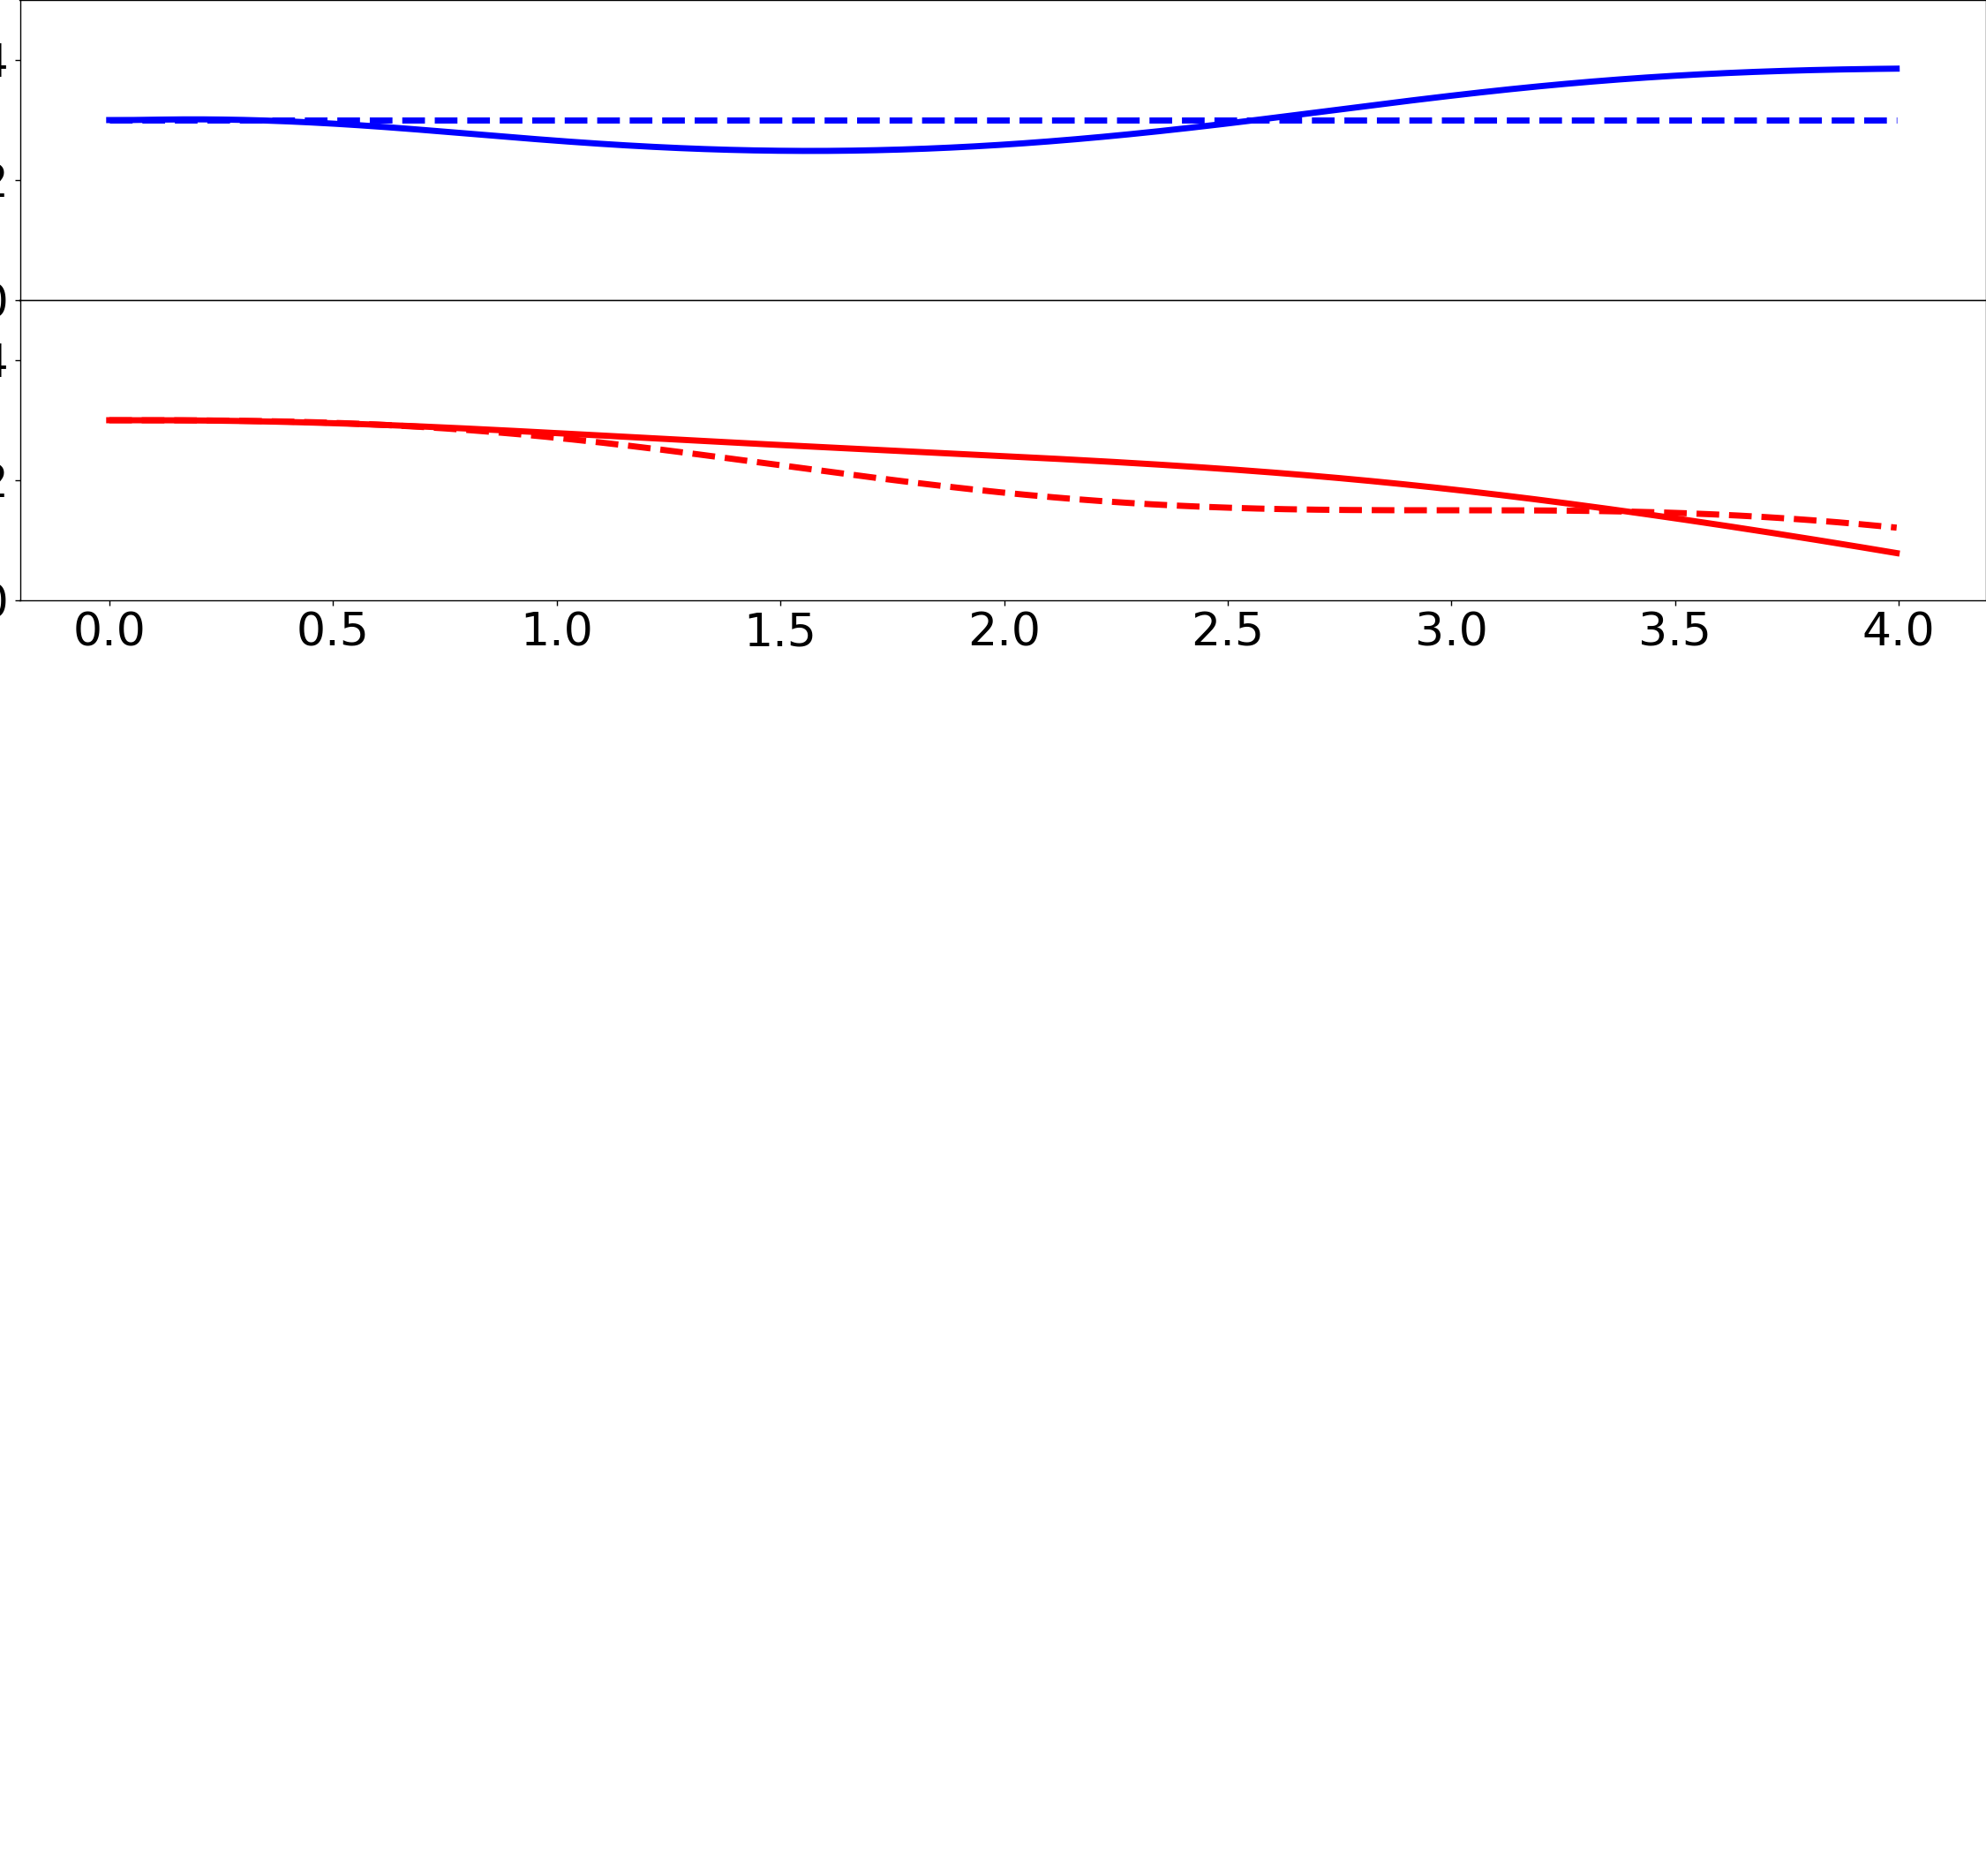

<IPython.core.display.Javascript object>


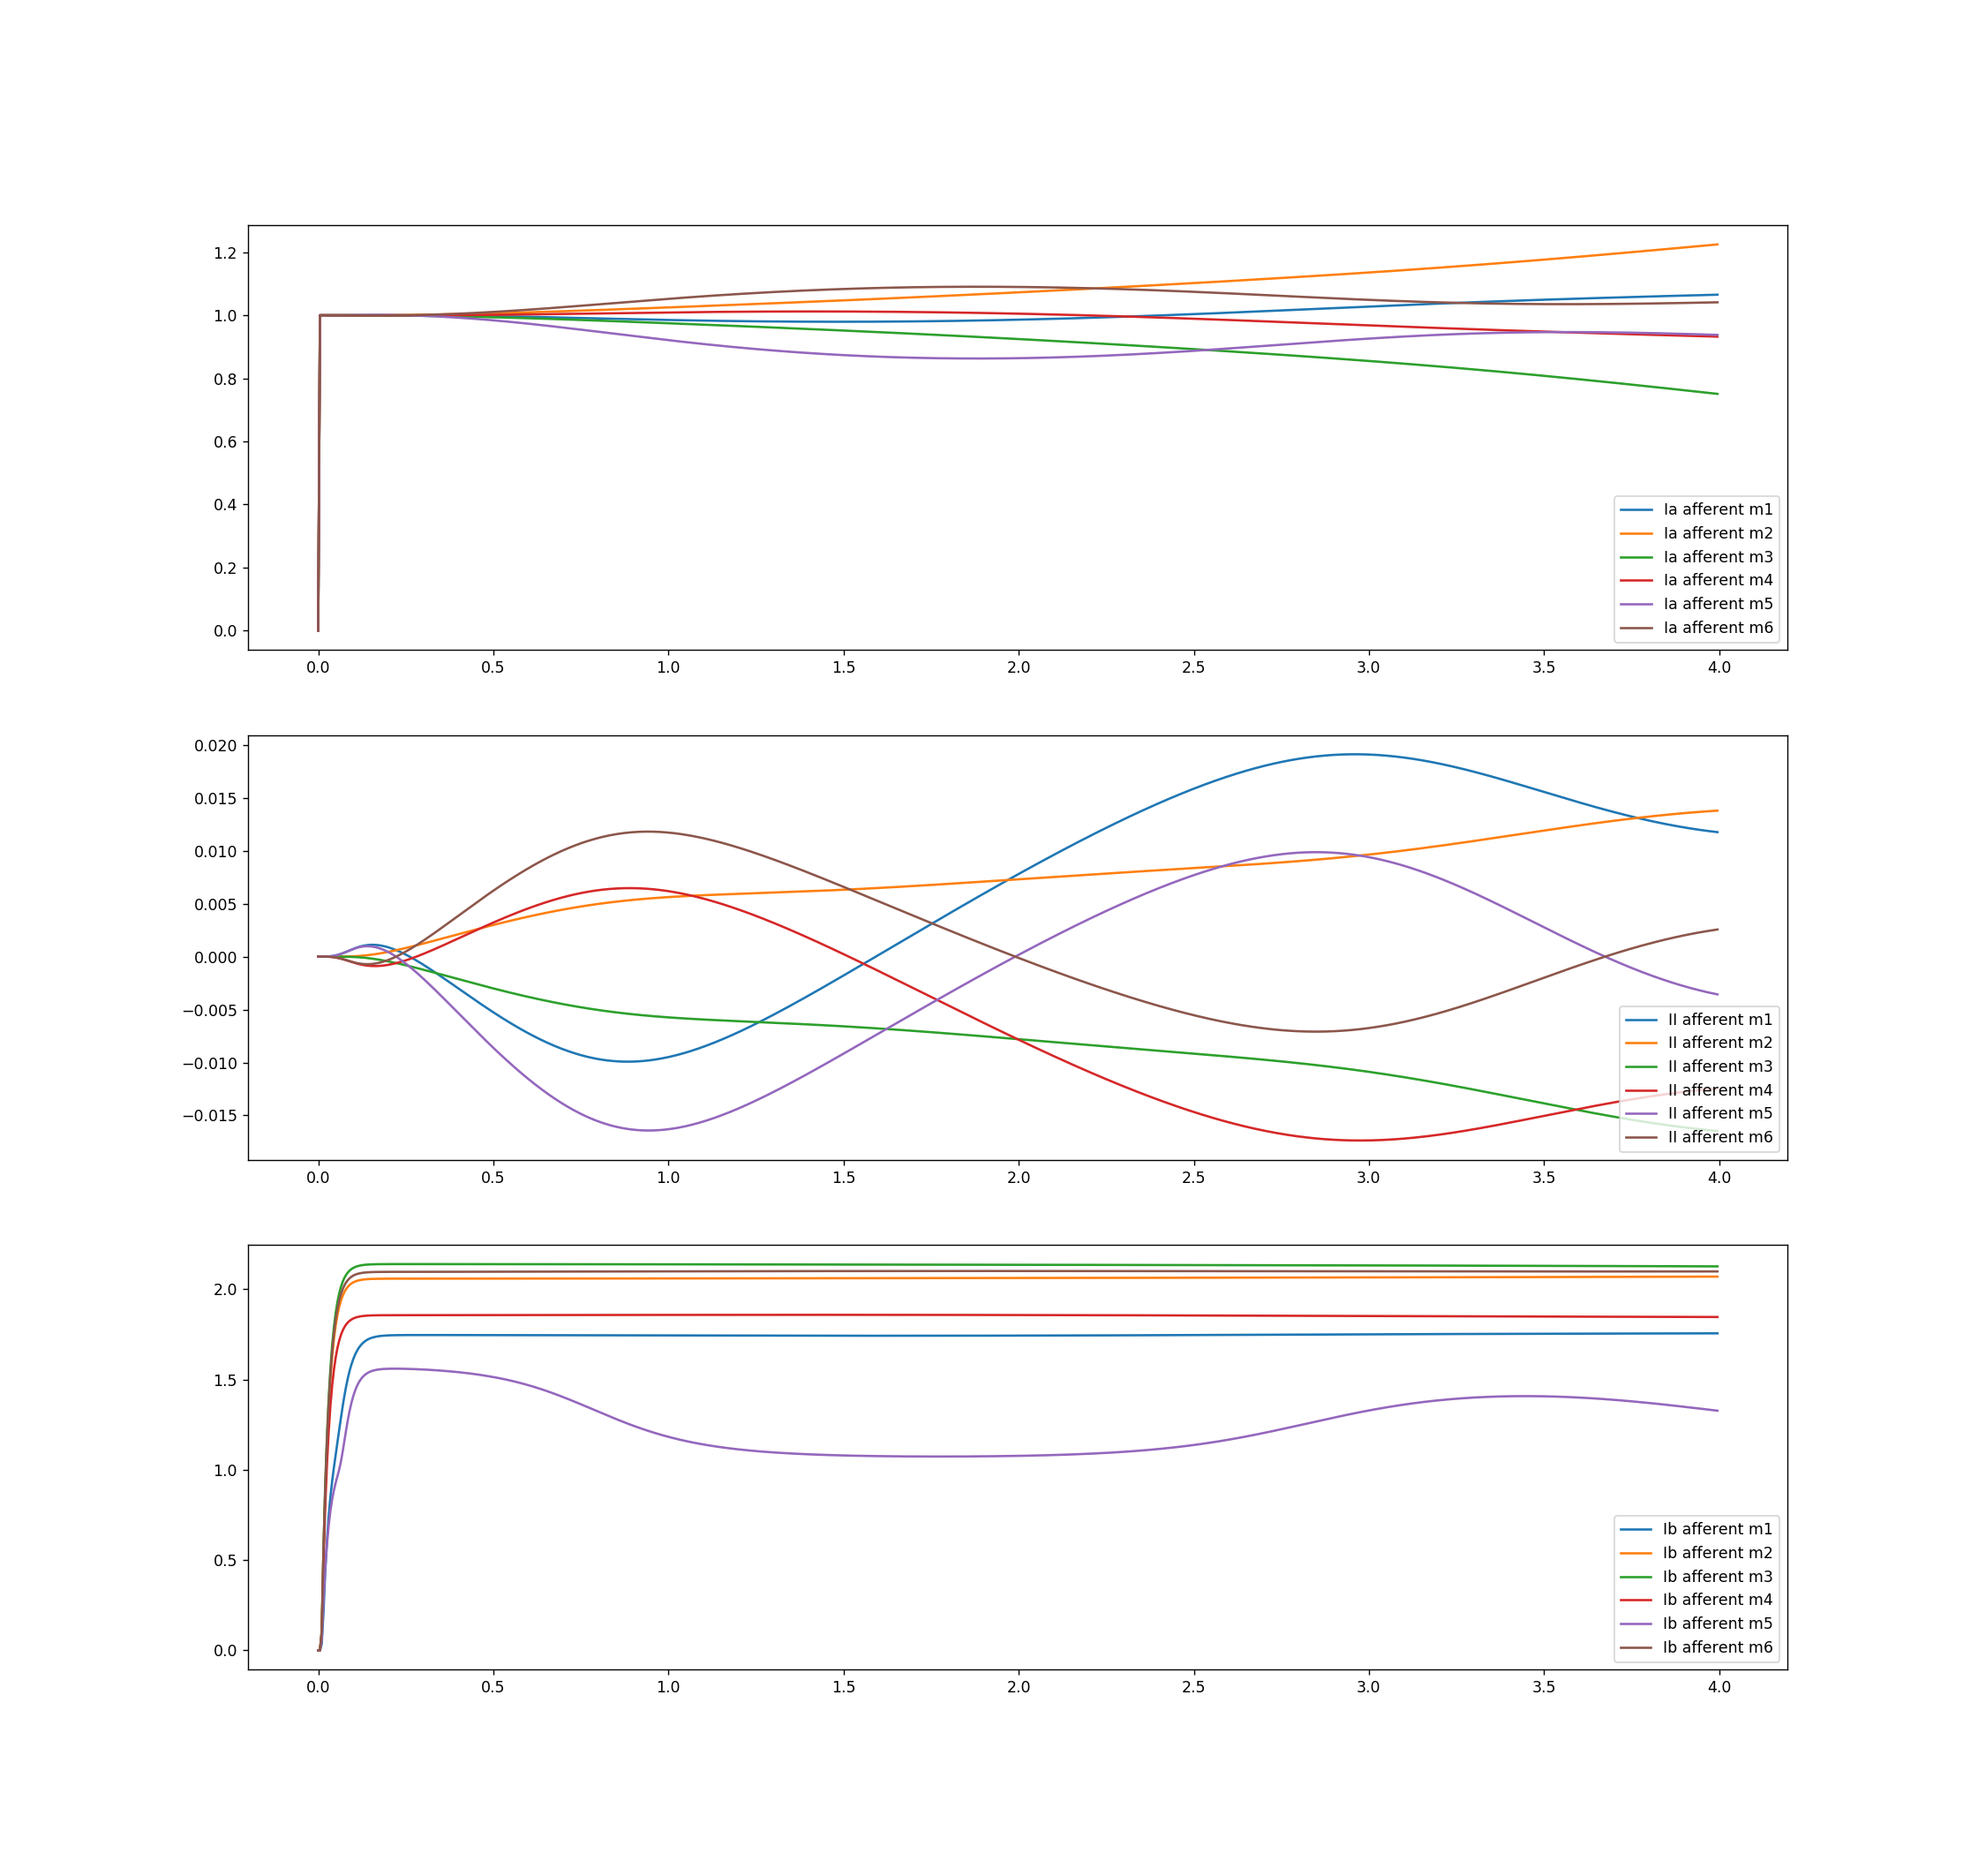

In [12]:
sc.initialize()
sc.update_w(w)
sc.simulate(4.)
error = sc.calc_error(0.3,0.15,4.)
print('Error: ' + str(error))
sc.arm_trajectory(0.3,0.15,4.)
sc.arm_afferent_output()

In [ ]:
w = sc.w_list()
print(w)

In [ ]:
syn_idx = sc.syn_list()
print(syn_idx)

In [ ]:
for slist in sc.net.syns:
    for syn in slist:
        pre_type = sc.net.units[syn.preID].type.name
        post_type = sc.net.units[syn.postID].type.name
        print("%s (%d) --> %s (%d), port:%d" %(pre_type, syn.preID, post_type, syn.postID, syn.port))